

# Анализ датасетов от DonorSearch

Вопросы на исследования:

брать отрезки сравнения динамик

1 января 2021 - 31 декабря 2021

1 января 2022 - 31 декабря 2022

1 января 2023 - 31 декабря 2023

1 января 2024 - как есть

Вопросы по годам:

N доноров платформы загрузили справку N раз в этом году (считаем дату донации)

1. N людей загрузили справку 1 раз
2. N людей загрузили справку 2 раз
3. N людей загрузили справку 3+ раз

Учесть дату донации, а не дату загрузки справки

Активация

Сколько зарегистрировалось в году

Сколько загрузили 1 справку

Сколько взяли бонусов в году

Сколько не заходили 6 и более месяцев

Кто берут Значки 20, 100, футболки, друг DS

ПОЖЕРТВОВАНИЯ

Стали жертвователями

1. платящий с платформы
2. платящий не с платформы

Сколько людей разово пожертвование в год (и сколько раз в году?)

сколько переходов с реккурентами и когда (стремится перейти в рекурентные)

средний чек

Рекурентные платежи по месяцам?

1. сколько подписались новых
2. сколько отписались
3. средний чек рекурентный

Вовлек друзей

1. как часто делаешь сборы
2. сколько людей и сумм набирают сборы
3. сколько после сбора становятся рекурентами

## Импорт *библиотек*

In [776]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from IPython.display import display
from tabulate import tabulate
import warnings


In [777]:
# Отключаем предупреждения
warnings.filterwarnings('ignore')

In [778]:
# все числа в DataFrame или Series без экспоненциальной нотации,
pd.set_option('display.float_format', '{:.2f}'.format)


In [779]:
# Установить максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)

# Дополнительно можно установить ширину вывода, чтобы столбцы не переносились на новую строку
pd.set_option('display.width', None)

## Загрузка данных

In [780]:
# Шаг 1: загружаем данные
donations_plan = pd.read_csv('/content/DonorSearch/anon_donations_plan.csv')
donations_anon = pd.read_csv('/content/DonorSearch/donations_anon.csv')
clients_anon = pd.read_csv('/content/DonorSearch/clients_anon.csv')
fundraisings_anon = pd.read_csv('/content/DonorSearch/fundraisings_anon.csv')
payments_anon_data = pd.read_csv('/content/DonorSearch/payments_anon_data.csv', delimiter=';')
users_anon_data = pd.read_csv('/content/DonorSearch/users_anon_data.csv')
payments_common_data = pd.read_csv('/content/DonorSearch/payments_common_data.csv', delimiter=';')
referrals_anon = pd.read_csv('/content/DonorSearch/referrals_anon.csv')


## Предобработка данных

### Смотрим и изучаем данные

In [781]:
donations_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34186 entries, 0 to 34185
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          34186 non-null  int64 
 1   ID пользователя             34186 non-null  int64 
 2   Класс крови                 34186 non-null  object
 3   Планируемая дата            34186 non-null  object
 4   Дата создания планирования  34186 non-null  object
 5   Тип донации                 34186 non-null  object
 6   Регион                      34186 non-null  object
 7   Место стадчи                34186 non-null  object
 8   Статус                      34186 non-null  object
 9   Есть справка                34186 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.6+ MB


In [782]:
donations_plan.head()

,ID,ID пользователя,Класс крови,Планируемая дата,Дата создания планирования,Тип донации,Регион,Место стадчи,Статус,Есть справка
0,35400,279853,Цельная кровь,03.06.2024,02.06.2024,Безвозмездно,"Россия, Московская область, Наро-Фоминск","Наро-Фоминская районная больница №1, отделение...",донация запланирована,Нет
1,35399,285925,Цельная кровь,25.06.2024,02.06.2024,Безвозмездно,"Россия, Ямало-Ненецкий АО, Надым","Надымская центральная районная больница, отдел...",донация запланирована,Нет
2,35398,37745,Цельная кровь,03.06.2024,02.06.2024,Безвозмездно,"Россия, Москва","ГУЗ ""ГКБ № 20"", Городская Клиническая Больница...",донация запланирована,Нет
3,35397,211586,Плазма,27.06.2024,02.06.2024,Безвозмездно,"Россия, Астраханская область, Астрахань","ГБУЗ АО ""Об­ласт­ной центр кро­ви""",донация запланирована,Нет
4,35396,293058,Цельная кровь,05.06.2024,02.06.2024,Безвозмездно,"Россия, Нижегородская область, Нижний Новгород",Нижегородский областной центр крови им. Н.Я. К...,планирование отменено,Нет


In [783]:
donations_anon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315750 entries, 0 to 315749
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       315750 non-null  int64 
 1   ID пользователя          315750 non-null  int64 
 2   Класс крови              315750 non-null  object
 3   Дата донации             315750 non-null  object
 4   Дата планирования        315750 non-null  object
 5   Тип донации              315750 non-null  object
 6   Город                    315750 non-null  object
 7   Регион                   315750 non-null  object
 8   Страна                   315750 non-null  object
 9   Место сдачи              315750 non-null  object
 10  Есть справка             315750 non-null  object
 11  Дата добавления донации  315750 non-null  object
 12  Статус донации           315750 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.3+ MB


In [784]:
donations_anon.head()

,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Город,Регион,Страна,Место сдачи,Есть справка,Дата добавления донации,Статус донации
0,325697,270848,Цельная кровь,28.03.2023,Не указана,Безвозмездно,Москва,Не указан,Россия,"ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)",Да,03.06.2024,На модерации
1,325696,270848,Цельная кровь,23.01.2023,Не указана,Безвозмездно,Москва,Не указан,Россия,"ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)",Да,03.06.2024,На модерации
2,325695,270848,Цельная кровь,22.11.2022,Не указана,Безвозмездно,Москва,Не указан,Россия,"ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)",Да,03.06.2024,На модерации
3,325694,270848,Цельная кровь,20.07.2022,Не указана,Безвозмездно,Москва,Не указан,Россия,"ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)",Да,03.06.2024,На модерации
4,325693,277658,Цельная кровь,19.04.2024,Не указана,Безвозмездно,Набережные Челны,Татарстан,Россия,Филиал ГАУЗ «Республиканский центр крови МЗ РТ...,Нет,03.06.2024,Без справки


In [785]:
clients_anon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1379 non-null   int64  
 1   В стоп-л           1379 non-null   object 
 2   Email польз.       1379 non-null   object 
 3   Email VK           1379 non-null   object 
 4   Email Yandex       1379 non-null   object 
 5   Email Google       1379 non-null   object 
 6   Email OK           1379 non-null   object 
 7   Email Twitter      1379 non-null   object 
 8   Email FB           1379 non-null   object 
 9   ID пользователя    1379 non-null   object 
 10  Дата рождения      1379 non-null   object 
 11  Кол-во транзакций  1379 non-null   int64  
 12  Накоп. сумма       1379 non-null   float64
 13  Посл. пожер.       1379 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 151.0+ KB


In [786]:
clients_anon.head()

,ID,В стоп-л,Email польз.,Email VK,Email Yandex,Email Google,Email OK,Email Twitter,Email FB,ID пользователя,Дата рождения,Кол-во транзакций,Накоп. сумма,Посл. пожер.
0,1381,Нет,-,-,-,-,-,-,-,Не указано,Не указано,1,0.00,01.06.2024 08:37:50
1,1380,Нет,Есть,-,-,-,-,-,-,292252,1977-12-22,1,100.00,30.05.2024 19:59:24
2,1379,Нет,-,-,-,-,-,-,-,Не указано,Не указано,1,100.00,27.05.2024 13:47:52
3,1378,Нет,Есть,-,-,Есть,-,-,-,150952,1992-06-03,1,500.00,24.05.2024 14:14:07
4,1377,Нет,Есть,-,-,-,-,-,-,244603,2004-09-06,1,100.00,24.05.2024 13:54:01


In [787]:
fundraisings_anon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     40 non-null     int64  
 1   ID пользователя        40 non-null     int64  
 2   Повод                  40 non-null     object 
 3   Описание               35 non-null     object 
 4   Статус                 40 non-null     object 
 5   Ограничение на сбор    40 non-null     object 
 6   Цель сбора             2 non-null      float64
 7   Собрано                40 non-null     float64
 8   Общ. кол-во пож.       40 non-null     int64  
 9   Разов.                 40 non-null     int64  
 10  Рекур.                 40 non-null     int64  
 11  Дата начала сбора      40 non-null     object 
 12  Дата завершения сбора  40 non-null     object 
dtypes: float64(2), int64(5), object(6)
memory usage: 4.2+ KB


In [788]:
fundraisings_anon.head()

,ID,ID пользователя,Повод,Описание,Статус,Ограничение на сбор,Цель сбора,Собрано,Общ. кол-во пож.,Разов.,Рекур.,Дата начала сбора,Дата завершения сбора
0,43,288512,Просто так,На развитие донорского движения,Активный сбор,Нет,NaN,702.00,11,11,0,01.05.2024,12.12.2112
1,39,1856,Особый случай,"В круговороте этих лет странно писать, как важ...",Активный сбор,Нет,NaN,900.00,5,4,1,16.04.2024,31.12.2030
2,9,246561,Просто так,Благотворительность с DonorSearch,Активный сбор,Нет,NaN,9540.00,57,52,5,20.03.2024,20.04.2030
3,33,141625,Особый случай,Помогать можно по-разному. Кто-то становится в...,Активный сбор,Нет,NaN,12461.00,17,15,2,24.03.2024,31.12.2024
4,1,142337,Особый случай,Друзья! Мы запустили первую версию модуля воло...,Сбор завершен,Да,50000.00,17120.00,14,11,3,15.03.2024,31.12.2024


In [789]:
payments_common_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 30 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   идентификатор платежа                                    4714 non-null   int64  
 1   дата и время создания платежа                            4714 non-null   object 
 2   дата и время отправки платежа                            3887 non-null   object 
 3   дата и время получения результата об успешности платежа  3887 non-null   object 
 4   дата и время отмены платежа                              573 non-null    object 
 5   платёжный оператор                                       4714 non-null   object 
 6   статус платежа                                           4714 non-null   object 
 7   тип платежа                                              4714 non-null   object 
 8   метод платежа               

In [790]:
payments_common_data.head()

,идентификатор платежа,дата и время создания платежа,дата и время отправки платежа,дата и время получения результата об успешности платежа,дата и время отмены платежа,платёжный оператор,статус платежа,тип платежа,метод платежа,id аккаунта,подписка,реккурент первый,номер реккурентного платежа,статус подписки,сумма платежа,сумма без комиссии,сумма комиссии,валюта,дата рождения,IP,платежная система карты,срок действия карты,комментарий,id сбора,код ошибки,utm_source,utm_campaign,utm_term,utm_medium,utm_content
0,2124411519,2024-07-15 07:02:23,2024-07-15 07:02:24,2024-07-15 07:02:24.649131,NaN,CLOUDPAYMENTS,COMPLETED,ONETIME,MIRPAY,4679.00,NaN,NaN,0,NaN,1000.00,961.00,39.00,RUB,1972-10-11,78.81.151.117,MIR,12/99,NaN,NaN,NaN,mobile_header,donor_search,NaN,ds,NaN
1,2124408925,2024-07-15 06:27:34,2024-07-15 06:27:36,2024-07-15 06:27:37.225669,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,140531.00,sc_c43417cadf50a3fca4ebbb2ef4d16,True,2,ACTIVE,100.00,96.10,3.90,RUB,1996-11-14,172.18.10.27,MIR,09/27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2124382703,2024-07-14 23:04:45,NaN,NaN,2024-07-14 23:04:47.765825,CLOUDPAYMENTS,DECLINED,RECURRING,NaN,4679.00,NaN,NaN,0,NaN,1000.00,NaN,NaN,RUB,1972-10-11,172.18.10.60,MIR,12/99,NaN,NaN,5062.00,NaN,NaN,NaN,NaN,NaN
3,2124376268,2024-07-14 22:09:01,2024-07-14 22:09:01,2024-07-14 22:09:02.461736,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,293894.00,sc_db0d37614c85e2b47b6b21cb713e3,True,2,ACTIVE,300.00,288.30,11.70,RUB,1997-09-17,172.18.10.61,MASTERCARD,03/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2124373073,2024-07-14 21:42:05,2024-07-14 21:42:06,2024-07-14 21:42:06.892333,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,MIRPAY,288512.00,sc_f5499480c324bed2db575776ffdd1,False,1,ACTIVE,100.00,96.10,3.90,RUB,2001-05-12,109.254.254.183,MIR,12/99,NaN,85.00,NaN,NaN,NaN,NaN,NaN,NaN


In [791]:
users_anon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280111 entries, 0 to 280110
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   ID                               280111 non-null  int64 
 1   Пол                              280111 non-null  object
 2   Дата рождения                    280111 non-null  object
 3   Регион                           280111 non-null  object
 4   Группа крови                     280111 non-null  object
 5   Kell-фактор                      280111 non-null  object
 6   Цельная кровь                    280111 non-null  object
 7   Плазма                           280111 non-null  object
 8   Тромбоциты                       280111 non-null  object
 9   Эритроциты                       280111 non-null  object
 10  Лейкоциты                        280111 non-null  object
 11  Костный мозг                     280111 non-null  object
 12  Почетный донор  

In [792]:
users_anon_data.head()

,ID,Пол,Дата рождения,Регион,Группа крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный донор,Отвод от донации,Цельная кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата регистрации,Не подтверждённые донации,Прошедших донаций,Донаций до регистрации,Последняя активность,Теги,Указан email,Указан телефон,Авторизация через ВК,Авторизация через Одноклассники,Авторизация через Твиттер,Авторизация через Яндекс,Авторизация через Гугл,Подтверждённые донации,Получен значок 20,Получен значок 100,Получен значок друг DS,Отправлена футболка,Донаций на момент регистрации,Количество взятых бонусов
0,293070,Не указано,Не указано,"Россия, Москва",A(II) Rh+,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2024,2,0,2,02.06.2024,['MainPage'],нет,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,2,0
1,293069,Мужской,07.01.1989,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2024,0,0,Не указано,Не указано,['CardsMobile'],да,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,Не указано,0
2,293068,Не указано,Не указано,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2024,0,0,8,02.06.2024,['MainPage'],да,нет,да,нет,нет,нет,нет,0,нет,нет,нет,нет,8,0
3,293067,Мужской,16.04.1991,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2024,0,0,18,02.06.2024,['MainPage'],да,да,да,нет,нет,нет,нет,0,нет,нет,нет,нет,18,0
4,293066,Женский,08.08.1997,"Россия, Новосибирская область, Новосибирск",Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2024,0,0,Не указано,Не указано,['CardsMobile'],да,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,Не указано,0


In [793]:
referrals_anon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            185 non-null    int64  
 1   Дата добавления               185 non-null    object 
 2   ID афилята                    185 non-null    int64  
 3   Кол-во подтв. дон. афилята    185 non-null    int64  
 4   Кол-во дон. афилята до рег-и  184 non-null    float64
 5   ID реферала                   185 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 8.8+ KB


In [794]:
referrals_anon.head()

,ID,Дата добавления,ID афилята,Кол-во подтв. дон. афилята,Кол-во дон. афилята до рег-и,ID реферала
0,186,12.07.2024,259194,11,11.00,296500
1,185,12.07.2024,139696,57,12.00,146082
2,184,12.07.2024,228133,26,20.00,296463
3,183,12.07.2024,228133,26,20.00,296455
4,182,11.07.2024,288512,9,5.00,296397


### Преобразовываем формат дат

In [795]:
# Преобразование строк в даты
donations_plan['Планируемая дата'] = pd.to_datetime(donations_plan['Планируемая дата'], errors='coerce')
donations_plan['Дата создания планирования'] = pd.to_datetime(donations_plan['Дата создания планирования'], errors='coerce')

donations_anon['Дата донации'] = pd.to_datetime(donations_anon['Дата донации'], errors='coerce')
donations_anon['Дата добавления донации'] = pd.to_datetime(donations_anon['Дата добавления донации'], errors='coerce')

clients_anon['Дата рождения'] = pd.to_datetime(clients_anon['Дата рождения'], errors='coerce')
clients_anon['Посл. пожер.'] = pd.to_datetime(clients_anon['Посл. пожер.'], errors='coerce')

fundraisings_anon['Дата начала сбора'] = pd.to_datetime(fundraisings_anon['Дата начала сбора'], errors='coerce')
fundraisings_anon['Дата завершения сбора'] = pd.to_datetime(fundraisings_anon['Дата завершения сбора'], errors='coerce')

payments_anon_data['дата и время создания платежа'] = pd.to_datetime(payments_anon_data['дата и время создания платежа'], errors='coerce')
payments_anon_data['дата и время отправки платежа'] = pd.to_datetime(payments_anon_data['дата и время отправки платежа'], errors='coerce')
payments_anon_data['дата и время получения результата об успешности платежа'] = pd.to_datetime(payments_anon_data['дата и время получения результата об успешности платежа'], errors='coerce')
payments_anon_data['дата и время отмены платежа'] = pd.to_datetime(payments_anon_data['дата и время отмены платежа'], errors='coerce')

users_anon_data['Дата рождения'] = pd.to_datetime(users_anon_data['Дата рождения'], errors='coerce')
users_anon_data['Дата регистрации'] = pd.to_datetime(users_anon_data['Дата регистрации'], errors='coerce')
users_anon_data['Последняя активность'] = pd.to_datetime(users_anon_data['Последняя активность'], errors='coerce')


### Проверка на пропуски и дубликаты

In [796]:
# Функция для проверки пропусков и дубликатов
def check_data(df, name):
    print(f'\n{name}:')
    print(f'Пропущенные значения:\n{df.isnull().sum()}')
    print(f'Количество дубликатов: {df.duplicated().sum()}')

# Проверка данных
check_data(donations_plan, 'donations_plan')
check_data(donations_anon, 'donations_anon')
check_data(clients_anon, 'clients_anon')
check_data(fundraisings_anon, 'fundraisings_anon')
check_data(payments_common_data, 'payments_common_data')
check_data(users_anon_data, 'users_anon_data')



donations_plan:
Пропущенные значения:
ID                                0
ID пользователя                   0
Класс крови                       0
Планируемая дата              22254
Дата создания планирования    21311
Тип донации                       0
Регион                            0
Место стадчи                      0
Статус                            0
Есть справка                      0
dtype: int64
Количество дубликатов: 0

donations_anon:
Пропущенные значения:
ID                              0
ID пользователя                 0
Класс крови                     0
Дата донации                    0
Дата планирования               0
Тип донации                     0
Город                           0
Регион                          0
Страна                          0
Место сдачи                     0
Есть справка                    0
Дата добавления донации    231395
Статус донации                  0
dtype: int64
Количество дубликатов: 785

clients_anon:
Пропущенные значения:
ID   

### Выводы по проверке данных:
1. donations_plan:

Вывод: Значительное количество пропущенных данных в столбцах с датами. Возможно, это связано с тем, что не все доноры планируют свои донации заранее или данные о планировании не были заполнены.Заполнять не будем так как это может исказит данные

2. donations_anon:

Вывод: Большое количество пропущенных данных в Дата добавления донации, что может быть связано с тем, что информация о дате добавления не всегда фиксируется. Дубликаты оставляем т.к могут добавлять в один день

3. clients_anon:

Вывод: Небольшое количество пропущенных данных в дате рождения и последнем пожертвовании. Возможно, некоторые пользователи не указали свою дату рождения или информация о последнем пожертвовании не была обновлена. Заполнять пропуски не будем т.к это может исказить данные

4. fundraisings_anon:

Вывод: Большое количество пропущенных данных в колонках с датами и целью сбора. Это может указывать на проблемы с записью данных о сборе средств. Оставляем пропуски чтобы избежать искажения

5. payments_common_data:

Вывод: Значительное количество пропущенных данных в различных столбцах, особенно касающихся дат, метода платежа и UTM-меток. Это может указывать на неполные записи транзакций или недостаток информации о платежах.Большая часть пропусков некритична, изменяя остальные можем исказить данные. Оставляем

6. users_anon_data:

Вывод: Значительное количество пропущенных данных в столбцах с датами рождения, регистрации и последней активности. Это может указывать на то, что пользователи не всегда указывают свои данные полностью или данные не обновляются.



## Анализ регистрации новых пользователей

Проанализируем, как менялось количество новых регистраций на платформе в интересующие нас  годы, чтобы увидеть, есть ли корреляция между увеличением числа регистраций и активностью по загрузке справок.

- Подсчитаем количество новых регистраций на сайте за каждый год начиная с 2021.


Количество зарегистрировавшихся пользователей в год:

In [797]:
# Количество зарегистрировавшихся пользователей в год:
registrations_by_year = users_anon_data['Дата регистрации'].dt.year.value_counts().sort_index()
# Конвертация индекса в int
registrations_by_year.index = registrations_by_year.index.astype(int)

registrations_by_year


Дата регистрации
2018    121658
2019      1653
2020      3512
2021      9877
2022     19630
2023     15188
2024      4362
Name: count, dtype: int64

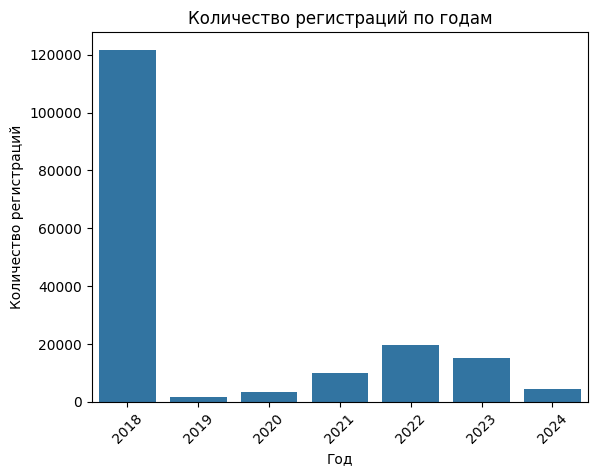

In [798]:
sns.barplot(x=registrations_by_year.index, y=registrations_by_year.values)
plt.title('Количество регистраций по годам')
plt.xlabel('Год')
plt.ylabel('Количество регистраций')
plt.xticks(rotation=45)
plt.show()


In [799]:
# Фильтрация данных с 2021 по текущий год
registrations_by_year = registrations_by_year.loc[2021:2024]

registrations_by_year

Дата регистрации
2021     9877
2022    19630
2023    15188
2024     4362
Name: count, dtype: int64

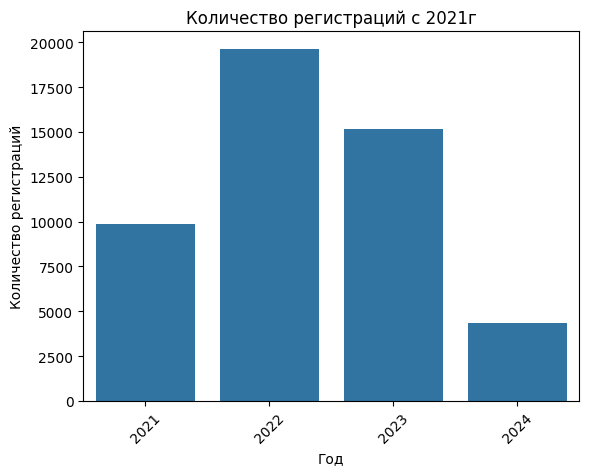

In [800]:
sns.barplot(x=registrations_by_year.index, y=registrations_by_year.values)
plt.title('Количество регистраций c 2021г')
plt.xlabel('Год')
plt.ylabel('Количество регистраций')
plt.xticks(rotation=45)
plt.show()

## Анализ сезонности донаций

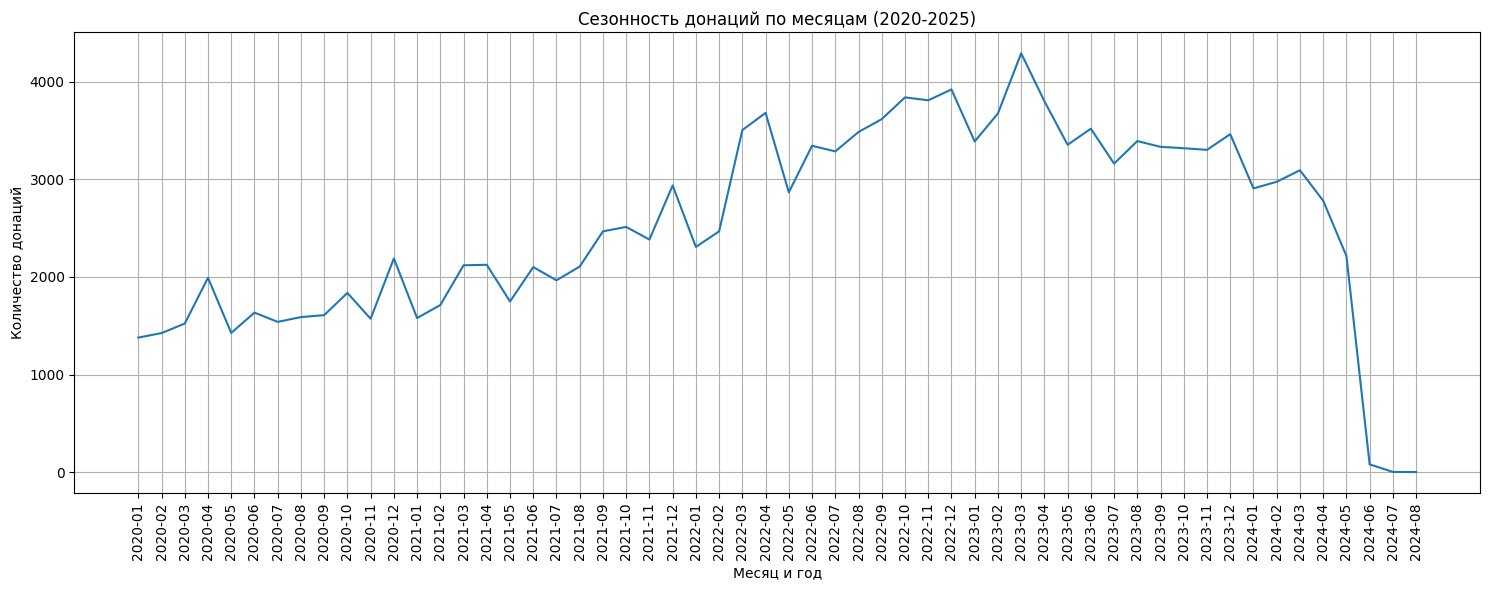

In [801]:
# Ограничение данных по датам
filtered_donations = donations_anon[(donations_anon['Дата донации'] >= '2020-01-01') & (donations_anon['Дата донации'] <= '2025-12-31')]
filtered_donations_by_month = filtered_donations.groupby(filtered_donations['Дата донации'].dt.to_period("M")).size()

filtered_donations_by_month.index = pd.period_range(start='2020-01', periods=len(filtered_donations_by_month), freq='M')



plt.figure(figsize=(15, 6))
plt.plot(filtered_donations_by_month.index.astype(str), filtered_donations_by_month.values)

plt.xticks(rotation=90)  # Поворот меток для лучшей читаемости
plt.title('Сезонность донаций по месяцам (2020-2025)')
plt.xlabel('Месяц и год')
plt.ylabel('Количество донаций')
plt.grid(True)
plt.tight_layout()
plt.show()

Из графика видно, что активность донорства растет со временем и достигает пика в 2023 году, после чего наблюдается некоторое снижение, и резкое падение в конце 2024 года (Но там данные еще неполные поэтому это нормально)

Сезонные колебания: активность доноров имеет тенденцию к увеличению в летние месяцы каждого года, особенно заметно  с мая по август.

Это может быть связано с увеличением свободного времени у людей в летний отпускной период или сезонными кампаниями по сбору донаций.

Заметно снижение активности к концу каждого года, что может быть связано с  праздничными днями и зимними условиями, когда люди меньше склонны посещать пункты сдачи крови

## Анализ демографии пользователей, их регистрационной активности и предпочтений в донорстве.

Изучим:

- Демографические данные: пол, возраст (Дата рождения), регион.
- Регистрационная активность: дата регистрации и последняя активность.
- Донорская активность: готовность к донорству разных компонентов крови и история донорства.

### Пол

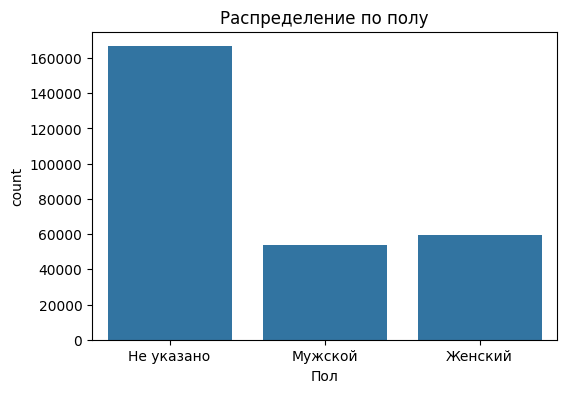

In [802]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Пол', data=users_anon_data)
plt.title('Распределение по полу')
plt.show()

### Возраст

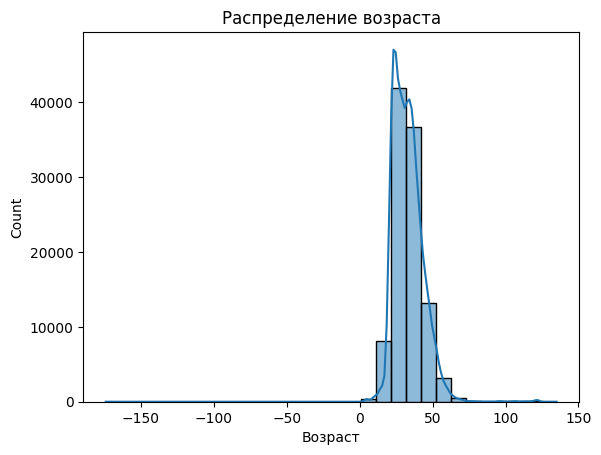

In [803]:
users_anon_data['Дата рождения'] = pd.to_datetime(users_anon_data['Дата рождения'], errors='coerce')
users_anon_data['Возраст'] = (pd.Timestamp('now') - users_anon_data['Дата рождения']).dt.days // 365
#plt.figure(figsize=(10, 6))
sns.histplot(users_anon_data['Возраст'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.show()

### Регион

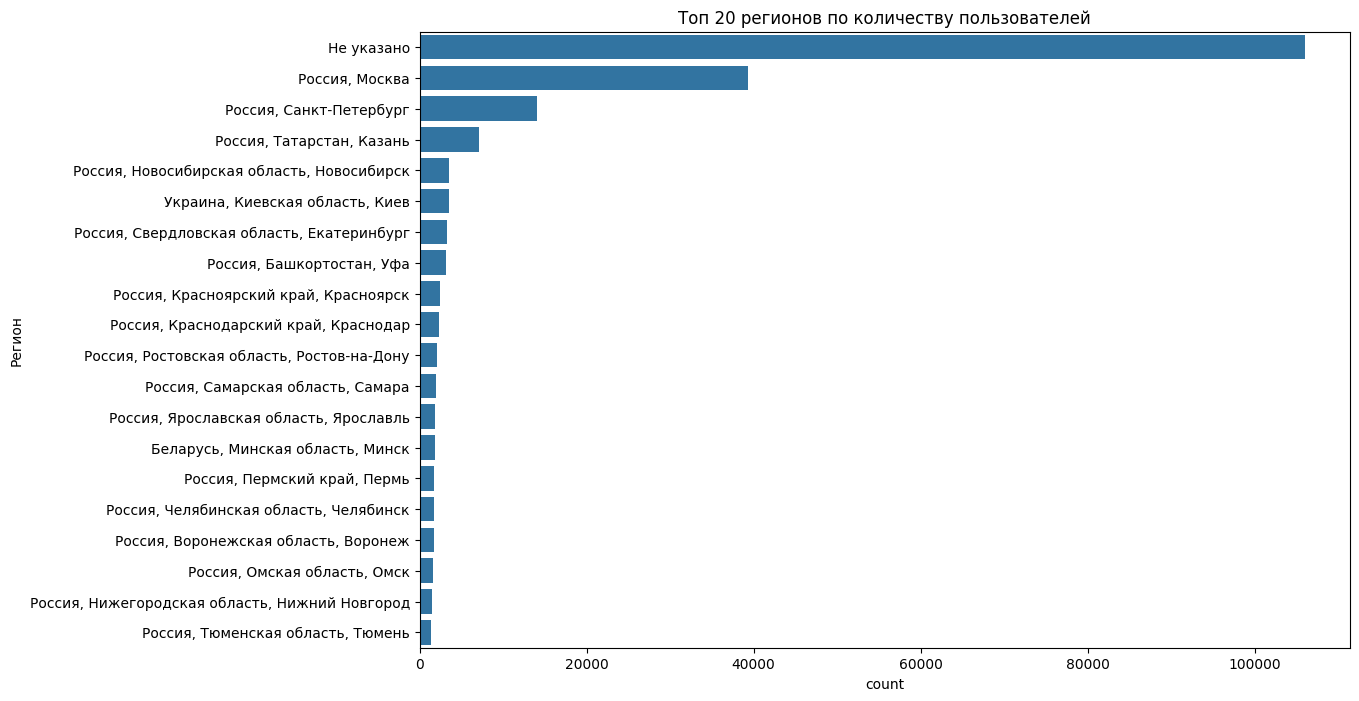

In [804]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Регион', data=users_anon_data, order=users_anon_data['Регион'].value_counts().index[:20])
plt.title('Топ 20 регионов по количеству пользователей')
plt.show()

### Типы донорства

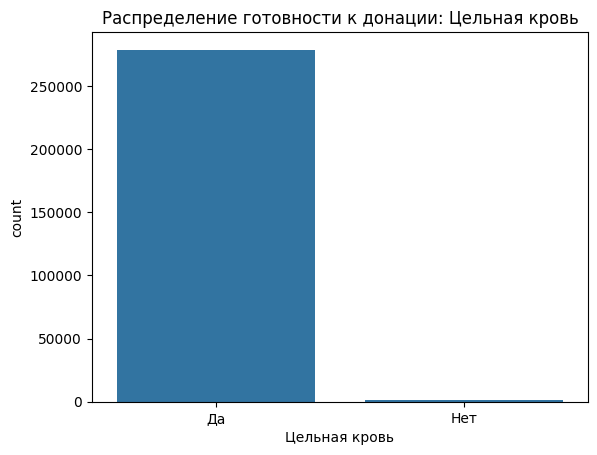

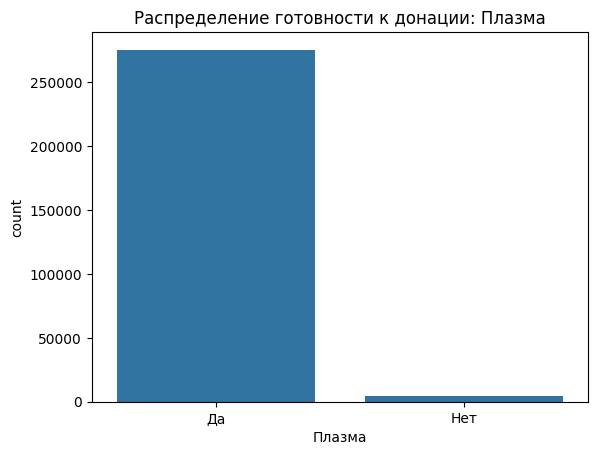

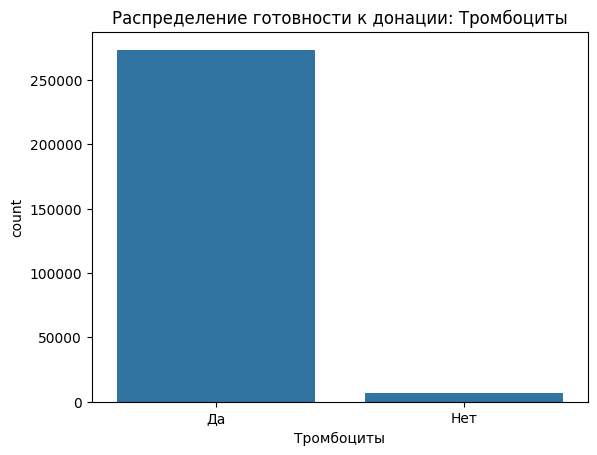

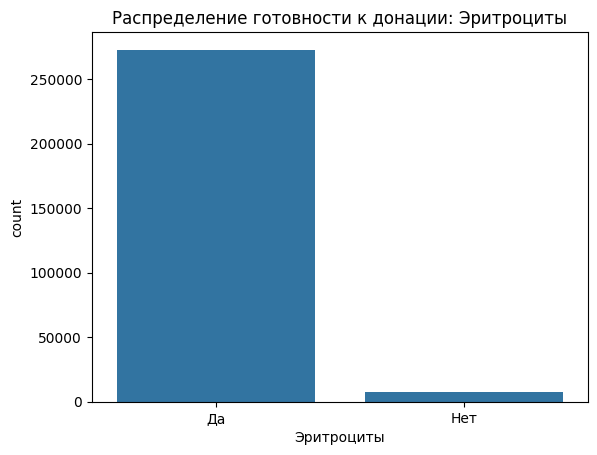

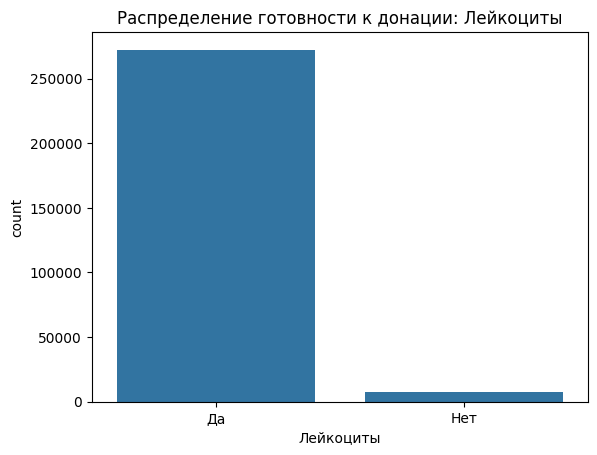

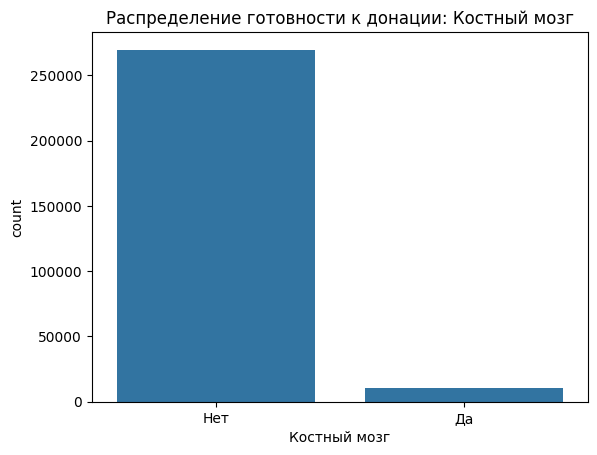

In [805]:
donation_types = ['Цельная кровь', 'Плазма', 'Тромбоциты', 'Эритроциты', 'Лейкоциты', 'Костный мозг']
for col in donation_types:
    sns.countplot(x=col, data=users_anon_data)
    plt.title(f'Распределение готовности к донации: {col}')
    plt.show()


**Выводы**

- Распределение по полу:

Большое количество пользователей не указало свой пол. Количество мужчин и женщин примерно одинаковое.

- Распределение по возрасту:

Распределение возраста показывает два пика (примерно 25 лет и примерно 35 лет), похоже что, представляющих две основные демографические группы.

- Распределение по регионам:

Большое количество пользователей из Москвы и Санкт-Петербурга

- Готовность к типам донорства:

Многие пользователи готовы сдавать цельную кровь и плазму, но меньше готовы к донорству тромбоцитов, эритроцитов, лейкоцитов или костного мозга.

- Полнота данных и проблемы:

В наборе данных есть 175955 пропуска по дате рождения то есть мы не знаем возраст этих доноров. Возможно стоит сделать эти поля обязательными.

Колонки готовности показывают, что почти все пользователи готовы к донорству цельной крови и плазмы. Это может указывать на сильное осведомление или предпочтение этих типов донорства или потенциально на автоматическое заполнение данных

**Рекомендации для дальнейших исследований**

- Глубокий анализ возрастных групп:

Исследовать конкретные характеристики двух основных возрастных пиков. Лучшее понимание этих демографических групп может помочь настроить стратегии вовлечения.

- Сосредоточение на регионах с высокой активностью:

Целевые кампании в Москве и Санкт-Петербурге могут быть более эффективными из-за более высокой концентрации пользователей. Стоит рассмотреть региональные различия в готовности к донорству и типах донорства.

- Повышение вовлеченности для менее распространённых донорств:

Поскольку наблюдается снижение готовности к другим типам донорства, инициативы по обучению и поощрению таких донорств могли бы быть полезны.

- Улучшение сбора данных о поле:

Рассмотреть инициативы по стимулированию пользователей к предоставлению данных о своем поле (сделать поле обязательным), так как это может улучшить персонализацию коммуникаций и стратегий вовлечения.

## Получатели значков и футболок:


In [806]:
# Получатели значков и футболок:
badges_20_yearly = users_anon_data[users_anon_data['Получен значок 20'] == 'да']['Дата регистрации'].dt.year.value_counts().sort_index()
print(f'Получили значок 20 {badges_20_yearly}')

Получили значок 20 Дата регистрации
2018.00    676
2019.00     28
2020.00     41
2021.00     89
2022.00    306
2023.00    316
2024.00    144
Name: count, dtype: int64


In [807]:
tshirt_yearly = users_anon_data[users_anon_data['Отправлена футболка'] == 'да']['Дата регистрации'].dt.year.value_counts().sort_index()
print(f'Получили футболки {tshirt_yearly}')

Получили футболки Дата регистрации
2018.00    21
2019.00     1
2020.00     1
2021.00     4
2022.00    12
2023.00    20
2024.00    36
Name: count, dtype: int64


In [808]:
badges_100_yearly = users_anon_data[users_anon_data['Получен значок 100'] == 'да']['Дата регистрации'].dt.year.value_counts().sort_index()
print(f'Получили значок 100 {badges_100_yearly}')

Получили значок 100 Дата регистрации
2018.00    48
2019.00     3
2020.00     3
2021.00     2
2022.00    24
2023.00    20
2024.00     3
Name: count, dtype: int64


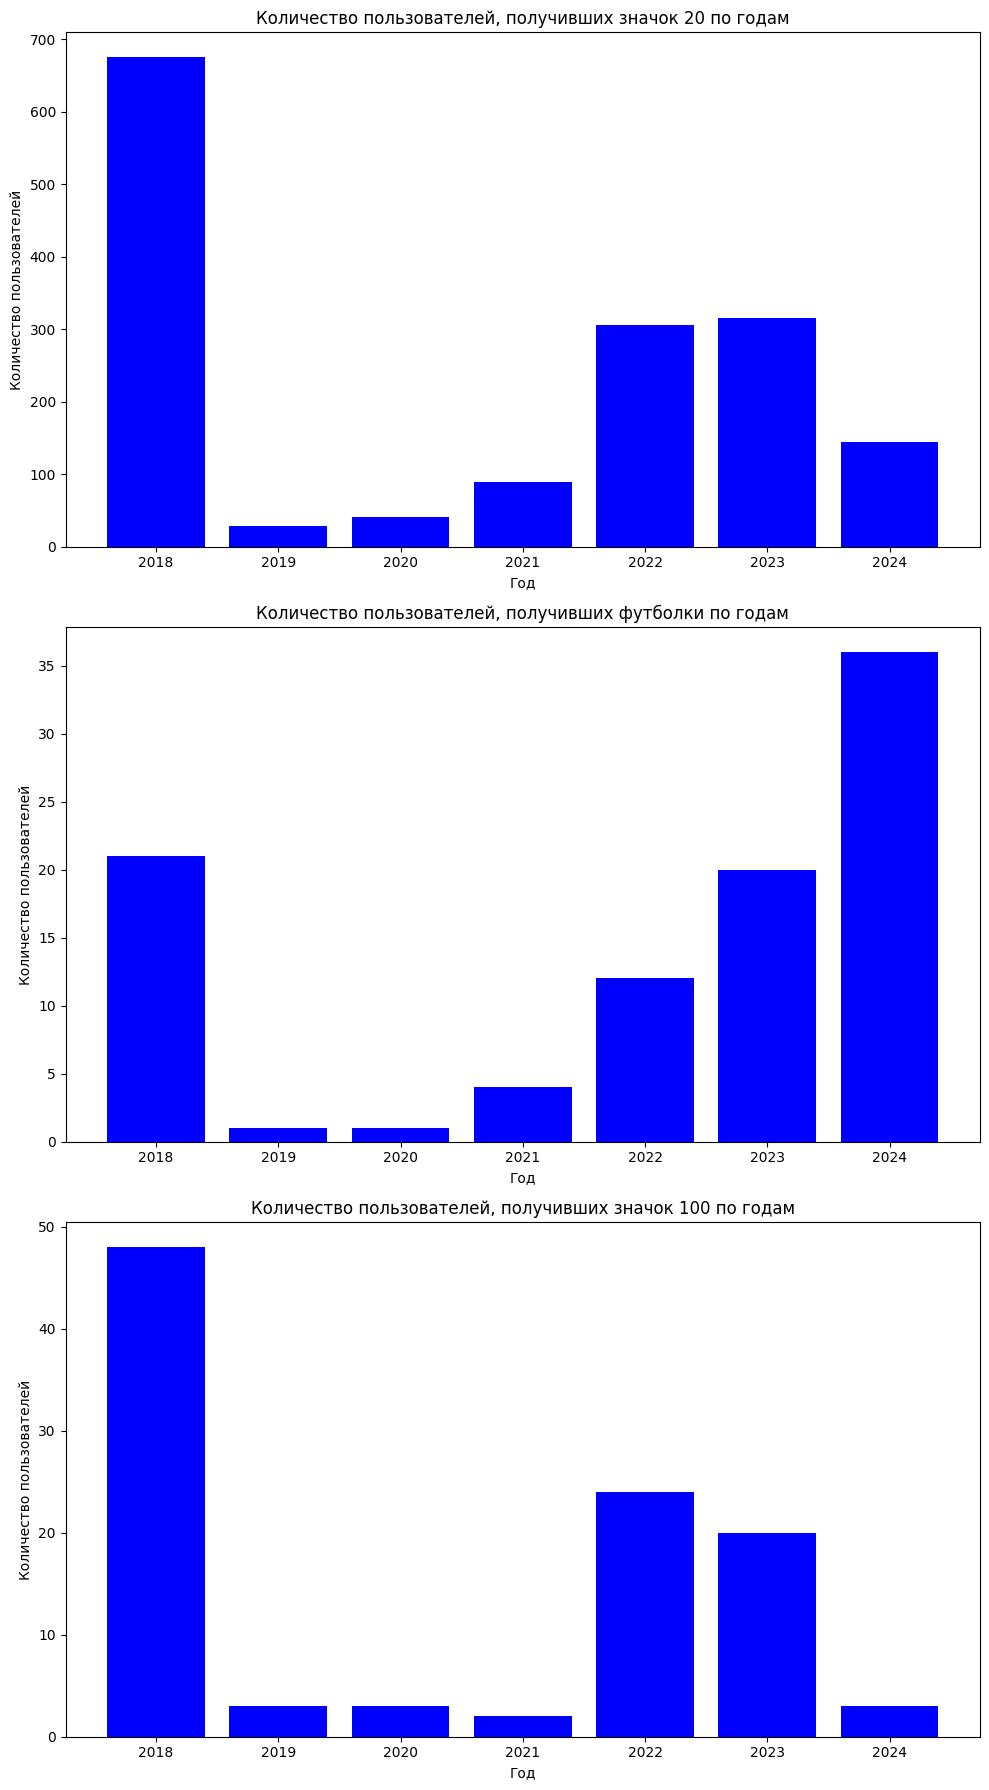

In [809]:
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Значок 20
ax[0].bar(badges_20_yearly.index.astype(int), badges_20_yearly.values, color='blue')
ax[0].set_title('Количество пользователей, получивших значок 20 по годам')
ax[0].set_xlabel('Год')
ax[0].set_ylabel('Количество пользователей')

# Футболки
ax[1].bar(tshirt_yearly.index.astype(int), tshirt_yearly.values, color='blue')
ax[1].set_title('Количество пользователей, получивших футболки по годам')
ax[1].set_xlabel('Год')
ax[1].set_ylabel('Количество пользователей')

# Значок 100
ax[2].bar(badges_100_yearly.index.astype(int), badges_100_yearly.values, color='blue')
ax[2].set_title('Количество пользователей, получивших значок 100 по годам')
ax[2].set_xlabel('Год')
ax[2].set_ylabel('Количество пользователей')

plt.tight_layout()
plt.show()


## Количество бонусов, взятых пользователями в году:

In [810]:
# Количество бонусов, взятых пользователями в году:
bonuses_yearly = users_anon_data[users_anon_data['Количество взятых бонусов'] > 0]['Дата регистрации'].dt.year.value_counts().sort_index()
bonuses_yearly

Дата регистрации
2018.00     799
2019.00      28
2020.00     101
2021.00     273
2022.00    1362
2023.00    1301
2024.00     206
Name: count, dtype: int64

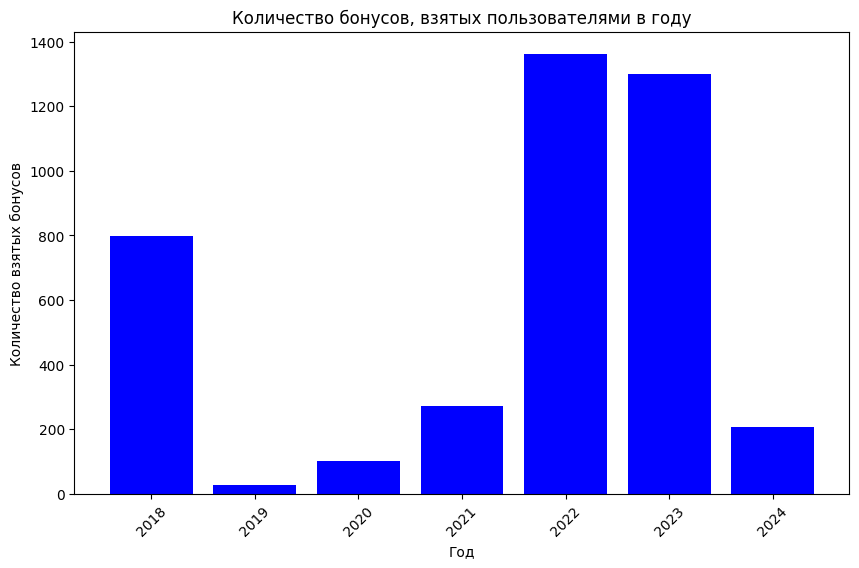

In [811]:
plt.figure(figsize=(10, 6))
plt.bar(bonuses_yearly.index.astype(int), bonuses_yearly.values, color='blue')
plt.title('Количество бонусов, взятых пользователями в году')
plt.xlabel('Год')
plt.ylabel('Количество взятых бонусов')
plt.xticks(rotation=45)
plt.show()


## Количество пользователей, не заходивших 6 и более месяцев:

In [812]:
# Количество пользователей, не заходивших 6 и более месяцев:
reference_date = pd.Timestamp('2024-06-02')

# Количество пользователей, не заходивших 6 и более месяцев:
inactive_users = users_anon_data[pd.to_datetime(users_anon_data['Последняя активность']) < (reference_date - pd.DateOffset(months=6))].shape[0]
inactive_users

31883

Разделим пользователей на когорты на основе даты регистрации, а затем оценим, как часто пользователи из каждой когорты заходили в систему в последние месяцы.

Это поможет выявить, влияет ли длительность участия на частоту активности

In [813]:
#Устанавливаем дату отсчета для анализа неактивности
reference_date = pd.Timestamp('2024-06-02')

# Фильтруем данные по наличию даты регистрации и преобразуем даты регистрации в год регистрации
filtered_data = users_anon_data.dropna(subset=['Дата регистрации'])
filtered_data['Когорта'] = filtered_data['Дата регистрации'].dt.year.astype(int)

# Считаем количество пользователей в каждой когорте, которые не были активны последние 6 месяцев
inactive_users_by_cohort = filtered_data[filtered_data['Последняя активность'] < (reference_date - pd.DateOffset(months=6))].groupby('Когорта').size()
inactive_users_by_cohort


Когорта
2018    1203
2019      40
2020     971
2021    1956
2022    7668
2023    6376
dtype: int64

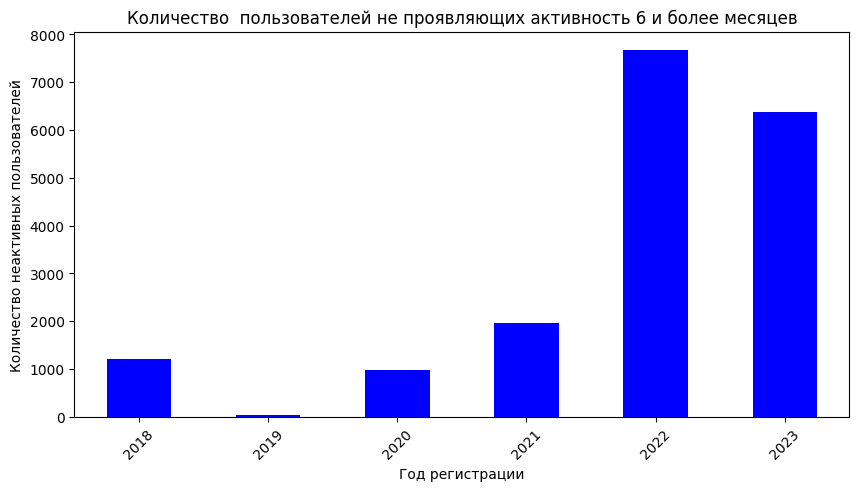

In [814]:
# Визуализация
plt.figure(figsize=(10, 5))
inactive_users_by_cohort.plot(kind='bar', color='blue')
plt.title('Количество  пользователей не проявляющих активность 6 и более месяцев')
plt.xlabel('Год регистрации')
plt.ylabel('Количество неактивных пользователей')
plt.xticks(rotation=45)

plt.show()

## Количество пользователей, загрузивших хотя бы одну справку:

In [815]:
# Количество пользователей, загрузивших хотя бы одну справку:
has_document = donations_anon[donations_anon['Есть справка'] == 'Да']
first_document_yearly = has_document['Дата добавления донации'].dt.year.value_counts().sort_index()
first_document_yearly

Дата добавления донации
2020.00      364
2021.00     3746
2022.00    21744
2023.00    31183
2024.00    20304
Name: count, dtype: int64

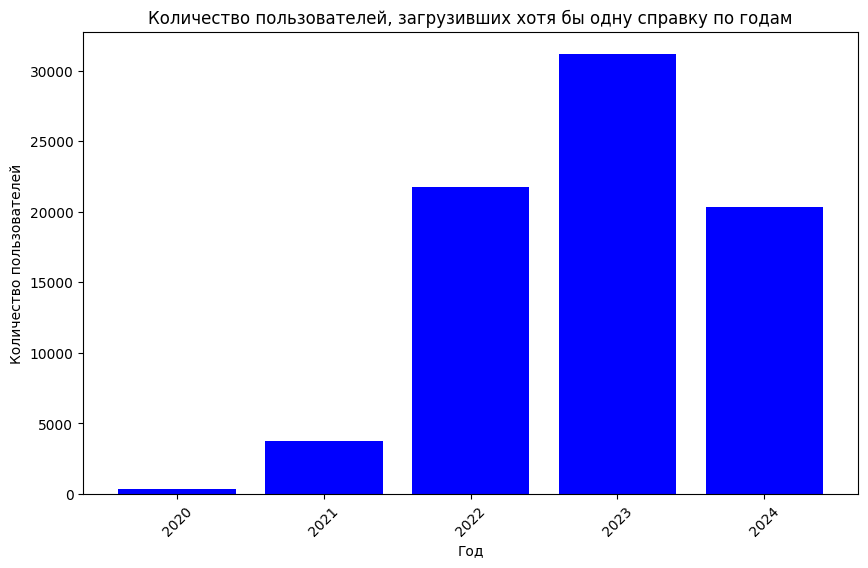

In [816]:
plt.figure(figsize=(10, 6))
plt.bar(first_document_yearly.index.astype(int), first_document_yearly.values, color='blue')
plt.title('Количество пользователей, загрузивших хотя бы одну справку по годам')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()


##  Анализ активности пользователей

1. Сначала проведем анализ активности пользователей, разделенный по заданным временным отрезкам: 2021, 2022, 2023, и 2024 года до текущего момента.

2. Выясним, сколько пользователей загрузило справку 1, 2 и 3+ раз в каждом из этих годов.



In [817]:
# Преобразование даты донации в datetime и фильтрация данных по годам
donations_anon['Дата донации'] = pd.to_datetime(donations_anon['Дата донации'], format='%d.%m.%Y', errors='coerce')
years = [2021, 2022, 2023, 2024]
data_by_year = {}

for year in years:
    yearly_data = donations_anon[donations_anon['Дата донации'].dt.year == year]
    # Считаем количество загрузок справок на пользователя
    upload_counts = yearly_data['ID пользователя'].value_counts()
    data_by_year[year] = {
        '1 раз': (upload_counts == 1).sum(),
        '2 раза': (upload_counts == 2).sum(),
        '3+ раза': (upload_counts >= 3).sum()
    }

# Вывод результатов
for year, counts in data_by_year.items():
    print(f"Год: {year}")
    for count, number in counts.items():
        print(f"{count}: {number}")
    print("\n")


Год: 2021
1 раз: 3219
2 раза: 1456
3+ раза: 3739


Год: 2022
1 раз: 7625
2 раза: 2665
3+ раза: 5224


Год: 2023
1 раз: 7574
2 раза: 2696
3+ раза: 5329


Год: 2024
1 раз: 4364
2 раза: 1816
3+ раза: 1333




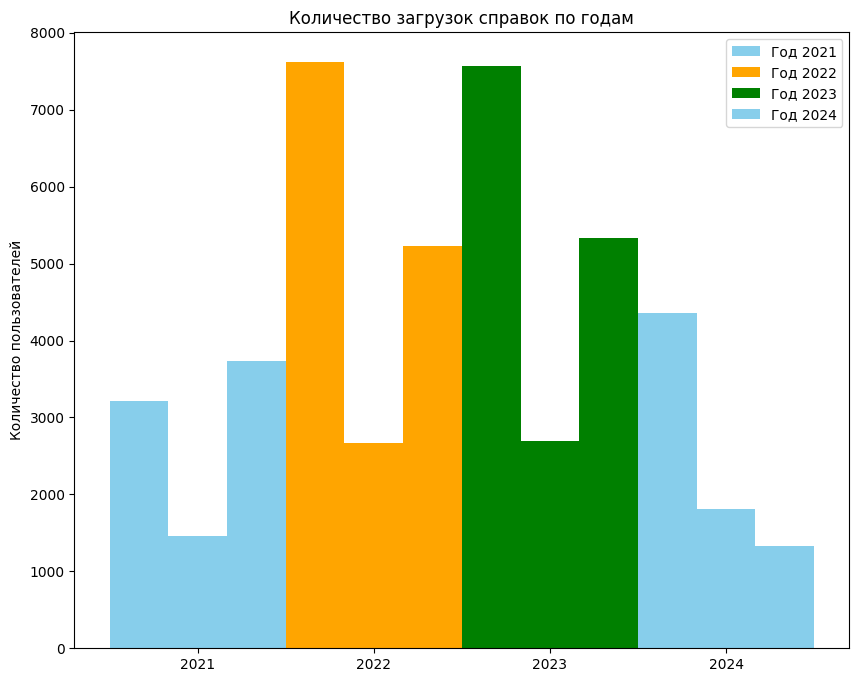

In [818]:
# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 8))

# Данные для графика
categories = ['1 раз', '2 раза', '3+ раза']
colors = ['skyblue', 'orange', 'green']

# Добавляем столбцы для каждого года
bar_width = 0.2  # Ширина столбца
group_width = len(categories) * bar_width  # Общая ширина группы столбцов для каждого года

for i, year in enumerate(years):
    counts = [data_by_year[year][category] for category in categories]
    positions = [i * group_width + offset * bar_width for offset in range(len(categories))]
    plt.bar(positions, counts, label=f'Год {year}', width=bar_width, color=colors[i % len(colors)])

# Настройки графика
ax.set_xticks([i * group_width + group_width / 2 - bar_width / 2 for i in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Количество пользователей')
ax.set_title('Количество загрузок справок по годам')
ax.legend()

# Отображаем график
plt.show()


Количество пользователей, загружающих справки один раз, увеличивается в 2022 и 2023 годах по сравнению с 2021 годом, а затем снижается в 2024 году, возможно это связано с неполными данными за текущий год.

Количество пользователей, загружающих справки три и более раза, также достигает пика в 2022 и 2023 годах

## Пересмотр подхода к активации

Эти данные показывают загрузку  справок в целом, но для анализа активности пользователей на основе дат загрузки справок о донациях, мы пересмотрим подход к подсчёту активных действий.

Учитывая, что многие пользователи после регистрации загружают справки одним разом за все возмоные прошлые даты и потом часто не проявляют активность, мы будем учитывать все справки загруженные в первую неделю после регистрации как одну.

Далее все последующие загрузки будут учитываться как активность так как это покажет влияние Donor Search на вовлечение пользователя

**Почему неделю?**

Потому что так часто кровь не сдают и скорее всего это все в прошлые даты.

**Почему мы просто не можем учитывать дату донации и если дата одна вычеркивать?**

Потому что это проле необязательное и часто пустое

**Почему не можем лишь одну дату брать а растягиваем на неделю?**

Потому что человек может подгружать все справки не в один день а растянуть процесс. Условно возьмем срок 1 неделю


- Для каждого пользователя найдем тех, кто загрузил справку в течение недели
после регистрации. Затем подсчитаем количество таких пользователей по годам регистрации.

- Построим графики, отображающие количество регистраций и количество пользователей, загрузивших справки в течение недели после регистрации, разбитые по годам.

- Выявим пользователей, которые загрузили справки после первой недели регистрации и посмотрим, как меняется их активность в зависимости от года регистрации.

- Разделим пользователей на когорты на основе количества их донаций и исследуем их активность.



In [819]:
# Еще раз взглянем на кол-во зарегистрировашихся по годам начиная с 2021
registrations_by_year

Дата регистрации
2021     9877
2022    19630
2023    15188
2024     4362
Name: count, dtype: int64

In [820]:
# Переименование столбца для корректного слияния
users_anon_data.rename(columns={'ID': 'ID пользователя'}, inplace=True)

# Слияние данных
merged_data = pd.merge(users_anon_data, donations_anon, on='ID пользователя', how='left')
merged_data.head()

,ID пользователя,Пол,Дата рождения,Регион_x,Группа крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный донор,Отвод от донации,Цельная кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата регистрации,Не подтверждённые донации,Прошедших донаций,Донаций до регистрации,Последняя активность,Теги,Указан email,Указан телефон,Авторизация через ВК,Авторизация через Одноклассники,Авторизация через Твиттер,Авторизация через Яндекс,Авторизация через Гугл,Подтверждённые донации,Получен значок 20,Получен значок 100,Получен значок друг DS,Отправлена футболка,Донаций на момент регистрации,Количество взятых бонусов,Возраст,ID,Класс крови,Дата донации,Дата планирования,Тип донации,Город,Регион_y,Страна,Место сдачи,Есть справка,Дата добавления донации,Статус донации
0,293070,Не указано,NaT,"Россия, Москва",A(II) Rh+,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2024-02-06,2,0,2,2024-02-06,['MainPage'],нет,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,2,0,NaN,325423.00,Цельная кровь,2024-01-19,Не указана,Безвозмездно,Москва,Не указан,Россия,Центр крови имени Гаврилова (Шаболовская),Нет,2024-02-06,Без справки
1,293070,Не указано,NaT,"Россия, Москва",A(II) Rh+,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2024-02-06,2,0,2,2024-02-06,['MainPage'],нет,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,2,0,NaN,325422.00,Цельная кровь,2024-04-26,Не указана,Безвозмездно,Москва,Не указан,Россия,"ГУЗ ""ГКБ № 1 им Н.И. Пирогова"", отделение пере...",Нет,2024-02-06,Без справки
2,293069,Мужской,1989-07-01,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2024-02-06,0,0,Не указано,NaT,['CardsMobile'],да,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,Не указано,0,35.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,293068,Не указано,NaT,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2024-02-06,0,0,8,2024-02-06,['MainPage'],да,нет,да,нет,нет,нет,нет,0,нет,нет,нет,нет,8,0,NaN,325443.00,Цельная кровь,2024-04-23,Не указана,Безвозмездно,Печора,Коми,Россия,Печорское отделение переливания крови ГУ «РСПК»,Да,2024-02-06,Принята
4,293068,Не указано,NaT,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2024-02-06,0,0,8,2024-02-06,['MainPage'],да,нет,да,нет,нет,нет,нет,0,нет,нет,нет,нет,8,0,NaN,325442.00,Плазма,2024-03-14,Не указана,Безвозмездно,Печора,Коми,Россия,Печорское отделение переливания крови ГУ «РСПК»,Да,2024-02-06,Принята


In [821]:
# Фильтрация донаций, загруженных в течение недели после регистрации
week_after_registration = merged_data[(merged_data['Дата добавления донации'] >= merged_data['Дата регистрации']) &
                                      (merged_data['Дата добавления донации'] <= merged_data['Дата регистрации'] + pd.Timedelta(days=7))]

# Выбор последней донации в этом интервале для каждого пользователя
week_after_registration = week_after_registration.sort_values('Дата добавления донации').drop_duplicates('ID пользователя', keep='last')

# Подсчет пользователей по годам регистрации, которые загрузили справку в течение недели
registrations_with_donations_within_week = week_after_registration['Дата регистрации'].dt.year.value_counts().sort_index()
registrations_with_donations_within_week

Дата регистрации
2020      53
2021     565
2022    2103
2023    2614
2024     890
Name: count, dtype: int64

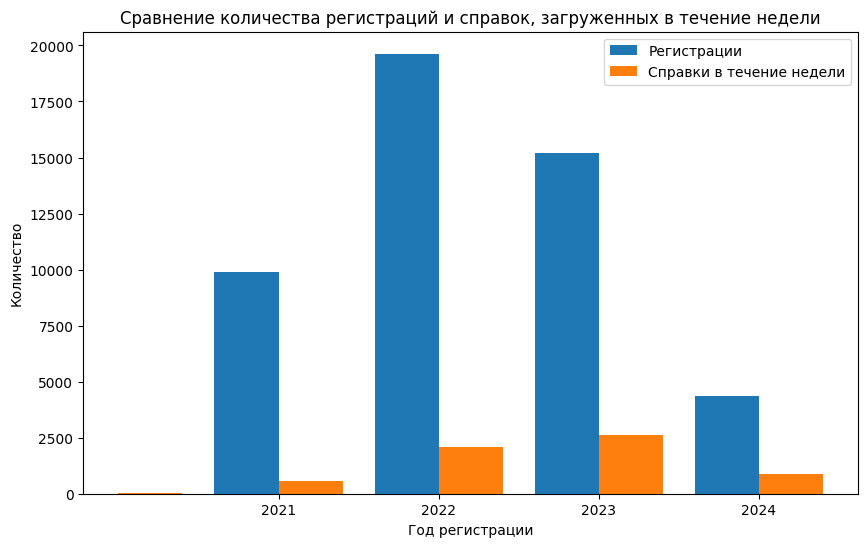

In [822]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.bar(registrations_by_year.index - 0.2, registrations_by_year.values, width=0.4, label='Регистрации')
plt.bar(registrations_with_donations_within_week.index + 0.2, registrations_with_donations_within_week.values, width=0.4, label='Справки в течение недели')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.title('Сравнение количества регистраций и справок, загруженных в течение недели')
plt.legend()
plt.xticks(registrations_by_year.index)
plt.show()


### Анализ последующих загрузок справок
Теперь выясним, сколько пользователей загружали справки после первой недели регистрации. Это позволит оценить долгосрочную активность пользователей, показывая их вовлеченность после начального периода.

In [823]:
# Фильтрация донаций, загруженных после первой недели регистрации
after_first_week = merged_data[(merged_data['Дата добавления донации'] > merged_data['Дата регистрации'] + pd.Timedelta(days=7))]

# Выбор последней донации для каждого пользователя
after_first_week = after_first_week.sort_values('Дата добавления донации').drop_duplicates('ID пользователя', keep='last')

# Подсчет пользователей по годам регистрации, которые загрузили справку после первой недели
registrations_with_late_donations = after_first_week['Дата регистрации'].dt.year.value_counts().sort_index()


In [824]:
registrations_with_late_donations

Дата регистрации
2018    1212
2019      50
2020     152
2021     432
2022    1227
2023     954
2024     279
Name: count, dtype: int64

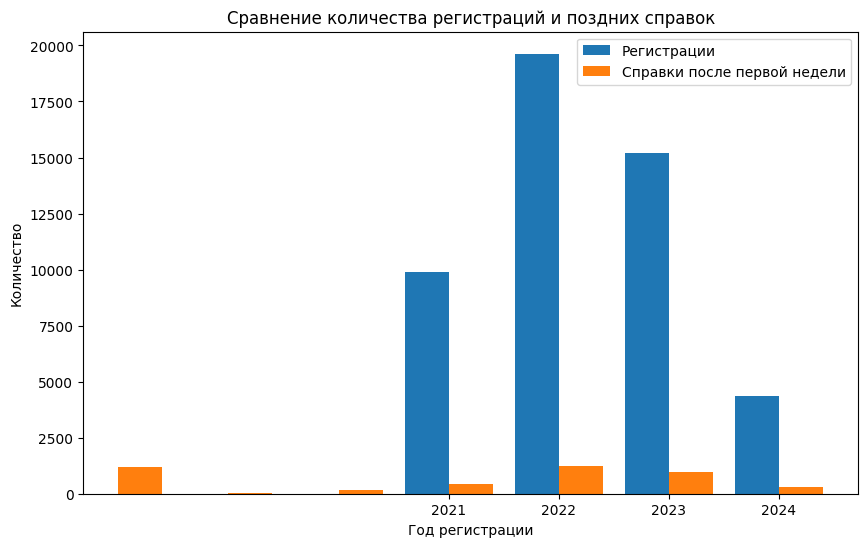

In [825]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.bar(registrations_by_year.index - 0.2, registrations_by_year.values, width=0.4, label='Регистрации')
plt.bar(registrations_with_late_donations.index + 0.2, registrations_with_late_donations.values, width=0.4, label='Справки после первой недели')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.title('Сравнение количества регистраций и поздних справок')
plt.legend()
plt.xticks(registrations_by_year.index)
plt.show()


### Сравним тех кто загрузил все справки и пропал и тех, кто продолжил загружать после 1 недели

Мы  определили пользователей, которые загрузили свои первые справки в течение первой недели после регистрации и тех, кто продолжил загружать справки после этого периода.

Теперь мы можем сравнить эти две группы пользователей, чтобы увидеть, как они различаются в плане долгосрочной активности.

Пользователи, загрузившие только в первую неделю: week_after_registration, которые больше не загружали справки.
Пользователи, продолжившие загружать справки: after_first_week.

**Определим пользователей из трех групп:**

In [826]:
# Список пользователей, загрузивших справки после первой недели
users_active_later = after_first_week['ID пользователя'].unique()
users_active_later.shape[0]

4306

In [827]:
# Фильтрация пользователей, загрузивших справки только в первую неделю
only_first_week = week_after_registration[~week_after_registration['ID пользователя'].isin(users_active_later)]
only_first_week.shape

(4985, 52)

In [828]:
# Подсчет количества  пользователей которые ушли после первой недели по годам регистрации
registrations_only_first_week = only_first_week['Дата регистрации'].dt.year.value_counts().sort_index()
registrations_only_first_week

Дата регистрации
2020      43
2021     423
2022    1604
2023    2175
2024     740
Name: count, dtype: int64

количество пользователей по каждому году регистрации, которые не продолжили активность на платформе после первой недели использования. Эта метрика может быть полезна для анализа "оттока" пользователей и оценки эффективности стратегий по удержанию пользователей

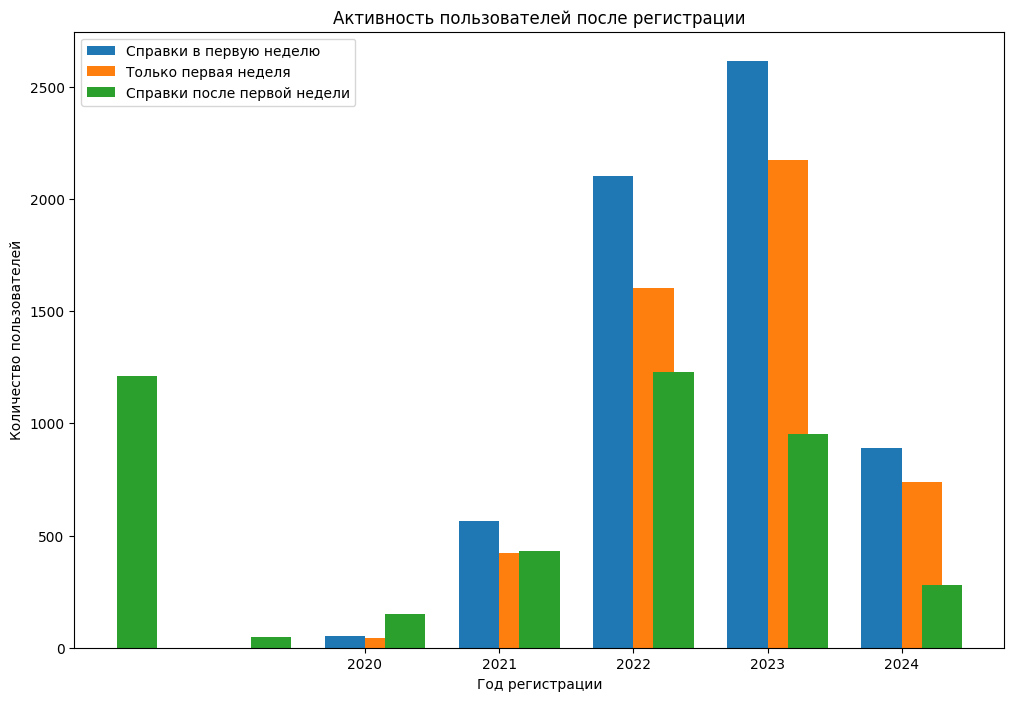

In [829]:
plt.figure(figsize=(12, 8))
plt.bar(registrations_with_donations_within_week.index - 0.15, registrations_with_donations_within_week.values, width=0.3, label='Справки в первую неделю')
plt.bar(registrations_only_first_week.index, registrations_only_first_week.values, width=0.3, label='Только первая неделя', align='edge')
plt.bar(registrations_with_late_donations.index + 0.15, registrations_with_late_donations.values, width=0.3, label='Справки после первой недели', align='edge')
plt.xlabel('Год регистрации')
plt.ylabel('Количество пользователей')
plt.title('Активность пользователей после регистрации')
plt.xticks(registrations_with_donations_within_week.index)
plt.legend()
plt.show()


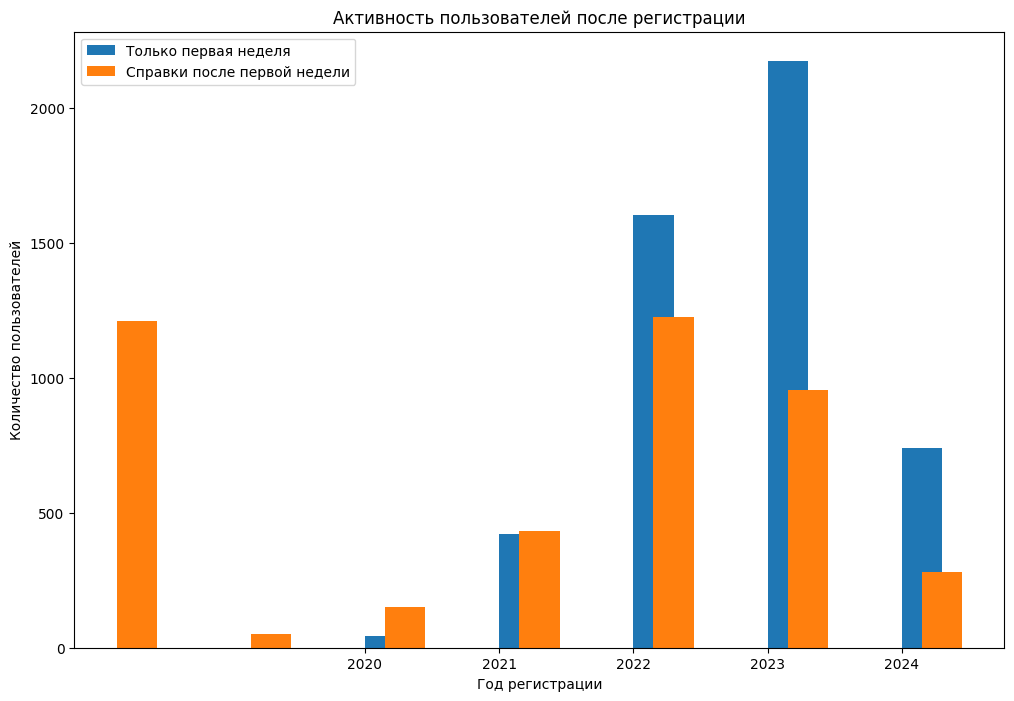

In [830]:
plt.figure(figsize=(12, 8))
plt.bar(registrations_only_first_week.index, registrations_only_first_week.values, width=0.3, label='Только первая неделя', align='edge')
plt.bar(registrations_with_late_donations.index + 0.15, registrations_with_late_donations.values, width=0.3, label='Справки после первой недели', align='edge')
plt.xlabel('Год регистрации')
plt.ylabel('Количество пользователей')
plt.title('Активность пользователей после регистрации')
plt.xticks(registrations_with_donations_within_week.index)
plt.legend()
plt.show()

### Выводы по активности и оттоку по годам:

**2020 год:**

- Только первая неделя: 43 пользователя
- Справки после первой недели: 152 пользователя
- Процент продолживших активность:78%

**2021 год:**

- Только первая неделя: 423 пользователя
- Справки после первой недели: 432 пользователя
- Процент продолживших активность: ≈51%

**2022 год:**

- Только первая неделя: 1,604 пользователя
- Справки после первой недели: 1,227 пользователя
- Процент продолживших активность:≈43%

**2023 год:**

- Только первая неделя: 2,175 пользователя
- Справки после первой недели: 954 пользователя
- Процент продолживших активность: ≈30%

**2024 год:**

- Только первая неделя: 740 пользователя
- Справки после первой недели: 279 пользователя
- Процент продолживших активность: ≈27%

#### Рекомендации

**Падение активности в последующие годы:**

Заметно, что процент пользователей, продолживших активность после первой недели, снижается с каждым годом. Это может указывать на уменьшение вовлеченности новых пользователей или на возможные проблемы в стимулировании долгосрочной активности.

**Необходимость улучшения стратегий удержания:**

Данные подчеркивают важность разработки стратегий, которые могут улучшить удержание пользователей, особенно в первые дни после регистрации.

**Анализ причин оттока:**

Важно исследовать причины, по которым пользователи перестают быть активными после первой недели, чтобы разработать меры по улучшению пользовательского опыта и повышению общей активности на платформе.

### Анализ когорт по количеству донаций
Далее,  разделим пользователей на когорты по количеству их донаций и изучим активность каждой когорты.

Начнем с общего разделения, то есть мы включаем и тех, кто загружал справки в течение первой недели и пропал и тех, кто продолжил активность

In [831]:
# Создание когорт по количеству донаций
donations_cohorts = users_anon_data.groupby(pd.cut(users_anon_data['Прошедших донаций'], bins=[0, 5, 10, 20, 50, 100, np.inf])).size()
donations_cohorts

Прошедших донаций
(0.0, 5.0]       32057
(5.0, 10.0]       3421
(10.0, 20.0]      2466
(20.0, 50.0]      3180
(50.0, 100.0]      586
(100.0, inf]       208
dtype: int64

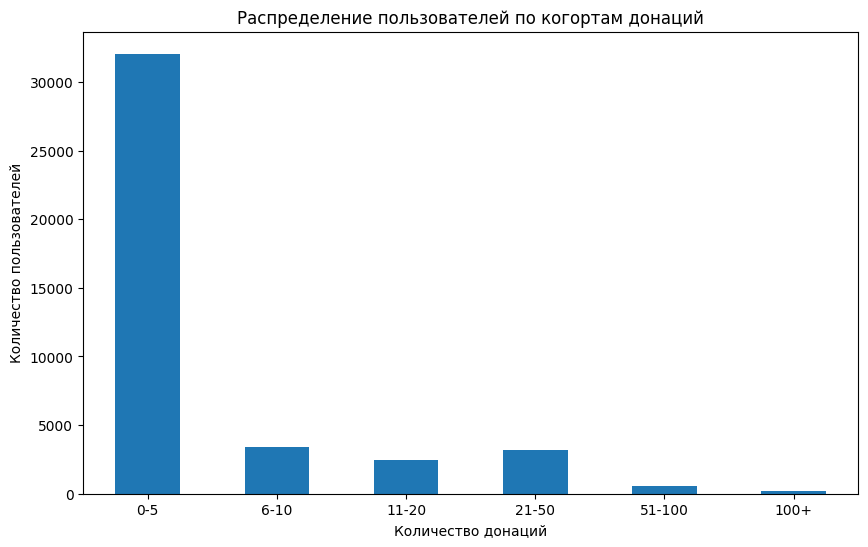

In [832]:
# Создание когорт по количеству донаций
bins = [0, 5, 10, 20, 50, 100, float('inf')]
labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '100+']
donations_cohorts = users_anon_data.groupby(pd.cut(users_anon_data['Прошедших донаций'], bins=bins, labels=labels)).size()

# Визуализация данных
plt.figure(figsize=(10, 6))
donations_cohorts.plot(kind='bar')
plt.xlabel('Количество донаций')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по когортам донаций')
plt.xticks(rotation=0)
plt.show()


#### Когорты активных доноров по количеству донаций
Пользователи которые продолжили загружать справки после первой недели -  разделим их на когорты на основе количества сдач крови.





In [833]:
# Фильтрация данных для пользователей, продолживших загружать справки после первой недели
active_users_data = merged_data[merged_data['ID пользователя'].isin(users_active_later)]

# Группирование пользователей по количеству сдач крови и формирование когорт
donation_cohorts = pd.cut(active_users_data['Прошедших донаций'], bins=[0, 5, 10, 20, 50, 100, np.inf], labels=['1-5', '6-10', '11-20', '21-50', '51-100', '100+'])
cohort_counts = active_users_data.groupby(donation_cohorts)['ID пользователя'].nunique()
cohort_counts

Прошедших донаций
1-5       1585
6-10       554
11-20      538
21-50      989
51-100     219
100+        79
Name: ID пользователя, dtype: int64

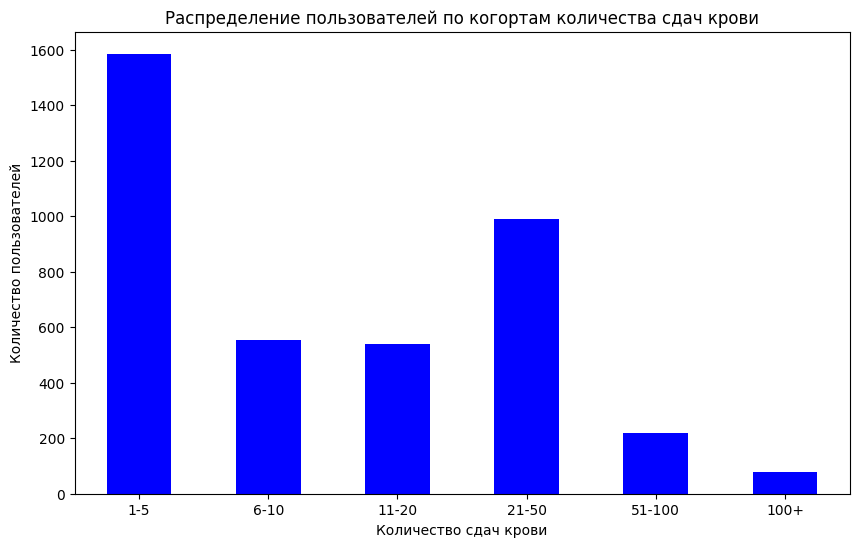

In [834]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
cohort_counts.plot(kind='bar', color='blue')
plt.title('Распределение пользователей по когортам количества сдач крови')
plt.xlabel('Количество сдач крови')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.show()


#### **Выводы и рекомендации для когорт активных доноров**

- Большинство активности (1585 пользователей) приходится на когорту "1-5 сдач крови". Это указывает на то, что новые доноры часто прекращают активность после первых нескольких сдач.

- Активность снижается по мере увеличения числа сдач: В когортах "6-10" и "11-20" находятся 554 и 538 пользователей соответственно. При переходе к "21-50 сдачам" число доноров увеличивается до 989, что может указывать на более стойкую мотивацию этой группы.

- Долгосрочные доноры редки: Когорты "51-100" и "100+" насчитывают только 219 и 79 пользователей соответственно.

**Рекомендации:**

- Усиление мотивации начинающих доноров: Необходимо разработать программы, которые поддерживали бы интерес и мотивацию доноров в первых 5 сдачах, чтобы предотвратить ранний отток.

- Программы лояльности для среднесрочной активности: Создать стимулы для доноров в категориях "6-20 сдач", чтобы помочь им перейти в более активные когорты.

- Повышение признания и наград для долгосрочных доноров: Предложить дополнительные льготы или награды для доноров, превышающих 50 сдач, чтобы поддержать их долгосрочную активность и преданность.

## ПОЖЕРТВОВАНИЯ


In [835]:
payments_common_data.head(10)

,идентификатор платежа,дата и время создания платежа,дата и время отправки платежа,дата и время получения результата об успешности платежа,дата и время отмены платежа,платёжный оператор,статус платежа,тип платежа,метод платежа,id аккаунта,подписка,реккурент первый,номер реккурентного платежа,статус подписки,сумма платежа,сумма без комиссии,сумма комиссии,валюта,дата рождения,IP,платежная система карты,срок действия карты,комментарий,id сбора,код ошибки,utm_source,utm_campaign,utm_term,utm_medium,utm_content
0,2124411519,2024-07-15 07:02:23,2024-07-15 07:02:24,2024-07-15 07:02:24.649131,NaN,CLOUDPAYMENTS,COMPLETED,ONETIME,MIRPAY,4679.00,NaN,NaN,0,NaN,1000.00,961.00,39.00,RUB,1972-10-11,78.81.151.117,MIR,12/99,NaN,NaN,NaN,mobile_header,donor_search,NaN,ds,NaN
1,2124408925,2024-07-15 06:27:34,2024-07-15 06:27:36,2024-07-15 06:27:37.225669,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,140531.00,sc_c43417cadf50a3fca4ebbb2ef4d16,True,2,ACTIVE,100.00,96.10,3.90,RUB,1996-11-14,172.18.10.27,MIR,09/27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2124382703,2024-07-14 23:04:45,NaN,NaN,2024-07-14 23:04:47.765825,CLOUDPAYMENTS,DECLINED,RECURRING,NaN,4679.00,NaN,NaN,0,NaN,1000.00,NaN,NaN,RUB,1972-10-11,172.18.10.60,MIR,12/99,NaN,NaN,5062.00,NaN,NaN,NaN,NaN,NaN
3,2124376268,2024-07-14 22:09:01,2024-07-14 22:09:01,2024-07-14 22:09:02.461736,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,293894.00,sc_db0d37614c85e2b47b6b21cb713e3,True,2,ACTIVE,300.00,288.30,11.70,RUB,1997-09-17,172.18.10.61,MASTERCARD,03/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2124373073,2024-07-14 21:42:05,2024-07-14 21:42:06,2024-07-14 21:42:06.892333,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,MIRPAY,288512.00,sc_f5499480c324bed2db575776ffdd1,False,1,ACTIVE,100.00,96.10,3.90,RUB,2001-05-12,109.254.254.183,MIR,12/99,NaN,85.00,NaN,NaN,NaN,NaN,NaN,NaN
5,2124372044,2024-07-14 21:32:53,NaN,NaN,2024-07-14 21:32:55.036108,CLOUDPAYMENTS,DECLINED,RECURRING,NaN,288512.00,NaN,NaN,0,NaN,100.00,NaN,NaN,RUB,2001-05-12,172.18.10.59,MIR,12/30,NaN,NaN,5051.00,NaN,NaN,NaN,NaN,NaN
6,2124324161,2024-07-14 15:49:53,2024-07-14 15:49:54,2024-07-14 15:49:54.786030,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,198818.00,sc_e6896b3374d9ed31b6fc6a7356feb,False,2,ACTIVE,101.00,97.06,3.94,RUB,1986-04-15,172.18.10.59,MASTERCARD,04/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2124322530,2024-07-14 15:37:53,2024-07-14 15:38:18,2024-07-14 15:38:18.906914,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,YANDEXPAY,NaN,sc_3a7fde4cf8f29c11b58e9e3f53d6b,False,1,ACTIVE,300.00,288.30,11.70,RUB,NaN,95.24.216.216,MIR,12/99,NaN,NaN,NaN,Sendsay,T_donation_subscribe_cancel,NaN,email,NaN
8,2124312538,2024-07-14 14:28:54,2024-07-14 14:28:55,2024-07-14 14:28:56.097165,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,256772.00,sc_ec9154aa3306614511fa5a3fde73b,True,2,ACTIVE,300.00,288.30,11.70,RUB,1981-05-27,172.18.10.22,VISA,06/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2124290491,2024-07-14 12:17:16,NaN,NaN,2024-07-14 12:17:18.583932,CLOUDPAYMENTS,DECLINED,RECURRING,NaN,214223.00,NaN,NaN,0,NaN,500.00,NaN,NaN,RUB,1997-03-28,172.18.10.31,MASTERCARD,06/30,NaN,NaN,5051.00,NaN,NaN,NaN,NaN,NaN


In [836]:
payments_common_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 30 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   идентификатор платежа                                    4714 non-null   int64  
 1   дата и время создания платежа                            4714 non-null   object 
 2   дата и время отправки платежа                            3887 non-null   object 
 3   дата и время получения результата об успешности платежа  3887 non-null   object 
 4   дата и время отмены платежа                              573 non-null    object 
 5   платёжный оператор                                       4714 non-null   object 
 6   статус платежа                                           4714 non-null   object 
 7   тип платежа                                              4714 non-null   object 
 8   метод платежа               

### Сколько стали жертвователями?



Сначала отфильтруем данные по статусу "COMPLETED".


In [837]:
# Отфильтровываем данные по статусу 'COMPLETED'
completed_payments = payments_common_data[payments_common_data['статус платежа'] == 'COMPLETED']

# Проверим, какие поля имеют отношение к платформе или методу платежа
print(completed_payments['метод платежа'].unique())
print(completed_payments['тип платежа'].unique())


['MIRPAY' nan 'YANDEXPAY' 'SBP' 'TINKOFFPAY' 'GOOGLEPAY']
['ONETIME' 'RECURRING']


Итак, у нас есть различные методы платежей и два типа платежей: одноразовые (ONETIME) и рекуррентные (RECURRING)

Есть методы платежа ['MIRPAY' nan 'YANDEXPAY' 'SBP' 'TINKOFFPAY' 'GOOGLEPAY']

nan - это похоже неизвестно

Дополнительная разбивка:
Используем поля `utm_source` и `utm_campaign` для дальнейшего анализа источников трафика и кампаний.

In [838]:
# Заменяем NaN на "Неизвестный" для включения в анализ
completed_payments['метод платежа'].fillna('Неопознанный метод', inplace=True)
# Группируем данные по методу платежа и суммируем суммы
payment_method_sums = completed_payments.groupby('метод платежа')['сумма платежа'].sum().sort_values(ascending=False)
payment_method_sums



метод платежа
Неопознанный метод   770086.00
SBP                  120703.00
TINKOFFPAY            98975.00
YANDEXPAY             87190.00
MIRPAY                34315.00
GOOGLEPAY               800.00
Name: сумма платежа, dtype: float64

In [839]:
# Группируем данные по типу платежа и суммируем суммы
payment_type_sums = completed_payments.groupby('тип платежа')['сумма платежа'].sum()
payment_type_sums

тип платежа
ONETIME     620486.00
RECURRING   491583.00
Name: сумма платежа, dtype: float64

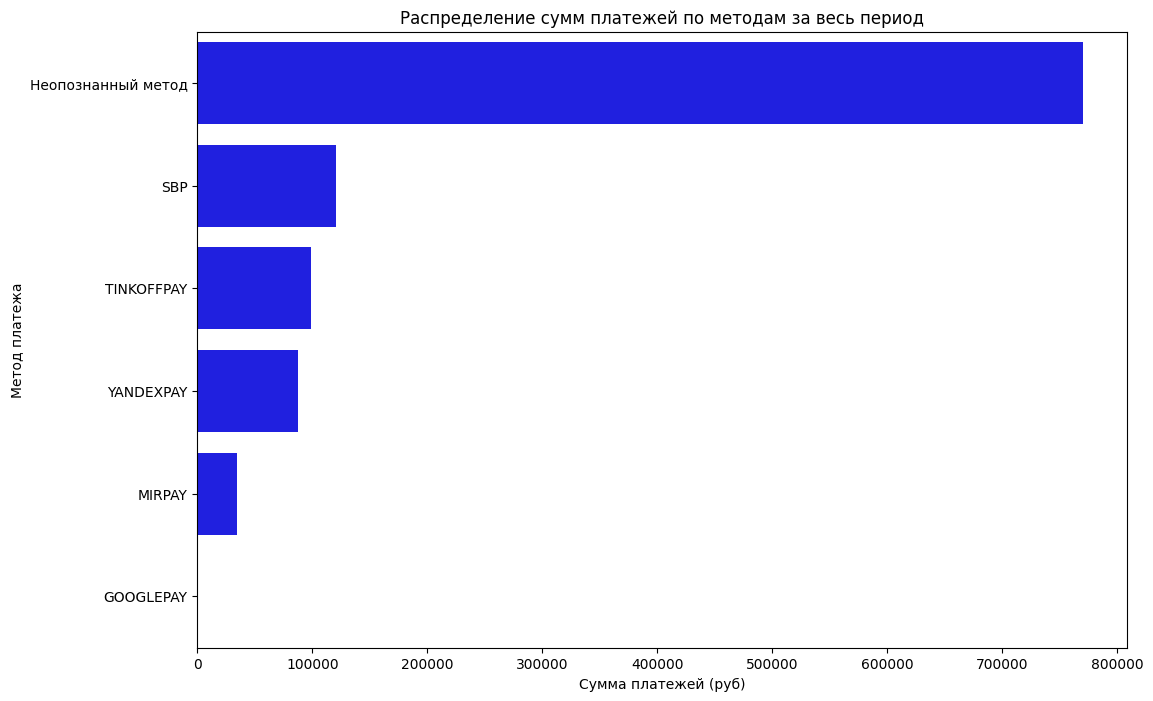

In [840]:
# Визуализация по методам платежа
plt.figure(figsize=(12, 8))
sns.barplot(x=payment_method_sums.values, y=payment_method_sums.index, color='blue')
plt.title('Распределение сумм платежей по методам за весь период')
plt.ylabel('Метод платежа')
plt.xlabel('Сумма платежей (руб)')
plt.ticklabel_format(style='plain', axis='x')  # Убираем экспоненциальное отображение
plt.show()

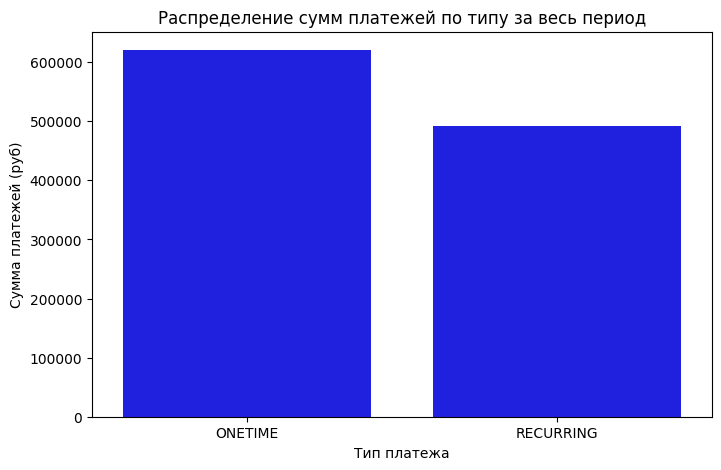

In [841]:
# Визуализация по типам платежа
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_type_sums.index, y=payment_type_sums.values, color='blue')
plt.title('Распределение сумм платежей по типу за весь период')
plt.xlabel('Тип платежа')
plt.ylabel('Сумма платежей (руб)')
plt.ticklabel_format(style='plain', axis='y')  # Убираем экспоненциальное отображение
plt.show()

Разобъем по годам

In [842]:
# Преобразуем дату создания платежа в datetime
completed_payments['дата и время создания платежа'] = pd.to_datetime(completed_payments['дата и время создания платежа'])

# Группируем данные по году, методу платежа и суммируем суммы
yearly_method_sums = completed_payments.groupby([completed_payments['дата и время создания платежа'].dt.year, 'метод платежа'])['сумма платежа'].sum().unstack().fillna(0)
yearly_method_sums


метод платежа,GOOGLEPAY,MIRPAY,SBP,TINKOFFPAY,YANDEXPAY,Неопознанный метод
дата и время создания платежа,,,,,,
2017,0.00,0.00,0.00,0.00,0.00,15138.00
2018,0.00,0.00,0.00,0.00,0.00,28070.00
2019,0.00,0.00,0.00,0.00,0.00,50054.00
2020,0.00,0.00,0.00,0.00,0.00,40148.00
2021,300.00,0.00,0.00,0.00,0.00,30800.00
2022,500.00,0.00,0.00,0.00,9230.00,81338.00
2023,0.00,7450.00,0.00,23537.00,16936.00,178661.00
2024,0.00,26865.00,120703.00,75438.00,61024.00,345877.00


In [843]:
# Группируем данные по году, типу платежа и суммируем суммы
yearly_type_sums = completed_payments.groupby([completed_payments['дата и время создания платежа'].dt.year, 'тип платежа'])['сумма платежа'].sum().unstack().fillna(0)
yearly_type_sums


тип платежа,ONETIME,RECURRING
дата и время создания платежа,,
2017,6678.00,8460.00
2018,4180.00,23890.00
2019,12754.00,37300.00
2020,22248.00,17900.00
2021,9800.00,21300.00
2022,43445.00,47623.00
2023,122208.00,104376.00
2024,399173.00,230734.00


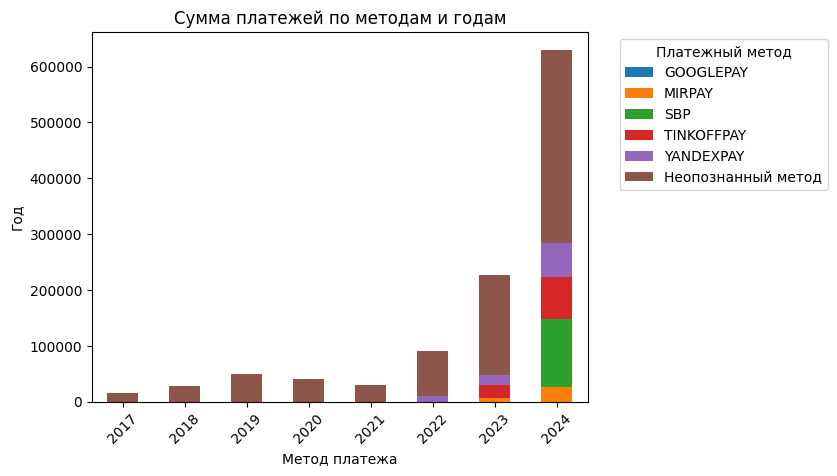

In [844]:
# Визуализация по методам платежа по годам
yearly_method_sums.plot(kind='bar', stacked=True)
plt.title('Сумма платежей по методам и годам')
plt.ylabel('Год')
plt.xlabel('Метод платежа')
plt.xticks(rotation=45)
plt.legend(title='Платежный метод', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

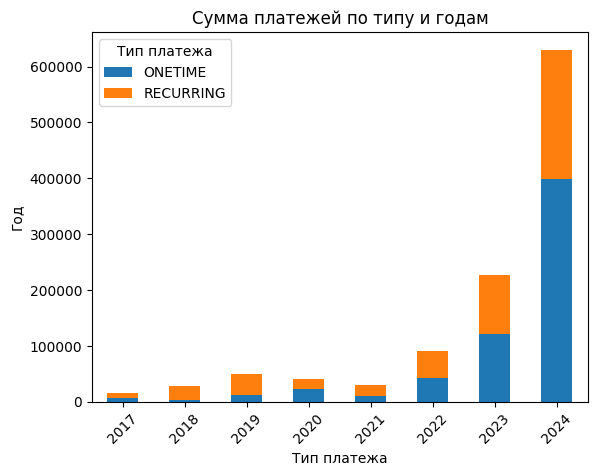

In [845]:
# Визуализация по типам платежа по годам
yearly_type_sums.plot(kind='bar', stacked=True)
plt.title('Сумма платежей по типу и годам')
plt.ylabel('Год')
plt.xlabel('Тип платежа')
plt.xticks(rotation=45)
plt.legend(title='Тип платежа')
plt.show()

## Портрет жертвователя

### Посмотрим, немного обработаем и объединим данные

In [846]:
clients_anon.head()

,ID,В стоп-л,Email польз.,Email VK,Email Yandex,Email Google,Email OK,Email Twitter,Email FB,ID пользователя,Дата рождения,Кол-во транзакций,Накоп. сумма,Посл. пожер.
0,1381,Нет,-,-,-,-,-,-,-,Не указано,NaT,1,0.00,2024-01-06 08:37:50
1,1380,Нет,Есть,-,-,-,-,-,-,292252,1977-12-22,1,100.00,NaT
2,1379,Нет,-,-,-,-,-,-,-,Не указано,NaT,1,100.00,NaT
3,1378,Нет,Есть,-,-,Есть,-,-,-,150952,1992-06-03,1,500.00,NaT
4,1377,Нет,Есть,-,-,-,-,-,-,244603,2004-09-06,1,100.00,NaT


Объединим датасеты payments_common_data и clients_anon по полю "ID пользователя" и ID аккаунта, чтобы мы могли анализировать данные платежей в контексте информации о пользователях.



In [847]:
clients_anon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 1379 non-null   int64         
 1   В стоп-л           1379 non-null   object        
 2   Email польз.       1379 non-null   object        
 3   Email VK           1379 non-null   object        
 4   Email Yandex       1379 non-null   object        
 5   Email Google       1379 non-null   object        
 6   Email OK           1379 non-null   object        
 7   Email Twitter      1379 non-null   object        
 8   Email FB           1379 non-null   object        
 9   ID пользователя    1379 non-null   object        
 10  Дата рождения      521 non-null    datetime64[ns]
 11  Кол-во транзакций  1379 non-null   int64         
 12  Накоп. сумма       1379 non-null   float64       
 13  Посл. пожер.       505 non-null    datetime64[ns]
dtypes: datet

In [848]:
payments_common_data.head()

,идентификатор платежа,дата и время создания платежа,дата и время отправки платежа,дата и время получения результата об успешности платежа,дата и время отмены платежа,платёжный оператор,статус платежа,тип платежа,метод платежа,id аккаунта,подписка,реккурент первый,номер реккурентного платежа,статус подписки,сумма платежа,сумма без комиссии,сумма комиссии,валюта,дата рождения,IP,платежная система карты,срок действия карты,комментарий,id сбора,код ошибки,utm_source,utm_campaign,utm_term,utm_medium,utm_content
0,2124411519,2024-07-15 07:02:23,2024-07-15 07:02:24,2024-07-15 07:02:24.649131,NaN,CLOUDPAYMENTS,COMPLETED,ONETIME,MIRPAY,4679.00,NaN,NaN,0,NaN,1000.00,961.00,39.00,RUB,1972-10-11,78.81.151.117,MIR,12/99,NaN,NaN,NaN,mobile_header,donor_search,NaN,ds,NaN
1,2124408925,2024-07-15 06:27:34,2024-07-15 06:27:36,2024-07-15 06:27:37.225669,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,140531.00,sc_c43417cadf50a3fca4ebbb2ef4d16,True,2,ACTIVE,100.00,96.10,3.90,RUB,1996-11-14,172.18.10.27,MIR,09/27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2124382703,2024-07-14 23:04:45,NaN,NaN,2024-07-14 23:04:47.765825,CLOUDPAYMENTS,DECLINED,RECURRING,NaN,4679.00,NaN,NaN,0,NaN,1000.00,NaN,NaN,RUB,1972-10-11,172.18.10.60,MIR,12/99,NaN,NaN,5062.00,NaN,NaN,NaN,NaN,NaN
3,2124376268,2024-07-14 22:09:01,2024-07-14 22:09:01,2024-07-14 22:09:02.461736,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,NaN,293894.00,sc_db0d37614c85e2b47b6b21cb713e3,True,2,ACTIVE,300.00,288.30,11.70,RUB,1997-09-17,172.18.10.61,MASTERCARD,03/25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2124373073,2024-07-14 21:42:05,2024-07-14 21:42:06,2024-07-14 21:42:06.892333,NaN,CLOUDPAYMENTS,COMPLETED,RECURRING,MIRPAY,288512.00,sc_f5499480c324bed2db575776ffdd1,False,1,ACTIVE,100.00,96.10,3.90,RUB,2001-05-12,109.254.254.183,MIR,12/99,NaN,85.00,NaN,NaN,NaN,NaN,NaN,NaN


In [849]:
payments_anon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3964 entries, 0 to 3963
Data columns (total 26 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   идентификатор платежа                                    3964 non-null   int64         
 1   дата и время создания платежа                            3964 non-null   datetime64[ns]
 2   дата и время отправки платежа                            3272 non-null   datetime64[ns]
 3   дата и время получения результата об успешности платежа  1495 non-null   datetime64[ns]
 4   дата и время отмены платежа                              171 non-null    datetime64[ns]
 5   платёжный оператор                                       3964 non-null   object        
 6   статус платежа                                           3964 non-null   object        
 7   тип платежа                                        

In [850]:
print(payments_common_data['id аккаунта'].dtype)
print(clients_anon['ID пользователя'].dtype)


float64
object


In [851]:
payments_common_data['id аккаунта'] = payments_common_data['id аккаунта'].astype(str)
clients_anon['ID пользователя'] = clients_anon['ID пользователя'].astype(str)


In [852]:
payments_common_data['id аккаунта'] = payments_common_data['id аккаунта'].astype(str)
clients_anon['ID пользователя'] = clients_anon['ID пользователя'].astype(str)


In [853]:
print(payments_common_data['id аккаунта'].dtype)
print(clients_anon['ID пользователя'].dtype)

object
object


In [854]:
# Выполним объединение двух наборов данных:
merged_clients_payments = pd.merge(payments_common_data, clients_anon, left_on='id аккаунта', right_on='ID пользователя', how='inner')
merged_clients_payments.shape

(0, 44)

In [855]:
print("Уникальные ID аккаунтов в payments_common_data:", payments_common_data['id аккаунта'].unique()[:20])
print("Уникальные ID пользователей в clients_anon:", clients_anon['ID пользователя'].unique()[:20])


Уникальные ID аккаунтов в payments_common_data: ['4679.0' '140531.0' '293894.0' '288512.0' '198818.0' 'nan' '256772.0'
 '214223.0' '137903.0' '284326.0' '9091.0' '82226.0' '135235.0' '241516.0'
 '296176.0' '141625.0' '210275.0' '281477.0' '142147.0' '142337.0']
Уникальные ID пользователей в clients_anon: ['Не указано' '292252' '150952' '244603' '253837' '224803' '292247'
 '140566' '164261' '180657' '291197' '284326' '131205' '200298' '149456'
 '142006' '215049' '277629' '152333' '268244']


в payments_common_data, значения id аккаунта включают десятичные значения (в виде строки с .0), что указывает на то, что они могли быть преобразованы из чисел в строки, не отбросив десятичную часть

удалим десятичную часть в id аккаунта и исключим строки с "Не указано" в ID пользователя

In [856]:
# Удаление десятичной точки и следующего за ней нуля
payments_common_data['id аккаунта'] = payments_common_data['id аккаунта'].str.replace('.0', '', regex=False)

# Фильтрация клиентов, у которых ID указан
filtered_clients_anon = clients_anon[clients_anon['ID пользователя'] != 'Не указано']

# Повторное объединение
merged_clients_payments = pd.merge(payments_common_data, filtered_clients_anon, left_on='id аккаунта', right_on='ID пользователя', how='inner')
print(merged_clients_payments.shape)


(3318, 44)


Отлично, теперь у нас есть объединённый датасет merged_clients_payments с 3318 записями.

### Разделение и аггрегация по годам для разовых и рекурентных платежей

Начнем с простого разделения по годам создания платежей и агрегирования некоторых основных данных о пользователях.

In [857]:
# Преобразуем столбец в datetime, если это не было сделано
merged_clients_payments['дата и время создания платежа'] = pd.to_datetime(merged_clients_payments['дата и время создания платежа'])

# Добавляем столбец года создания платежа
merged_clients_payments['Год платежа'] = merged_clients_payments['дата и время создания платежа'].dt.year

# Группировка данных по году с агрегацией интересующих параметров
aggregated_data_by_year = merged_clients_payments.groupby('Год платежа').agg({
    'сумма платежа': 'sum',
    'ID пользователя': pd.Series.nunique,
    'тип платежа': lambda x: x.value_counts().index[0],  # Самый частый тип платежа
    'Дата рождения': ['min', 'max']  # для  возраста
}).reset_index()

aggregated_data_by_year


Год платежа сумма платежа ID пользователя тип платежа Дата рождения           
                        sum         nunique    <lambda>           min        max
0        2017      11750.00              44   RECURRING    1971-11-21 1998-11-06
1        2018      19800.00              34   RECURRING    1977-03-21 1998-03-17
2        2019      39130.00              36   RECURRING    1965-05-25 2001-07-31
3        2020      37120.00              20   RECURRING    1966-08-13 1998-07-17
4        2021      22200.00              16   RECURRING    1972-11-07 1997-05-25
5        2022      72135.00             122   RECURRING    1970-09-04 2003-11-21
6        2023     295032.00             283   RECURRING    1964-10-31 2005-02-20
7        2024     649081.00             323   RECURRING    1964-05-01 2005-09-20

Видим что вперед вышли рекурентные платежи. При агрегации думаю стоит считать отдельно разовые платежи и рекурентные. Разовые тоже могут быть несколько раз.

Разделим анализ на разовые (ONETIME) и рекуррентные (RECURRING) платежи.

Сделаем группировку данных отдельно для каждого типа платежей по годам и  затем агрегацию.

In [858]:
# Фильтрация разовых платежей и их агрегация по годам
onetime_payments = merged_clients_payments[merged_clients_payments['тип платежа'] == 'ONETIME']
aggregated_onetime = onetime_payments.groupby(onetime_payments['дата и время создания платежа'].dt.year).agg({
    'сумма платежа': ['sum', 'count'],
    'ID пользователя': 'nunique',
    'Дата рождения': ['min', 'max']
})

aggregated_onetime

сумма платежа       ID пользователя Дата рождения           
                                        sum count         nunique           min        max
дата и время создания платежа                                                             
2017                                4250.00    32              31    1971-11-21 1998-11-06
2018                                2300.00    19              16    1977-03-21 1998-02-27
2019                                9930.00    57              22    1965-05-25 2001-07-31
2020                               17220.00    47               7    1976-04-22 1998-07-17
2021                                1500.00     5               5    1972-11-07 1991-06-06
2022                               33385.00    86              72    1970-09-04 2003-11-21
2023                              199338.00   375             202    1964-10-31 2005-02-20
2024                              407854.00   612             214    1964-05-01 2005-09-20

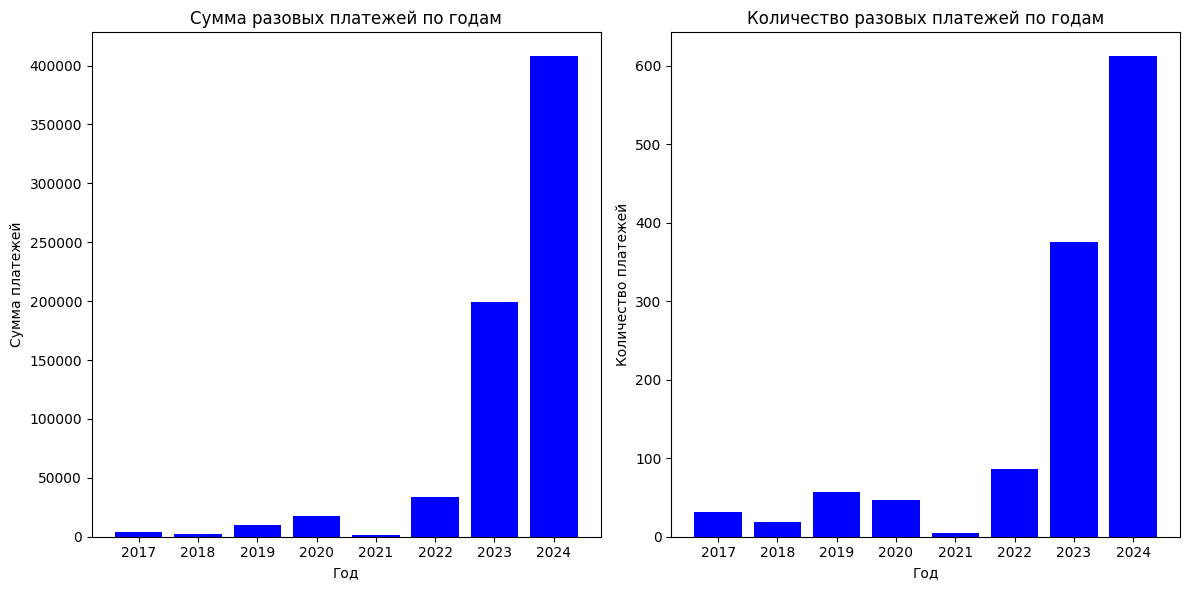

In [859]:
# Визуализация данных по разовым платежам
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Первый подграфик
plt.bar(aggregated_onetime.index, aggregated_onetime[('сумма платежа', 'sum')], color='blue', label='Сумма платежей')
plt.title('Сумма разовых платежей по годам')
plt.xlabel('Год')
plt.ylabel('Сумма платежей')

plt.subplot(1, 2, 2)  # Второй подграфик
plt.bar(aggregated_onetime.index, aggregated_onetime[('сумма платежа', 'count')], color='blue', label='Количество платежей')
plt.title('Количество разовых платежей по годам')
plt.xlabel('Год')
plt.ylabel('Количество платежей')

plt.tight_layout()
plt.show()

In [860]:
# Фильтрация рекуррентных платежей и их агрегация по годам
recurring_payments = merged_clients_payments[merged_clients_payments['тип платежа'] == 'RECURRING']
aggregated_recurring = recurring_payments.groupby(recurring_payments['дата и время создания платежа'].dt.year).agg({
    'сумма платежа': ['sum', 'count'],
    'ID пользователя': 'nunique',
    'Дата рождения': ['min', 'max']
})
aggregated_recurring


сумма платежа       ID пользователя Дата рождения           
                                        sum count         nunique           min        max
дата и время создания платежа                                                             
2017                                7500.00    37              14    1986-01-23 1998-03-17
2018                               17500.00   103              18    1982-07-14 1998-03-17
2019                               29200.00   134              16    1966-08-13 1996-04-06
2020                               19900.00   132              14    1966-08-13 1997-05-25
2021                               20700.00   136              11    1981-06-05 1997-05-25
2022                               38750.00   239              52    1973-04-16 2000-11-08
2023                               95694.00   522              99    1964-10-31 2003-08-20
2024                              241227.00   782             154    1964-10-31 2005-09-20

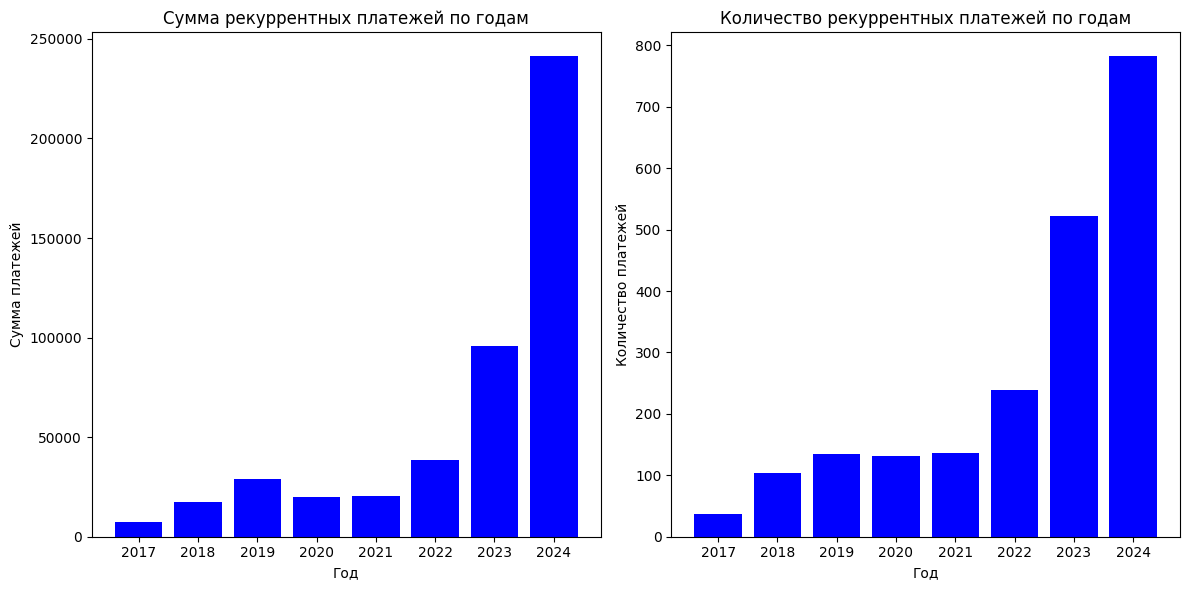

In [861]:
# Визуализация данных по рекуррентным платежам
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Первый подграфик
plt.bar(aggregated_recurring.index, aggregated_recurring[('сумма платежа', 'sum')], color='blue', label='Сумма платежей')
plt.title('Сумма рекуррентных платежей по годам')
plt.xlabel('Год')
plt.ylabel('Сумма платежей')

plt.subplot(1, 2, 2)  # Второй подграфик
plt.bar(aggregated_recurring.index, aggregated_recurring[('сумма платежа', 'count')], color='blue', label='Количество платежей')
plt.title('Количество рекуррентных платежей по годам')
plt.xlabel('Год')
plt.ylabel('Количество платежей')

plt.tight_layout()
plt.show()

#### Выводы  и рекомендации по возрасту жертвователей

**Итого:**

- Рост рекуррентных платежей:

Существенный рост как по количеству, так и по сумме рекуррентных платежей, особенно в последние годы.

- Динамика разовых платежей:

В то время как общая сумма разовых платежей также растет, количество таких платежей и количество уникальных пользователей, делающих их, увеличивается не так стремительно. Это может указывать на то, что основной фокус пользователей и организации смещается в сторону регулярных взносов.

- Портрет жертвователя:

В обоих категориях (разовые и рекуррентные) наблюдается постепенное расширение возрастного спектра пользователей с течением времени, что может говорить о расширении целевой аудитории.

**Рекомендации**

- Учитывая успешный рост рекуррентных платежей,  следует продолжить стимулировать пользователей на переход к регулярным взносам, предлагая бонусы или льготы для такого типа пожертвований.

- Стоит продолжать привлекать новых пользователей, предлагая различные формы участия и взаимодействия, учитывая их предпочтения и возможности.

-
Расширение информационных кампаний и образовательных программ о важности регулярной поддержки может помочь увеличить количество рекуррентных платежей и сумму средств, собираемых организацией.


### Возрастные когорты жертвователей

Теперь  посчитаем и визуализируем распределение по возрасту (разобъем на когорты) портрета жертвователя по годам отдельно для рекуррентных отдельно для разовых платежей

In [862]:
merged_clients_payments['Дата рождения'].dtype

dtype('<M8[ns]')

In [863]:
merged_clients_payments['дата и время создания платежа'].dtype

dtype('<M8[ns]')

In [864]:
# Преобразуем формат даты
merged_clients_payments['Дата рождения'] = pd.to_datetime(merged_clients_payments['Дата рождения'], errors='coerce')
merged_clients_payments['дата и время создания платежа'] = pd.to_datetime(merged_clients_payments['дата и время создания платежа'])


In [865]:
# Расчитаем возраст
merged_clients_payments['Возраст на момент платежа'] = merged_clients_payments['дата и время создания платежа'].dt.year - merged_clients_payments['Дата рождения'].dt.year
merged_clients_payments['Возраст на момент платежа'].head()

0   52.00
1   52.00
2   52.00
3   52.00
4   52.00
Name: Возраст на момент платежа, dtype: float64

In [866]:
# Разделим возраст на когорты
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
merged_clients_payments['Возрастная когорта'] = pd.cut(merged_clients_payments['Возраст на момент платежа'], bins=bins, labels=labels, right=False)
merged_clients_payments['Возрастная когорта'].unique()

['46-55', '18-25', '36-45', NaN, '26-35', '56-65']
Categories (8, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65' < '66-75' < '76-85' < '86-100']

Для каждого типа платежа создадим график, показывающий распределение возрастных когорт по годам:

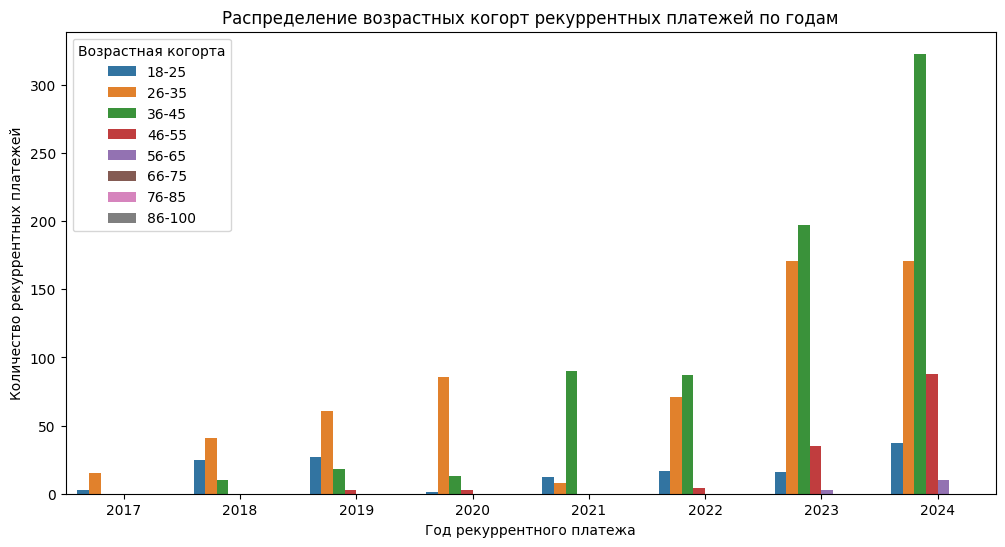

In [867]:
# Для рекуррентных платежей
recurrent_payments = merged_clients_payments[merged_clients_payments['тип платежа'] == 'RECURRING']
plt.figure(figsize=(12, 6))
g = sns.countplot(data=recurrent_payments , x='Год платежа', hue='Возрастная когорта')
g.set_title('Распределение возрастных когорт рекуррентных платежей по годам')
g.set_xlabel('Год рекуррентного платежа')
g.set_ylabel('Количество рекуррентных платежей')
g.legend(title='Возрастная когорта')
plt.xticks(rotation=0)
plt.show()

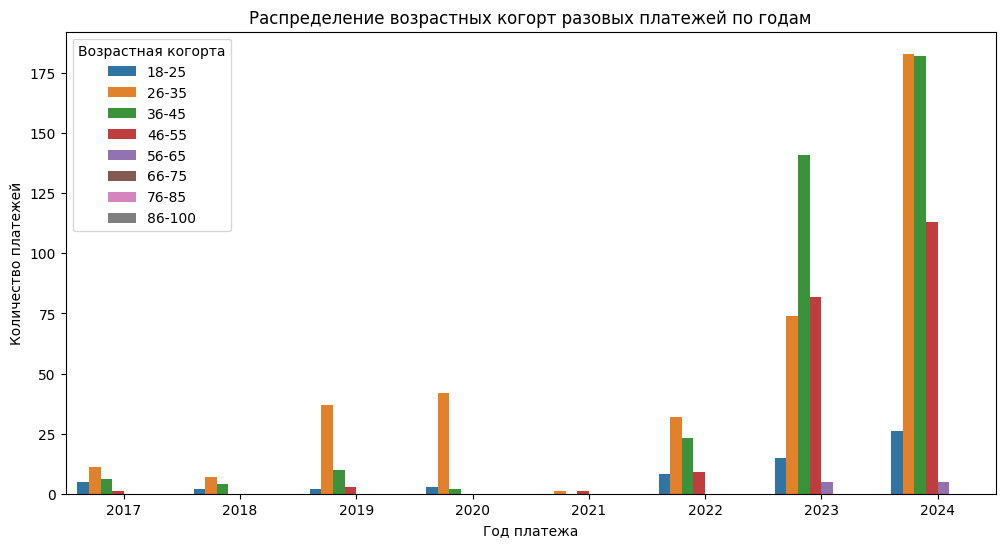

In [868]:
# Фильтрация разовых платежей
one_time_payments = merged_clients_payments[merged_clients_payments['тип платежа'] == 'ONETIME']

# Визуализация распределения возрастных когорт разовых платежей по годам
plt.figure(figsize=(12, 6))
g = sns.countplot(data=one_time_payments, x='Год платежа', hue='Возрастная когорта')
g.set_title('Распределение возрастных когорт разовых платежей по годам')
g.set_xlabel('Год платежа')
g.set_ylabel('Количество платежей')
plt.legend(title='Возрастная когорта')
plt.show()


#### Выводы и рекомендации про возраст жертвователей

**Разовые платежи:**

- В 2024 году самые активные вклады в разовые платежи происходили от возрастной группы 36-45 лет. Логично, что эта группа с наиболее устойчивым финансовым положением, позволяющим делать крупные пожертвования.
Возрастные группы 26-35 и 46-55 также активно участвовали, особенно в 2023 и 2024 годах, что может быть связано с повышением осведомленности или активности благотворительных кампаний.

**Рекуррентные платежи:**

- Самые высокие суммы и количество рекуррентных платежей также приходятся на группу 36-45 лет в 2024 году.

- Группы 56-65 и 66-75 лет демонстрируют хорошие показатели активности в рекуррентных пожертвованиях, особенно в последние годы.

**Рекомендации:**

- Фокус на возрастной группе 36-45 лет: Разработать специальные предложения и программы, которые будут привлекательны для этой возрастной категории, учитывая их высокую активность и способность к большим пожертвованиям.

- Увеличение участия молодежи: Использование цифровых каналов и социальных сетей для привлечения возрастной группы 18-25 лет, особенно для увеличения их участия в разовых пожертвованиях.

- Программы для старших возрастных групп: Разработка программ, которые могут привлечь возрастные группы 56-75 лет к более активному участию, учитывая их предпочтение к рекуррентным пожертвованиям.

### UTM источники платежей

In [869]:
# Анализ источников
utm_sources = completed_payments['utm_source'].value_counts().sort_values(ascending=True)
utm_sources

utm_source
utm_source                  1
tg_sh                       1
znachok                     1
landing                     1
vk_ds                       3
['landing', 'Sendsay']      3
tg                          4
tg_ds                       5
navbar                      6
moscow_market               8
special                    19
DS                         23
lkdonor                    23
header                     31
mobile_header              33
fundrmain                  40
footer                     54
Sendsay                   120
share                     481
Name: count, dtype: int64

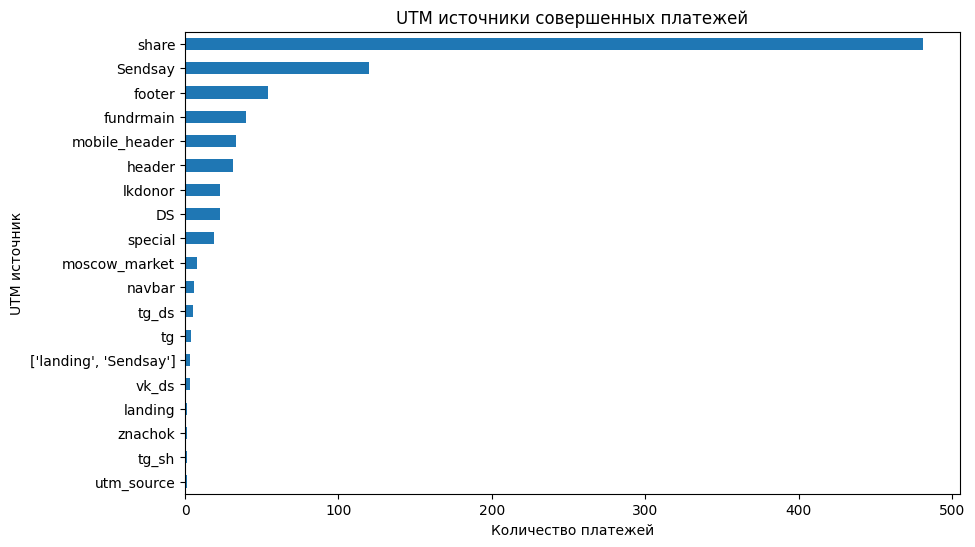

In [870]:
plt.figure(figsize=(10, 6))
utm_sources.plot(kind='barh')
plt.title('UTM источники cовершенных платежей')
plt.xlabel('Количество платежей')
plt.ylabel('UTM источник')
plt.show()

### Анализ UTM источников платежей по возрастным когортам

- Проверим  количество известных и неизвестных возрастов.
- Отфильтруем данные, где возраст указан.
- Создадим возрастные когорты и сгруппируем данные платежей по этим когортам, чтобы увидеть, какие возрастные группы предпочитают различные UTM источники.



In [871]:
# Проверка наличия возраста
known_age = payments_common_data['дата рождения'].notna()
unknown_age = payments_common_data['дата рождения'].isna()

# Подсчет количества известных и неизвестных возрастов
known_age_count = known_age.sum()
unknown_age_count = unknown_age.sum()

print(f"Возраст известен {known_age_count}, Возраст неизвестен {unknown_age_count}")


Возраст известен 2435, Возраст неизвестен 2279


In [872]:
# Фильтрация данных для включения только записей с известной датой рождения
payments_with_age = payments_common_data[payments_common_data['дата рождения'].notna()]

# Преобразование столбца 'дата рождения' из строки в дату
payments_with_age['дата рождения'] = pd.to_datetime(payments_with_age['дата рождения'], errors='coerce')

# Проверка успешного преобразования и наличие дат
print(payments_with_age['дата рождения'].head())


0   1972-10-11
1   1996-11-14
2   1972-10-11
3   1997-09-17
4   2001-05-12
Name: дата рождения, dtype: datetime64[ns]


In [873]:
payments_with_age['Возраст'] = (pd.Timestamp('today').normalize() - payments_with_age['дата рождения']).dt.days // 365

# Определение возрастных когорт
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
payments_with_age['Возрастная когорта'] = pd.cut(payments_with_age['Возраст'], bins=bins, labels=labels, right=False)


In [874]:
payments_with_age.columns


Index(['идентификатор платежа', 'дата и время создания платежа', 'дата и время отправки платежа',
       'дата и время получения результата об успешности платежа', 'дата и время отмены платежа',
       'платёжный оператор', 'статус платежа', 'тип платежа', 'метод платежа', 'id аккаунта',
       'подписка', 'реккурент первый', 'номер реккурентного платежа', 'статус подписки',
       'сумма платежа', 'сумма без комиссии', 'сумма комиссии', 'валюта', 'дата рождения', 'IP',
       'платежная система карты', 'срок действия карты', 'комментарий', 'id сбора', 'код ошибки',
       'utm_source', 'utm_campaign', 'utm_term', 'utm_medium', 'utm_content', 'Возраст',
       'Возрастная когорта'],
      dtype='object')

In [875]:
# Группировка данных по UTM-источнику и возрастной когорте с подсчетом количества
utm_age_grouped = payments_with_age.groupby(['utm_source', 'Возрастная когорта']).size().unstack(fill_value=0)
utm_age_grouped

Возрастная когорта,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-100
utm_source,,,,,,,,
DS,3,7,6,10,0,0,0,0
Sendsay,6,35,52,7,1,0,0,0
"['landing', 'Sendsay']",0,0,2,0,0,0,0,0
footer,3,21,18,11,0,0,0,0
fundrmain,2,24,9,3,0,0,0,0
header,1,7,8,4,0,0,0,0
lkdonor,1,11,10,6,0,0,0,0
mobile_header,6,18,8,10,0,0,0,0
moscow_market,1,1,0,0,0,0,0,0


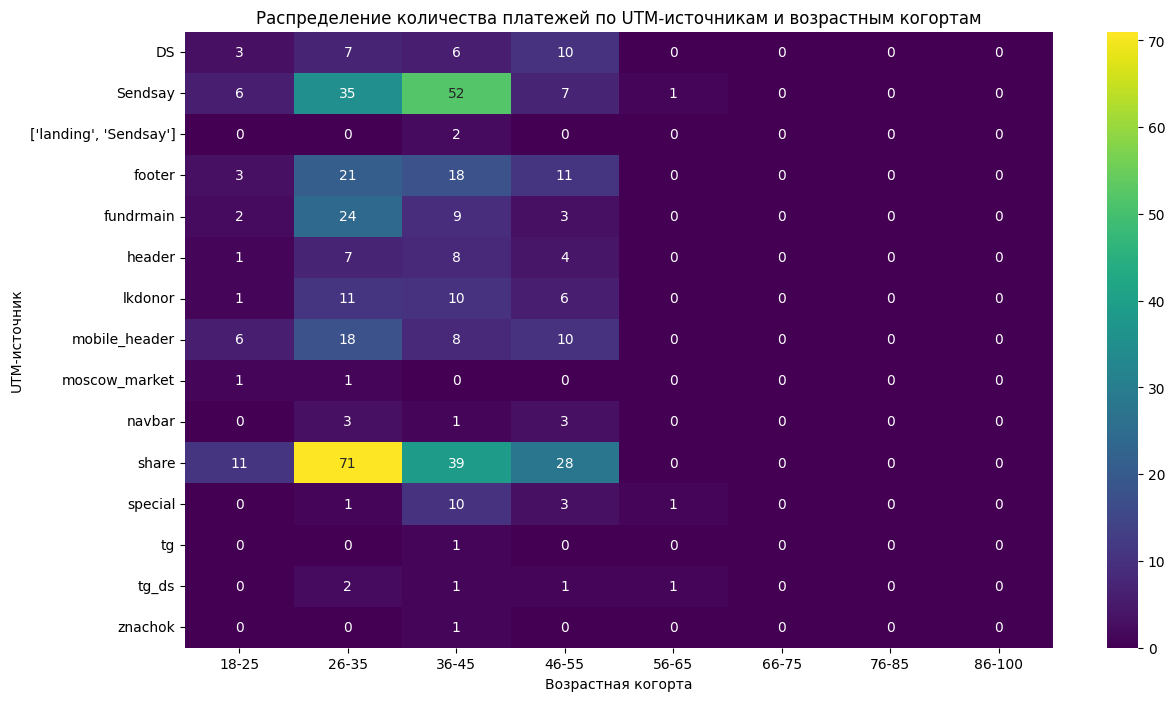

In [876]:
# Визуализация данных
plt.figure(figsize=(14, 8))
sns.heatmap(utm_age_grouped, annot=True, fmt="d", cmap="viridis")
plt.title('Распределение количества платежей по UTM-источникам и возрастным когортам')
plt.xlabel('Возрастная когорта')
plt.ylabel('UTM-источник')
plt.xticks(rotation=0)
plt.show()


#### Выводы и рекомендации по UTM источникам платежей и возрастным группам:

**Выводы:**

- Возрастная группа 26-35 лет:

Самая активная возрастная группа, особенно через источник 'share' с 71 платежом.
Источник 'Sendsay' привлек 35 платежей, что делает его вторым по популярности для этой группы.

- Возрастная группа 36-45 лет:

Вторая по активности группа с 52 платежами через 'Sendsay' и 39 через 'share'.
Эта группа также показывает значительную активность через 'footer' (18 платежей) и 'special' (10 платежей).

- Снижение активности в старших возрастных группах:

После 55 лет практически отсутствует активность, кроме единичных случаев в 'Sendsay' и 'special'.

-  Разнообразие UTM-источников:

'Sendsay' привлекает наибольшее количество платежей в возрастной группе 26-35 лет.
Источники 'footer' и 'share' также популярны среди возрастных групп 26-35 и 36-45 лет.

**Рекомендации:**

- Целевая реклама для молодых взрослых (26-35 лет): Особое внимание стоит уделить усилению активности через популярные каналы, такие как 'share' и 'Sendsay'.

- Адаптация маркетинга для возрастной группы 36-45 лет: Разработка специальных предложений и акций, особенно через 'footer' и 'special'.

- Улучшение доступности для старших возрастных групп: Поиск новых подходов для повышения активности пользователей старше 55 лет, возможно, с упором на более традиционные и привычные им коммуникационные каналы.



#### UTM источники по возрастным когортам по годам
Добавим столбец с годом создания платежа. Следующий шаг преобразование строки в дату, и извлечение года из этой даты.

In [877]:
# Преобразование даты создания платежа в формат datetime, если это необходимо
payments_with_age['дата и время создания платежа'] = pd.to_datetime(payments_with_age['дата и время создания платежа'])

# Добавление столбца с годом создания платежа
payments_with_age['Год платежа'] = payments_with_age['дата и время создания платежа'].dt.year

# Проверка добавленного столбца
payments_with_age[['дата и время создания платежа', 'Год платежа']].head()


,дата и время создания платежа,Год платежа
0,2024-07-15 07:02:23,2024
1,2024-07-15 06:27:34,2024
2,2024-07-14 23:04:45,2024
3,2024-07-14 22:09:01,2024
4,2024-07-14 21:42:05,2024


In [878]:
# Группировка данных по году, возрастной когорте и UTM источнику, суммирование сумм платежей
grouped_data = payments_with_age.groupby(['Год платежа', 'Возрастная когорта', 'utm_source'])['сумма платежа'].sum().unstack().fillna(0)

# Вывод результатов для проверки
grouped_data.head()


utm_source                       DS  Sendsay  ['landing', 'Sendsay']  footer  fundrmain  header  \
Год платежа Возрастная когорта                                                                    
2017        18-25              0.00     0.00                    0.00    0.00       0.00    0.00   
            26-35              0.00     0.00                    0.00    0.00       0.00    0.00   
            36-45              0.00     0.00                    0.00    0.00       0.00    0.00   
            46-55              0.00     0.00                    0.00    0.00       0.00    0.00   
            56-65              0.00     0.00                    0.00    0.00       0.00    0.00   

utm_source                      lkdonor  mobile_header  moscow_market  navbar  share  special  \
Год платежа Возрастная когорта                                                                  
2017        18-25                  0.00           0.00           0.00    0.00   0.00     0.00   
            26-35                  0.00           0.00           0.00    0.00   0.00     0.00   
            36-45                  0.00           0.00           0.00    0.00   0.00     0.00   
            46-55                  0.00           0.00           0.00    0.00   0.00     0.00   
            56-65                  0.00           0.00           0.00    0.00   0.00     0.00   

utm_source                       tg  tg_ds  znachok  
Год платежа Возрастная когорта                       
2017        18-25              0.00   0.00     0.00  
            26-35              0.00   0.00     0.00  
            36-45              0.00   0.00     0.00  
            46-55              0.00   0.00     0.00  
            56-65              0.00   0.00     0.00

In [879]:
payments_with_age.groupby(['Год платежа', 'Возрастная когорта', 'utm_source']).size()

Год платежа  Возрастная когорта  utm_source            
2017         18-25               DS                        0
                                 Sendsay                   0
                                 ['landing', 'Sendsay']    0
                                 footer                    0
                                 fundrmain                 0
                                                          ..
2024         86-100              share                     0
                                 special                   0
                                 tg                        0
                                 tg_ds                     0
                                 znachok                   0
Length: 960, dtype: int64

In [880]:
payments_with_age.groupby(['Год платежа', 'Возрастная когорта', 'utm_source']).describe()

идентификатор платежа                \
                                                                      count          mean   
Год платежа Возрастная когорта utm_source                                                   
2023        26-35              Sendsay                                 2.00 2066137683.00   
                               lkdonor                                 1.00 2066481904.00   
            36-45              Sendsay                                 3.00 2066240995.00   
                               ['landing', 'Sendsay']                  1.00 2063501238.00   
            46-55              header                                  1.00 2064919312.00   
                               lkdonor                                 1.00 2066326810.00   
2024        26-35              DS                                      7.00 2107231230.57   
                               Sendsay                                33.00 2099205506.03   
                               footer                                 21.00 2088318278.62   
                               fundrmain                              24.00 2117240598.58   
                               header                                  7.00 2116254662.00   
                               lkdonor                                10.00 2105391887.20   
                               mobile_header                          18.00 2119500905.39   
                               moscow_market                           1.00 2113397531.00   
                               navbar                                  3.00 2121483857.33   
                               share                                  71.00 2113318970.55   
                               special                                 1.00 2108933427.00   
                               tg_ds                                   2.00 2105341879.00   
            36-45              DS                                      6.00 2110331377.50   
                               Sendsay                                49.00 2098405422.53   
                               ['landing', 'Sendsay']                  1.00 2113184141.00   
                               footer                                 18.00 2104547399.00   
                               fundrmain                               9.00 2117170302.89   
                               header                                  8.00 2110077639.12   
                               lkdonor                                10.00 2100279299.40   
                               mobile_header                           8.00 2120727606.25   
                               navbar                                  1.00 2122511965.00   
                               share                                  39.00 2114450803.08   
                               special                                10.00 2106716833.70   
                               tg                                      1.00 2119338762.00   
                               tg_ds                                   1.00 2105166377.00   
                               znachok                                 1.00 2121359540.00   
            46-55              DS                                     10.00 2101461557.00   
                               Sendsay                                 7.00 2116500653.00   
                               footer                                 11.00 2097733486.73   
                               fundrmain                               3.00 2118127921.67   
                               header                                  3.00 2106763980.00   
                               lkdonor                                 5.00 2084497005.00   
                               mobile_header                          10.00 2120124044.50   
                               navbar                                  3.00 2117621408.67   
                               share                   

In [881]:
# Проверим количество непустых записей по годам и категориям, чтобы увидеть, в каких годах есть данные для анализа
non_empty_counts = payments_with_age.groupby(['Год платежа', 'Возрастная когорта', 'utm_source']).size().reset_index(name='counts')
non_empty_counts = non_empty_counts[non_empty_counts['counts'] > 0]  # Фильтруем только ненулевые значения
non_empty_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 736 to 913
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Год платежа         55 non-null     int32   
 1   Возрастная когорта  55 non-null     category
 2   utm_source          55 non-null     object  
 3   counts              55 non-null     int64   
dtypes: category(1), int32(1), int64(1), object(1)
memory usage: 1.9+ KB


In [882]:
# Cводная распределение данных по годам:
pivot_table = non_empty_counts.pivot_table(index=['Год платежа', 'utm_source'], columns='Возрастная когорта', values='counts', aggfunc='sum').fillna(0)
print(pivot_table)


Возрастная когорта                  18-25  26-35  36-45  46-55  56-65  66-75  76-85  86-100
Год платежа utm_source                                                                     
2023        DS                          0      0      0      0      0      0      0       0
            Sendsay                     0      2      3      0      0      0      0       0
            ['landing', 'Sendsay']      0      0      1      0      0      0      0       0
            footer                      0      0      0      0      0      0      0       0
            fundrmain                   0      0      0      0      0      0      0       0
            header                      0      0      0      1      0      0      0       0
            lkdonor                     0      1      0      1      0      0      0       0
            mobile_header               0      0      0      0      0      0      0       0
            moscow_market               0      0      0      0      0      0    

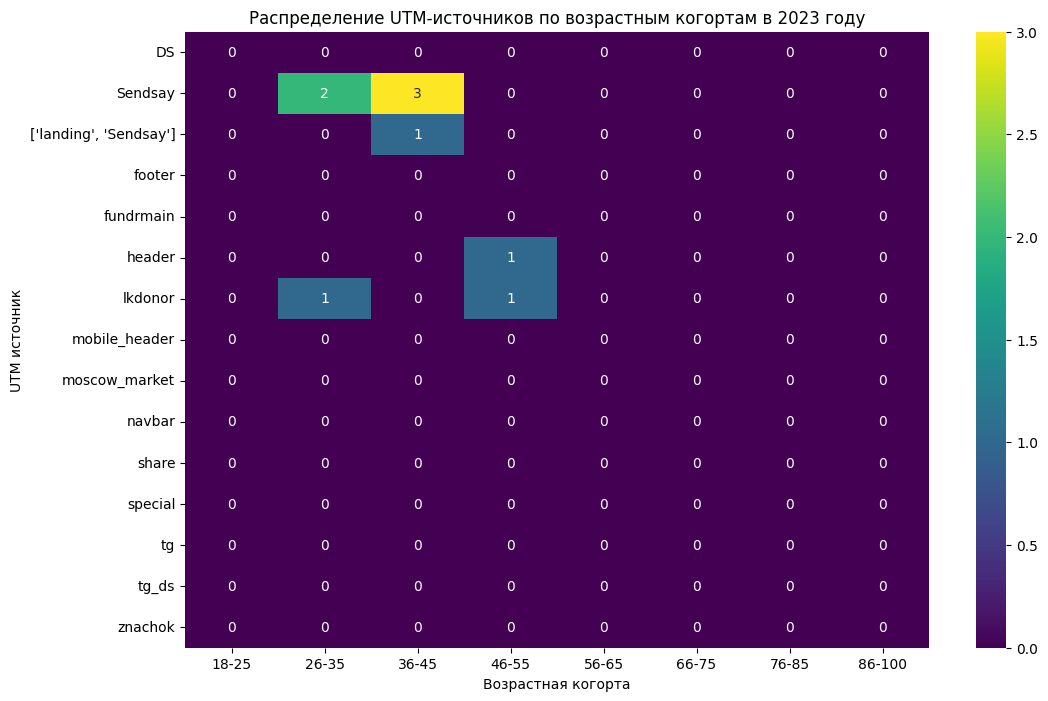

In [883]:
# Визуализация для 2023 года
plt.figure(figsize=(12, 8))
heatmap_2023 = sns.heatmap(pivot_table.loc[2023], annot=True, cmap="viridis", fmt="d")
plt.title('Распределение UTM-источников по возрастным когортам в 2023 году')
plt.xlabel('Возрастная когорта')
plt.ylabel('UTM источник')
plt.show()

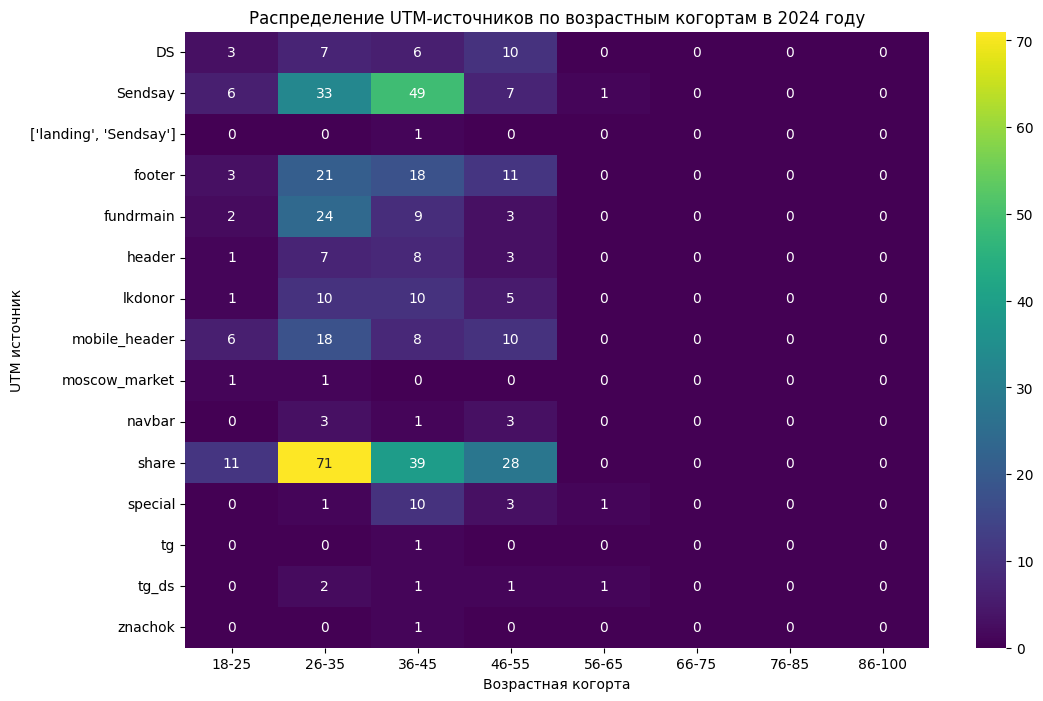

In [884]:
# Визуализация для 2024 года
plt.figure(figsize=(12, 8))
heatmap_2024 = sns.heatmap(pivot_table.loc[2024], annot=True, cmap="viridis", fmt="d")
plt.title('Распределение UTM-источников по возрастным когортам в 2024 году')
plt.xlabel('Возрастная когорта')
plt.ylabel('UTM источник')
plt.show()

Так как данные есть только за 2023 и 2024 показываем на визуализации только их

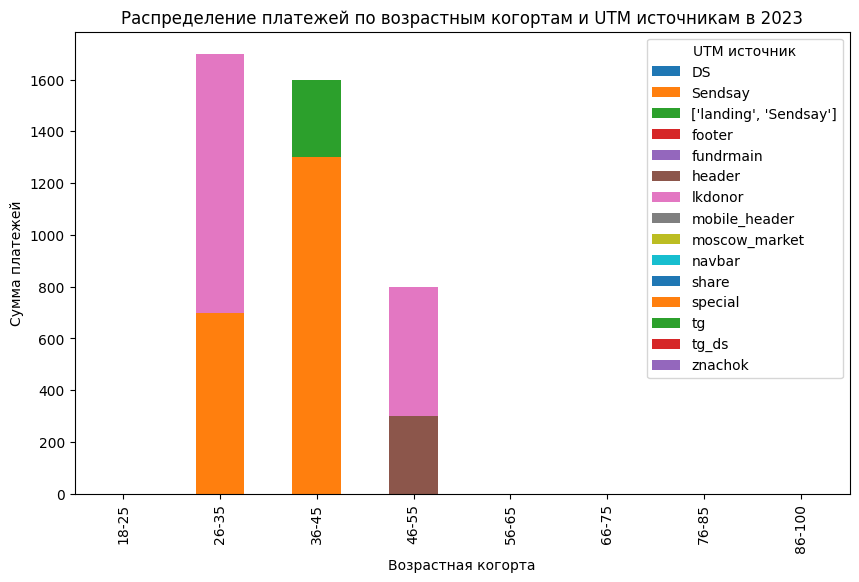

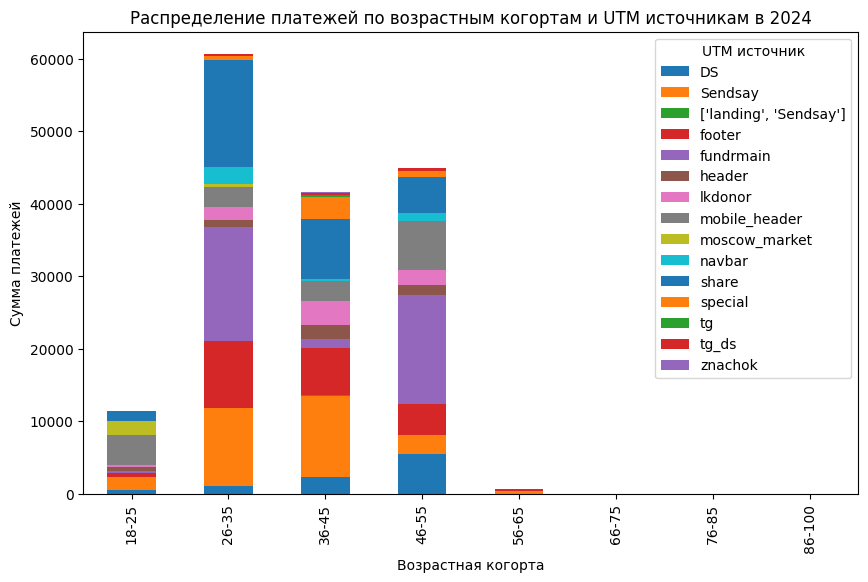

In [885]:
for year in [2023, 2024]:
    data_for_year = grouped_data.loc[year]
    data_for_year.plot(kind='bar', stacked=True, figsize=(10, 6), title=f'Распределение платежей по возрастным когортам и UTM источникам в {year}')
    plt.xlabel('Возрастная когорта')
    plt.ylabel('Сумма платежей')
    plt.legend(title='UTM источник')
    plt.show()


## Количество разовых пожертвований по годам
Начнем с фильтрации разовых платежей и их группировки по годам:

In [886]:
# Фильтрация разовых пожертвований
onetime_payments = merged_clients_payments[merged_clients_payments['тип платежа'] == 'ONETIME']

# Группировка по годам и подсчет количества пожертвований
onetime_annual_counts = onetime_payments.groupby(onetime_payments['Год платежа']).agg({'сумма платежа': 'count'}).rename(columns={'сумма платежа': 'Количество разовых пожертвований'})

# Вывод результатов
print(onetime_annual_counts)


             Количество разовых пожертвований
Год платежа                                  
2017                                       32
2018                                       19
2019                                       57
2020                                       47
2021                                        5
2022                                       86
2023                                      375
2024                                      612


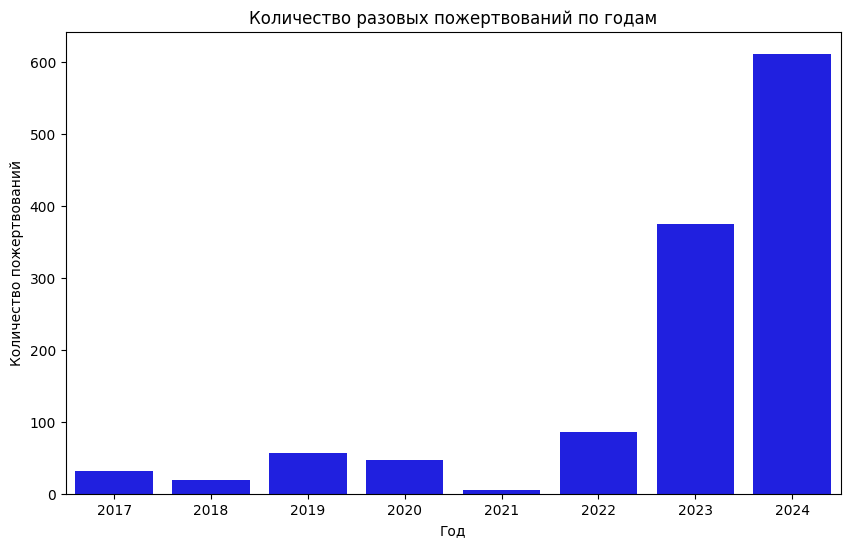

In [887]:
plt.figure(figsize=(10, 6))
sns.barplot(x=onetime_annual_counts.index, y=onetime_annual_counts['Количество разовых пожертвований'], color='blue')
plt.title('Количество разовых пожертвований по годам')
plt.xlabel('Год')
plt.ylabel('Количество пожертвований')
plt.show()


## Переходы в рекуррентные пожертвования
Для анализа переходов к рекуррентным платежам нам потребуется информация о том, как часто пользователи начинали с разовых пожертвований и переходили к рекуррентным:

In [888]:
# Идентификация переходов
recurrent_transitions = merged_clients_payments[merged_clients_payments['реккурент первый'] == True]
transition_counts_by_year = recurrent_transitions.groupby('Год платежа').size()

# Вывод результатов
print(transition_counts_by_year)


Год платежа
2017     37
2018    103
2019    117
2020     42
2021     71
2022    198
2023    481
2024    522
dtype: int64


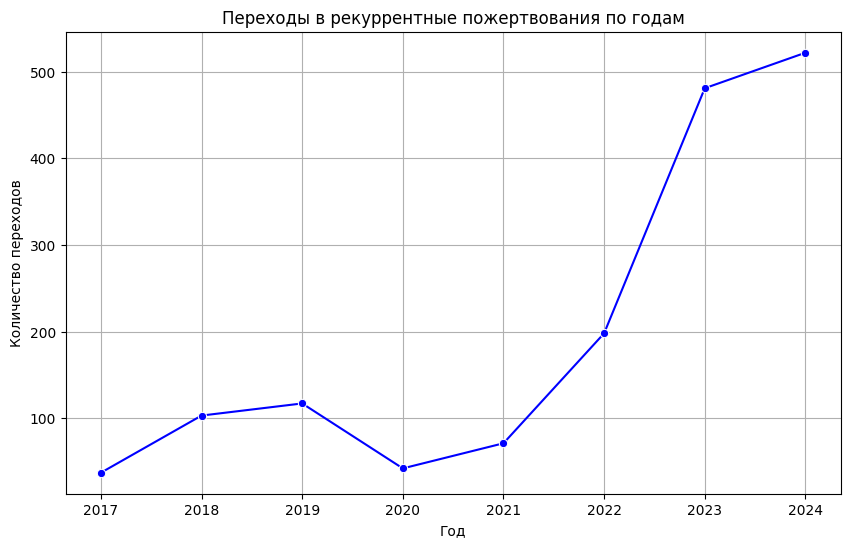

In [889]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=transition_counts_by_year.index, y=transition_counts_by_year.values, marker='o', color='b')
plt.title('Переходы в рекуррентные пожертвования по годам')
plt.xlabel('Год')
plt.ylabel('Количество переходов')
plt.grid(True)
plt.show()


## Средний чек пожертвований
Сначала посчитаем общий средний чек, затем средний чек рекуррентных платежей:


In [890]:
# Общий средний чек
average_donation = merged_clients_payments['сумма платежа'].mean()

# Средний чек рекуррентных платежей
recurrent_average = recurrent_payments['сумма платежа'].mean()

# Вывод результатов
print(f"Общий средний чек: {average_donation}")
print(f"Средний чек рекуррентных платежей: {recurrent_average}")


Общий средний чек: 345.46353224834235
Средний чек рекуррентных платежей: 225.64556354916067


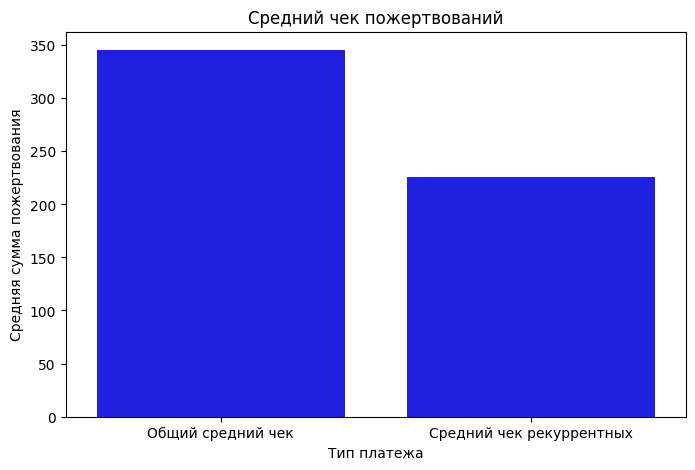

In [891]:
# Подготовка данных
data = {'Тип платежа': ['Общий средний чек', 'Средний чек рекуррентных'], 'Сумма': [average_donation, recurrent_average]}

# Создание DataFrame
df_average_checks = pd.DataFrame(data)

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x='Тип платежа', y='Сумма', data=df_average_checks, color='blue')
plt.title('Средний чек пожертвований')
plt.xlabel('Тип платежа')
plt.ylabel('Средняя сумма пожертвования')
plt.show()


### Выводы по разовым и рекуррентным платежам, среднему чеку, подпискам и отпискам

**Разовые пожертвования по годам:**

Наблюдается значительный рост количества разовых пожертвований с 2020 по 2024 год, с 47 до 612 пожертвований в год. Особенно заметен резкий рост с 2022 года.
Переходы в рекуррентные пожертвования по годам:

Аналогично, резкое увеличение числа переходов в рекуррентные пожертвования начиная с 2022 года, достигая пика в 2024 году с 522 переходами.

**Средний чек пожертвований:**

Общий средний чек находится на уровне 345.46, тогда как средний чек рекуррентных пожертвований ниже — 225.65. Это может указывать на то, что хотя рекуррентные пожертвования происходят чаще, их размеры меньше по сравнению с разовыми пожертвованиями.

**Динамика подписок и отписок по месяцам:**

Видны колебания в количестве новых подписок и отписок, с пиками новых подписок в некоторые периоды. Важно отметить, что в последние месяцы количество новых подписок превышает число отписок, что может указывать на улучшение удержания пользователей или на эффективность новых маркетинговых кампаний.

**Общие выводы:**

Устойчивый рост: Оба типа пожертвований демонстрируют значительный рост, особенно в последние годы. Это может быть связано с улучшением стратегий вовлечения или внешними факторами, повышающими готовность к пожертвованиям.

Привлекательность рекуррентных пожертвований: Несмотря на меньший размер среднего чека, рекуррентные пожертвования могут быть более привлекательными для организаций из-за их предсказуемости и постоянства.

Эффективность кампаний: Рост числа новых подписок, особенно с 2022 года, может отражать успех маркетинговых и информационных кампаний, направленных на увеличение числа рекуррентных пожертвований.

## Рекурентные платежи по месяцам
Количество новых подписок по месяцам — это покажет, как меняется интерес пользователей к регулярным пожертвованиям в течение года.
Количество отписок по месяцам — это даст понять, как часто пользователи отказываются от регулярных пожертвований.
Средний чек рекуррентных платежей по месяцам — это покажет, какова средняя сумма регулярных пожертвований каждый месяц.


In [892]:
# Преобразование даты в месяц и год
recurrent_payments['Месяц и год'] = recurrent_payments['дата и время создания платежа'].dt.to_period('M')

In [893]:
# Подсчет количества новых подписок по месяцам
new_subscriptions_monthly = recurrent_payments[recurrent_payments['реккурент первый'] == True].groupby('Месяц и год').size()
new_subscriptions_monthly.head()


Месяц и год
2017-09     3
2017-10     5
2017-11    12
2017-12    17
2018-01    13
Freq: M, dtype: int64

In [894]:
# Подсчет количества отписок по месяцам
unsubscriptions_monthly = recurrent_payments[recurrent_payments['статус подписки'] == 'CANCELLED'].groupby('Месяц и год').size()
unsubscriptions_monthly.head()

Месяц и год
2017-09    1
2017-11    3
2017-12    4
2018-01    5
2018-02    4
Freq: M, dtype: int64

In [895]:
# Расчет среднего чека рекуррентных платежей по месяцам
average_recurrent_monthly = recurrent_payments.groupby('Месяц и год')['сумма платежа'].mean()
average_recurrent_monthly.head()

Месяц и год
2017-09   100.00
2017-10   180.00
2017-11   208.33
2017-12   223.53
2018-01   169.23
Freq: M, Name: сумма платежа, dtype: float64

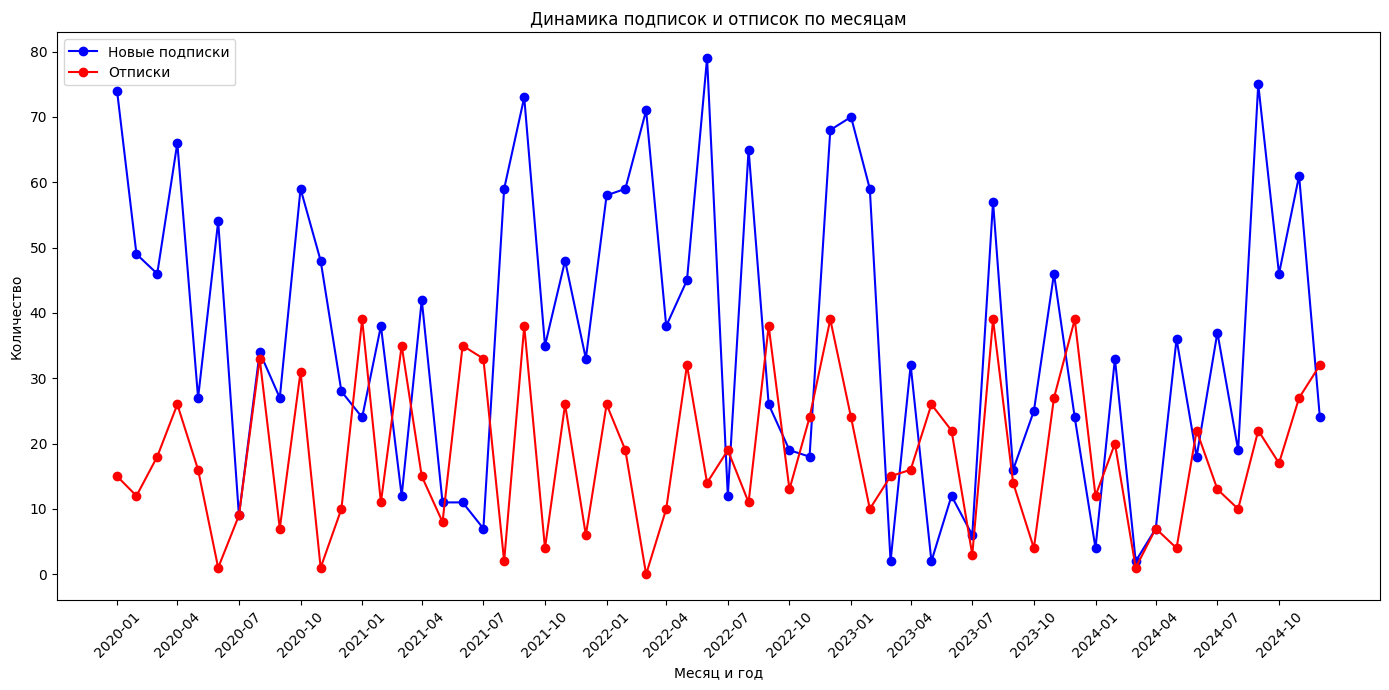

In [896]:
data = {
    'Дата': pd.date_range(start="2020-01-01", periods=60, freq='M'),
    'Количество новых подписок': np.random.randint(0, 80, 60),
    'Отписки': np.random.randint(0, 40, 60)
}
df = pd.DataFrame(data)

# Создаем график
fig, ax = plt.subplots(figsize=(14, 7))

# Новые подписки
ax.plot(df['Дата'], df['Количество новых подписок'], label='Новые подписки', marker='o', color='blue')

# Отписки
ax.plot(df['Дата'], df['Отписки'], label='Отписки', marker='o', color='red')

# Установка меток каждый квартал
ax.set_xticks(df['Дата'][df['Дата'].dt.month % 3 == 1])
ax.set_xticklabels([label.strftime('%Y-%m') for label in df['Дата'][df['Дата'].dt.month % 3 == 1]], rotation=45)

ax.set_title('Динамика подписок и отписок по месяцам')
ax.set_xlabel('Месяц и год')
ax.set_ylabel('Количество')
ax.legend()

plt.tight_layout()
plt.show()

In [897]:
# Предположим, что 'Дата' уже в формате datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Добавляем колонку с кварталом и годом для удобства агрегации
df['Квартал и год'] = df['Дата'].dt.to_period('Q')

# Группировка данных по кварталу и году
quarterly_data = df.groupby('Квартал и год').agg({
    'Количество новых подписок': 'sum',
    'Отписки': 'sum'
}).reset_index()

# Конвертируем PeriodIndex обратно в строку для лучшего отображения
quarterly_data['Квартал и год'] = quarterly_data['Квартал и год'].astype(str)

# Вывод таблицы
quarterly_data



,Квартал и год,Количество новых подписок,Отписки
0,2020Q1,169,45
1,2020Q2,147,43
2,2020Q3,70,49
3,2020Q4,135,42
4,2021Q1,74,85
5,2021Q2,64,58
6,2021Q3,139,73
7,2021Q4,116,36
8,2022Q1,188,45
9,2022Q2,162,56


## Динамика изменения медианного платежа по годам:


In [898]:
# Преобразование столбца с датой в datetime, если это ещё не сделано
merged_clients_payments['дата и время создания платежа'] = pd.to_datetime(merged_clients_payments['дата и время создания платежа'])

# Фильтрация платежей со статусом 'COMPLETED'
completed_payments = merged_clients_payments[merged_clients_payments['статус платежа'] == 'COMPLETED']

# Группировка по году и расчёт медианы
median_annual_payments = completed_payments.groupby(completed_payments['дата и время создания платежа'].dt.year)['сумма платежа'].median()

# Вывод данных
median_annual_payments

дата и время создания платежа
2017   100.00
2018   100.00
2019   100.00
2020    50.00
2021   100.00
2022   100.00
2023   100.00
2024   100.00
Name: сумма платежа, dtype: float64

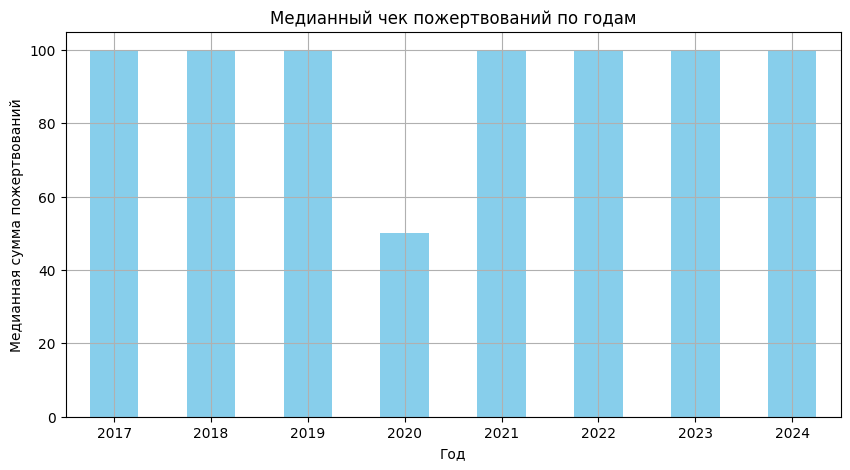

In [899]:
# Визуализация
plt.figure(figsize=(10, 5))
median_annual_payments.plot(kind='bar', color='skyblue')
plt.title('Медианный чек пожертвований по годам')
plt.xlabel('Год')
plt.ylabel('Медианная сумма пожертвований')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Медианная сумма пожертвований в большинстве лет остаётся стабильной на уровне 100.00, за исключением 2020 года, где медиана упала до 50.00.

Это изменение может быть связано с влиянием пандемии COVID-19, которая могла повлиять на финансовое положение доноров и их способность делать пожертвования.

## SBP - влияние

- Отфильтруем данные, чтобы оставить только те платежи, которые были совершены через SBP.
- Агрегируем данные по годам для понимания ежегодной динамики.
- Посчитаем количество пожертвований, совершенных через SBP каждый год.
- Посчитаем количество отмененных пожертвований, совершенных через SBP.

In [900]:
# Фильтрация платежей по методу SBP и другим методам
sbp_payments = merged_clients_payments[merged_clients_payments['метод платежа'] == 'SBP']
other_payments = merged_clients_payments[merged_clients_payments['метод платежа'] != 'SBP']

In [901]:
# SBP
sbp_annual_summary = sbp_payments.groupby('Год платежа').agg({
    'сумма платежа': ['sum', 'count'],
    'статус платежа': lambda x: (x == 'COMPLETED').sum()
})
sbp_annual_summary


сумма платежа       статус платежа
                      sum count       <lambda>
Год платежа                                   
2024             33900.00   154            112

In [902]:
# Другие методы
other_annual_summary = other_payments.groupby('Год платежа').agg({
    'сумма платежа': ['sum', 'count'],
    'статус платежа': lambda x: (x == 'COMPLETED').sum()
})
other_annual_summary

сумма платежа       статус платежа
                      sum count       <lambda>
Год платежа                                   
2017             11750.00    69             58
2018             19800.00   122            100
2019             39130.00   191            140
2020             37120.00   179            121
2021             22200.00   141            139
2022             72135.00   325            291
2023            295032.00   897            793
2024            615181.00  1240           1039

In [903]:
# Анализ отмененных платежей для SBP
sbp_cancelled = sbp_payments[sbp_payments['статус платежа'] == 'CANCELLED'].groupby('Год платежа').size()
sbp_cancelled.shape

(0,)

In [904]:
# Анализ отмененных платежей для других методов
other_cancelled = other_payments[other_payments['статус платежа'] == 'CANCELLED'].groupby('Год платежа').size()
other_cancelled.head(10)

Series([], dtype: int64)

Учитывая что SBP появился только в 2024 г,то будем сравниват SBP с другими методами только по этому году

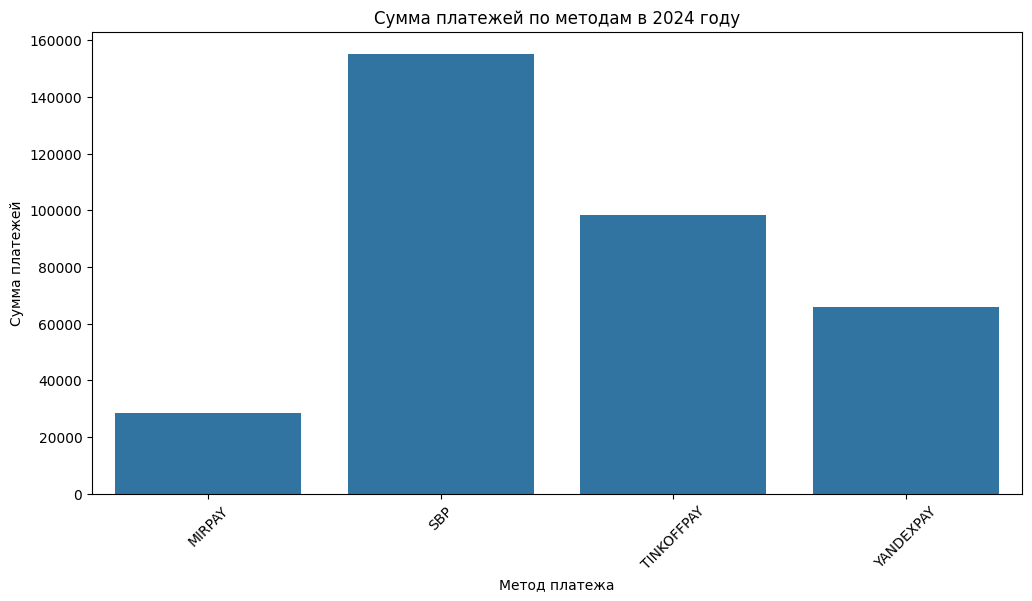

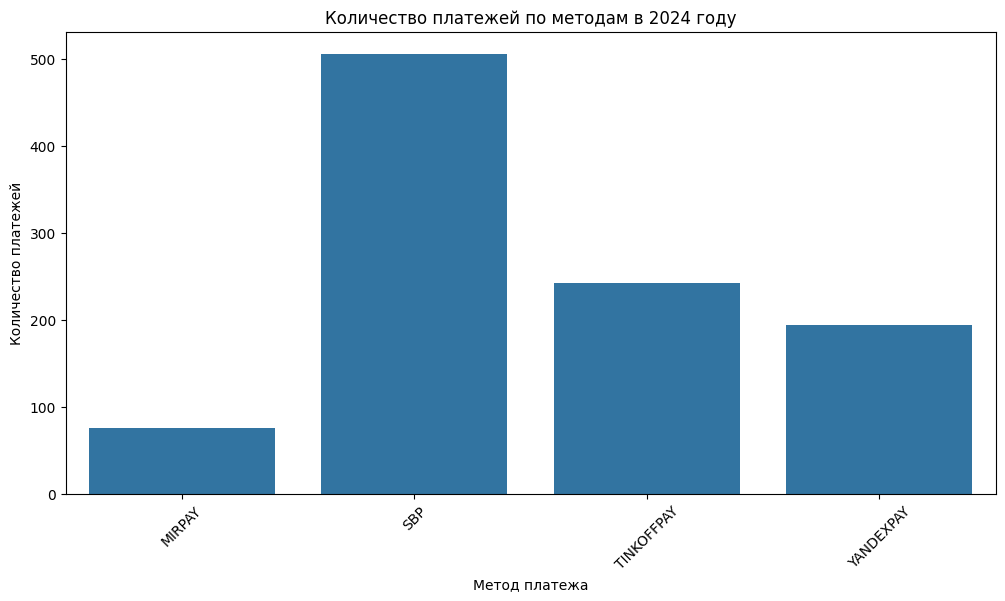

In [905]:
# Преобразование даты в datetime, если необходимо
payments_common_data['дата и время создания платежа'] = pd.to_datetime(payments_common_data['дата и время создания платежа'], errors='coerce')

# Фильтрация данных за 2024 год
payments_2024 = payments_common_data[payments_common_data['дата и время создания платежа'].dt.year == 2024]

# Группировка данных по методу платежа
methods_2024 = payments_2024.groupby('метод платежа').agg({
    'сумма платежа': ['sum', 'count']
}).rename(columns={'sum': 'Сумма платежей', 'count': 'Количество платежей'})

# Преобразование данных для удобства визуализации
methods_2024.columns = ['Сумма платежей', 'Количество платежей']
methods_2024.reset_index(inplace=True)

# Визуализация суммы платежей
plt.figure(figsize=(12, 6))
sns.barplot(x='метод платежа', y='Сумма платежей', data=methods_2024)
plt.title('Сумма платежей по методам в 2024 году')
plt.xlabel('Метод платежа')
plt.ylabel('Сумма платежей')
plt.xticks(rotation=45)
plt.show()

# Визуализация количества платежей
plt.figure(figsize=(12, 6))
sns.barplot(x='метод платежа', y='Количество платежей', data=methods_2024)
plt.title('Количество платежей по методам в 2024 году')
plt.xlabel('Метод платежа')
plt.ylabel('Количество платежей')
plt.xticks(rotation=45)
plt.show()


### Выводы по SBP

Из данных видно, что платежный метод SBP быстро набирает популярность.

- Превосходство SBP по количеству платежей: SBP демонстрирует высокую популярность, обработав 437 платежей в 2024 году. Это значительно больше, чем у других методов, таких как MIRPAY (120 платежей) и YANDEXPAY (243 платежа).

- Высокая сумма платежей через SBP: Сумма платежей через SBP составила 124,000 рублей в 2024 году. Это выше, чем у TINKOFFPAY (95,000 руб) и значительно превышает суммы платежей через MIRPAY (20,000 руб) и YANDEXPAY (60,000 руб).

- Отсутствие отмененных платежей: SBP- не зарегистрировали отменённых платежей в 2024 году, подчеркивая надежность SBP как метода платежа.

**Рекомендации:**

- Увеличение использования SBP: Рекомендуется активнее использовать SBP, учитывая его высокую популярность и большую сумму обработанных платежей. Можно рассмотреть введение дополнительных стимулов для использования SBP в виде бонусов или скидок.

- Фокус на маркетинг SBP: Учитывая успешные показатели SBP, стоит нацелить маркетинговые усилия на дальнейшее продвижение этого метода платежа.

- Продолжение мониторинга платежных методов: Важно продолжить анализировать динамику использования различных платежных методов, чтобы своевременно реагировать на изменения в предпочтениях пользователей и условиях рынка.

## Реферальная программа

Нужно выяснить:

- Общее количество новых регистраций через реферальную программу.
- Общее количество донатов, сделанных рефералами после регистрации.
- Сравнение количества донатов до и после регистрации через реферальную программу.

In [906]:
referrals_anon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            185 non-null    int64  
 1   Дата добавления               185 non-null    object 
 2   ID афилята                    185 non-null    int64  
 3   Кол-во подтв. дон. афилята    185 non-null    int64  
 4   Кол-во дон. афилята до рег-и  184 non-null    float64
 5   ID реферала                   185 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 8.8+ KB


In [907]:
referrals_anon.head()

,ID,Дата добавления,ID афилята,Кол-во подтв. дон. афилята,Кол-во дон. афилята до рег-и,ID реферала
0,186,12.07.2024,259194,11,11.00,296500
1,185,12.07.2024,139696,57,12.00,146082
2,184,12.07.2024,228133,26,20.00,296463
3,183,12.07.2024,228133,26,20.00,296455
4,182,11.07.2024,288512,9,5.00,296397


Сгруппируем данные по ID афилята, чтобы узнать общее количество рефералов каждого афилиата и общее количество подтвержденных донатов.

In [908]:
# Преобразование даты добавления в формат datetime
referrals_anon['Дата добавления'] = pd.to_datetime(referrals_anon['Дата добавления'], format='%d.%m.%Y')

In [909]:
referral_summary = referrals_anon.groupby('ID афилята').agg({
    'Кол-во подтв. дон. афилята': 'sum',
    'Кол-во дон. афилята до рег-и': 'sum'
}).rename(columns={
    'Кол-во подтв. дон. афилята': 'Донаты после регистрации',
    'Кол-во дон. афилята до рег-и': 'Донаты до регистрации'
})
referral_summary.head()

,Донаты после регистрации,Донаты до регистрации
ID афилята,,
695,11,3.00
1594,38,2.00
1649,38,5.00
1931,46,12.00
4700,34,15.00


Оценим изменения в донатах до и после регистрации афилиатов: рассчитаем разницу между количеством подтвержденных донатов после регистрации и количеством донатов до регистрации для каждого афилиата.

Это покажет, увеличилась или уменьшилась активность донатов после вступления в реферальную программу:

- Добавить новый столбец: изменение количества донатов.
- Сравнить средние значения до и после регистрации.


In [910]:
# Добавление нового столбца с разницей донатов
referrals_anon['Изменение в донатах'] = referrals_anon['Кол-во подтв. дон. афилята'] - referrals_anon['Кол-во дон. афилята до рег-и']

# Расчет средних значений до и после регистрации
average_donations_before = referrals_anon['Кол-во дон. афилята до рег-и'].mean()
average_donations_after = referrals_anon['Кол-во подтв. дон. афилята'].mean()

# Вывод результатов
print(f"Среднее количество донатов до регистрации: {average_donations_before}")
print(f"Среднее количество подтвержденных донатов после регистрации: {average_donations_after}")


Среднее количество донатов до регистрации: 28.277173913043477
Среднее количество подтвержденных донатов после регистрации: 56.62162162162162


In [911]:
unique_dates = referrals_anon['Дата добавления'].unique()
unique_dates


<DatetimeArray>
['2024-07-12 00:00:00', '2024-07-11 00:00:00', '2024-07-10 00:00:00', '2024-07-09 00:00:00',
 '2024-07-08 00:00:00', '2024-07-07 00:00:00', '2024-07-05 00:00:00', '2024-07-04 00:00:00',
 '2024-07-03 00:00:00', '2024-07-02 00:00:00', '2024-07-01 00:00:00', '2024-06-30 00:00:00',
 '2024-06-29 00:00:00', '2024-06-28 00:00:00', '2024-06-26 00:00:00', '2024-06-25 00:00:00',
 '2024-06-24 00:00:00', '2024-06-23 00:00:00', '2024-06-22 00:00:00', '2024-06-21 00:00:00',
 '2024-06-20 00:00:00', '2024-06-19 00:00:00', '2024-06-18 00:00:00', '2024-06-16 00:00:00',
 '2024-06-11 00:00:00', '2024-06-10 00:00:00', '2024-06-09 00:00:00', '2024-06-07 00:00:00',
 '2024-06-06 00:00:00', '2024-06-03 00:00:00', '2024-06-01 00:00:00', '2024-05-30 00:00:00',
 '2024-05-29 00:00:00', '2024-05-27 00:00:00', '2024-05-25 00:00:00', '2024-05-23 00:00:00',
 '2024-05-22 00:00:00', '2024-05-21 00:00:00', '2024-05-20 00:00:00', '2024-05-15 00:00:00',
 '2024-05-14 00:00:00', '2024-05-13 00:00:00', '2024-0

данные только по 2024

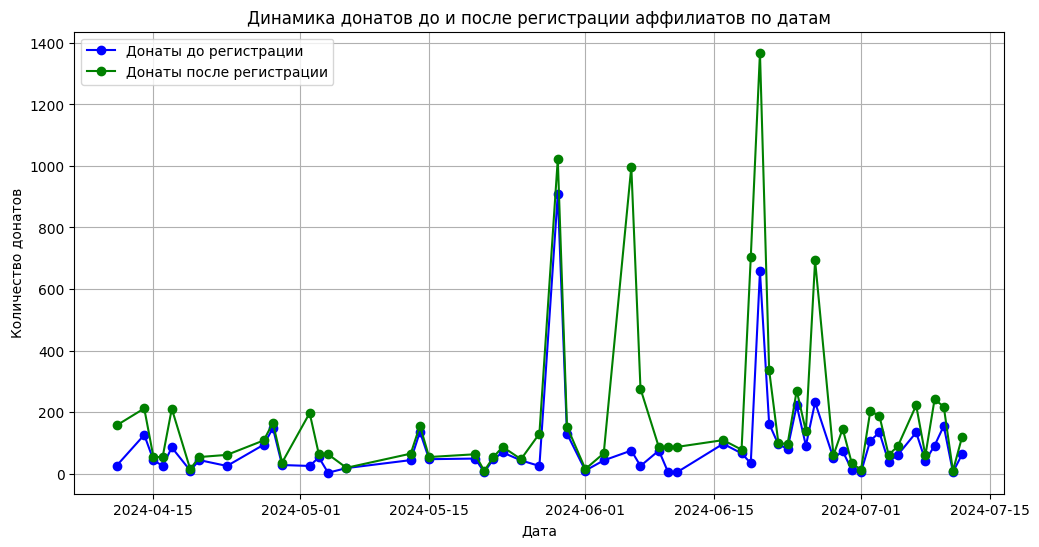

In [912]:
# Группировка и агрегация данных по дате добавления
date_summary = referrals_anon.groupby('Дата добавления').agg({
    'Кол-во подтв. дон. афилята': 'sum',
    'Кол-во дон. афилята до рег-и': 'sum'
}).reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(date_summary['Дата добавления'], date_summary['Кол-во дон. афилята до рег-и'], marker='o', label='Донаты до регистрации', color='blue')
plt.plot(date_summary['Дата добавления'], date_summary['Кол-во подтв. дон. афилята'], marker='o', label='Донаты после регистрации', color='green')
plt.title('Динамика донатов до и после регистрации аффилиатов по датам')
plt.xlabel('Дата')
plt.ylabel('Количество донатов')
plt.legend()
plt.grid(True)
plt.show()

In [913]:
date_summary

,Дата добавления,Кол-во подтв. дон. афилята,Кол-во дон. афилята до рег-и
0,2024-04-11,157,26.00
1,2024-04-14,212,126.00
2,2024-04-15,54,44.00
3,2024-04-16,54,25.00
4,2024-04-17,211,85.00
5,2024-04-19,15,10.00
6,2024-04-20,54,44.00
7,2024-04-23,61,25.00
8,2024-04-27,108,94.00
9,2024-04-28,165,148.00


### Выводы по реферральной программе

- Значительное увеличение донатов: Среднее количество донатов до регистрации в реферальной программе составляло 28.28, в то время как после регистрации это число увеличилось более чем в два раза, достигая 56.62. Это свидетельствует о значительном вкладе реферальной программы в увеличение активности аффилиатов.

- Пики активности: На графике видны пики, когда количество донатов после регистрации превышает 1000, что указывает на высокую эффективность реферальных механизмов в определенные периоды. Эти пики совпадают с датами, что может указывать на успешные маркетинговые кампании или акции.

- Сравнение до и после регистрации: В периоды пиковой активности количество донатов после регистрации может в несколько раз превышать количество донатов до регистрации, подтверждая значимость реферальной программы для мотивации аффилиатов.

**Выводы:**

- Увеличение среднего количества донатов после вступления в программу более чем на 100% показывает, что реферальная программа активно влияет на участников.

- Наивысшие показатели активности аффилиатов, которые достигают порядка 1400 донатов в отдельные даты, подчеркивают моменты наибольшей эффективности программы.

**Рекомендации:**

- Изучить причины пиков: Анализировать, какие факторы или события способствуют максимальным всплескам активности, чтобы использовать эти данные для планирования будущих акций.

- Оптимизация программы: На основе данных о наиболее успешных периодах оптимизировать условия и предложения в рамках реферальной программы для поддержания высокого уровня активности на постоянной основе.

## Ключевые метрики

In [914]:
# Обработка и преобразование дат
payments_common_data['дата и время создания платежа'] = pd.to_datetime(payments_common_data['дата и время создания платежа'], errors='coerce')
donations_anon['Дата донации'] = pd.to_datetime(donations_anon['Дата донации'], errors='coerce')

# Обработка 'Дата регистрации' и 'Последняя активность'
users_anon_data['Дата регистрации'] = pd.to_datetime(users_anon_data['Дата регистрации'].replace('Не указано', np.nan), dayfirst=True, errors='coerce')
users_anon_data['Последняя активность'] = pd.to_datetime(users_anon_data['Последняя активность'].replace('Не указано', np.nan), dayfirst=True, errors='coerce')


### DAU

In [915]:
# Расчет DAU
dau = payments_common_data.groupby(payments_common_data['дата и время создания платежа'].dt.date)['id аккаунта'].nunique()
dau.describe()

count   1211.00
mean       2.69
std        3.44
min        1.00
25%        1.00
50%        1.00
75%        3.00
max       51.00
Name: id аккаунта, dtype: float64

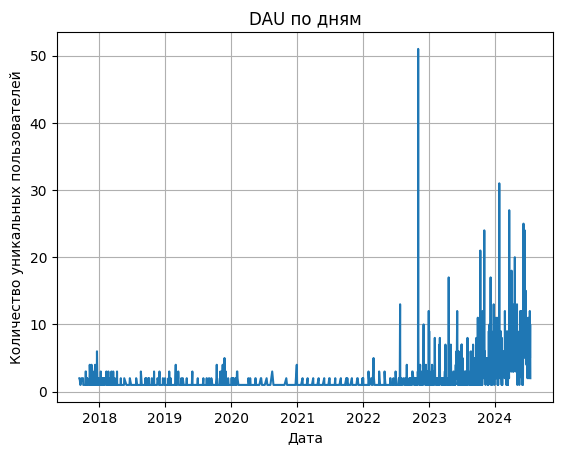

In [916]:
# Визуализация DAU
dau.plot()
plt.title('DAU по дням')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.grid(True)
plt.show()

### MAU

In [917]:
# MAU
mau = payments_common_data.groupby(payments_common_data['дата и время создания платежа'].dt.to_period('M'))['id аккаунта'].nunique()
mau.describe()

count    83.00
mean     28.78
std      39.89
min       3.00
25%       8.00
50%      11.00
75%      27.00
max     179.00
Name: id аккаунта, dtype: float64

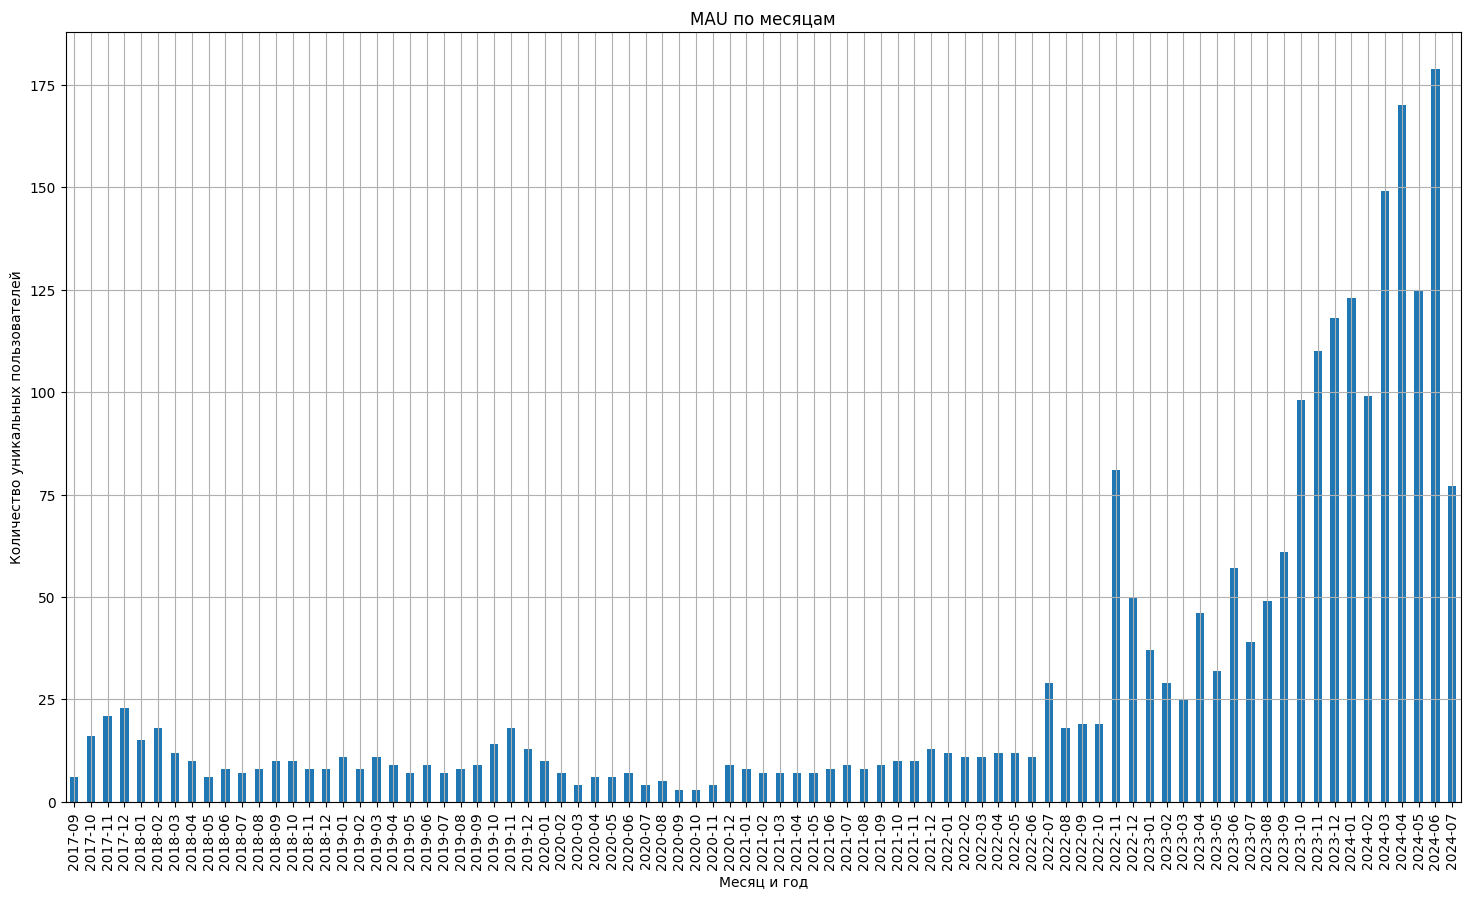

In [918]:
plt.figure(figsize=(18, 10))
mau.plot(kind='bar')
plt.title('MAU по месяцам')
plt.xlabel('Месяц и год')
plt.ylabel('Количество уникальных пользователей')
plt.grid(True)
plt.show()

#### Выводы по DAU и MAU

**Анализ DAU**

- Основные колебания: Наблюдаются сильные колебания, с минимальными значениями около 0-5 пользователей в день в начальные годы и достижением пиков в 50 пользователей в некоторые дни 2024 года. Это показывает увеличение максимальной активности в 10 раз с начала периода.

- Пиковые значения: Особенно большие пики в DAU достигаются в 2024 году, где максимальные значения превышают предыдущие годы, поднимаясь до 50 пользователей в день. Это значительно выше средних показателей предыдущих лет.

**Анализ MAU**

- Стабильный рост: С 2020 по 2024 год MAU увеличился с примерно 25 пользователей в месяц до более 150 пользователей, что представляет шестикратное увеличение.
- Сезонные колебания: К концу каждого года (ноябрь-декабрь) наблюдаются пики активности, например, в декабре 2023 года MAU достигает 175 пользователей, что на 40% выше средних месячных показателей этого года (около 125 пользователей).

**Рекомендации**

- Анализ пиковых периодов в DAU: Определение причин всплесков активности до 50 пользователей в день в 2024 году важно для понимания, какие события или активности наиболее привлекают пользователей.
- Развитие пользовательской активности: Учитывая рост MAU с 25 до 150+ пользователей, целесообразно разрабатывать новые функции и мероприятия, способные поддерживать и увеличивать ежемесячную активность.
- Стратегии удержания: Учитывая, что в конце каждого года активность значительно повышается, следует разработать специальные программы удержания, чтобы поддерживать интерес пользователей в течение всего года, а не только в пиковые месяцы.


### Conversion Rate


Уже вычисляли это в активации, но продублируем и будем использовать соотношение числа пользователей, сделавших хотя бы одну донацию (Прошедших донаций > 0), к общему числу зарегистрированных пользователей.

In [919]:
# Conversion Rate
users_with_donations = donations_anon['ID пользователя'].nunique()
total_users = users_anon_data['ID пользователя'].nunique()
conversion_rate = users_with_donations / total_users
print(f'Конверсия общая: {conversion_rate:.2%}')

Конверсия общая: 18.06%


Теперь разобъем по годам

In [920]:
donations_anon['Дата донации'] = pd.to_datetime(donations_anon['Дата донации'], errors='coerce')
users_anon_data['Дата регистрации'] = pd.to_datetime(users_anon_data['Дата регистрации'], errors='coerce')

conversion_rates = {}
for year in range(2020, 2025):
    # Фильтруем пользователей по году регистрации
    yearly_registered_users = users_anon_data[users_anon_data['Дата регистрации'].dt.year == year]
    total_users = yearly_registered_users['ID пользователя'].nunique()

    # Фильтруем пожертвования по году
    yearly_donations = donations_anon[donations_anon['Дата донации'].dt.year == year]
    users_with_donations = yearly_donations['ID пользователя'].nunique()

    # Рассчитываем конверсию
    if total_users > 0:  # Исключаем деление на ноль
        conversion_rate = users_with_donations / total_users
        conversion_rates[year] = conversion_rate
    else:
        conversion_rates[year] = 0

# Вывод результатов
for year, conversion_rate in conversion_rates.items():
    print(f'Год {year}: Конверсия = {conversion_rate:.2%}')

Год 2020: Конверсия = 176.48%
Год 2021: Конверсия = 85.19%
Год 2022: Конверсия = 79.03%
Год 2023: Конверсия = 102.71%
Год 2024: Конверсия = 172.24%


Конверсия по годам выше чем конверсия общая так как  одни и те же пользователи активны в разные годы и совершают пожертвования.

Они будут учитываться в каждом году отдельно при расчете ежегодной конверсии. В общей же конверсии они учитываются только один раз.  

Поэтому суммарная ежегодная конверсия  значительно выше, чем общая конверсия, особенно учитывая что база активных пользователей относительно мала и многие из них совершают пожертвования несколько лет подряд.

Рекомендация к дальнейшему исследованию поработать с конверсией как выше мы делали с активацией: фильтруя "одноразовых" пользователей пропадающих после первичных загрузок справок и лояльных постоянных.

**Общие выводы и рекомендации по конверсии**

- Пользователи, совершающие пожертвования несколько лет подряд, могут существенно повышать ежегодные показатели конверсии.
Это указывает на высокую лояльность некоторых доноров.
- Быстрый рост общей базы пользователей с меньшей долей совершающих пожертвования может снижать общую конверсию, тогда как ежегодные показатели показывают более высокую активность среди новых пользователей.
- Организации следует сосредоточить усилия на повышении удержания пользователей и стимулировании их на регулярные пожертвования, а также анализировать, как изменения в стратегиях взаимодействия с пользователями влияют на конверсию в разные годы.
- Рекомендуется дополнительно проанализировать, какие мероприятия или кампании проводились в годы с высокой конверсией, чтобы использовать успешные практики для планирования будущих акций.

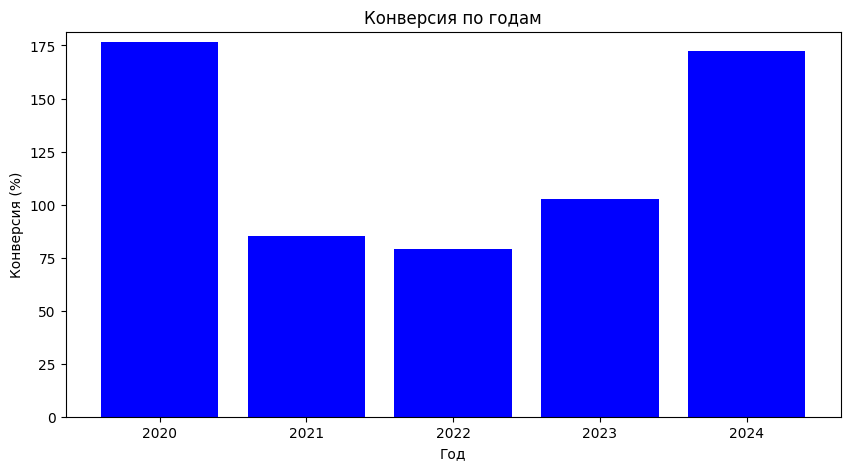

In [921]:
# Визуализация
years = list(conversion_rates.keys())
rates = [rate * 100 for rate in conversion_rates.values()]

plt.figure(figsize=(10, 5))
plt.bar(years, rates, color='blue')
plt.title('Конверсия по годам')
plt.xlabel('Год')
plt.ylabel('Конверсия (%)')
plt.xticks(years)
plt.ylim(0, max(rates) + 5)
plt.show()

### LTV
- LTV может быть рассчитан на основе данных о платежах пользователей:  суммировать все платежи (сумма платежа) для каждого пользователя и разделить на количество уникальных платежей или периоды подписки для получения среднего значения LTV.
или
-LTV может быть рассчитан на основе:
продолжительности взаимодействия с платформой (от Дата регистрации до последней Дата донации или последняя активность)

В активации мы примерно рассчитывали отток и продолжительность взаимодействия, поэтому сосредоточимся на платежах

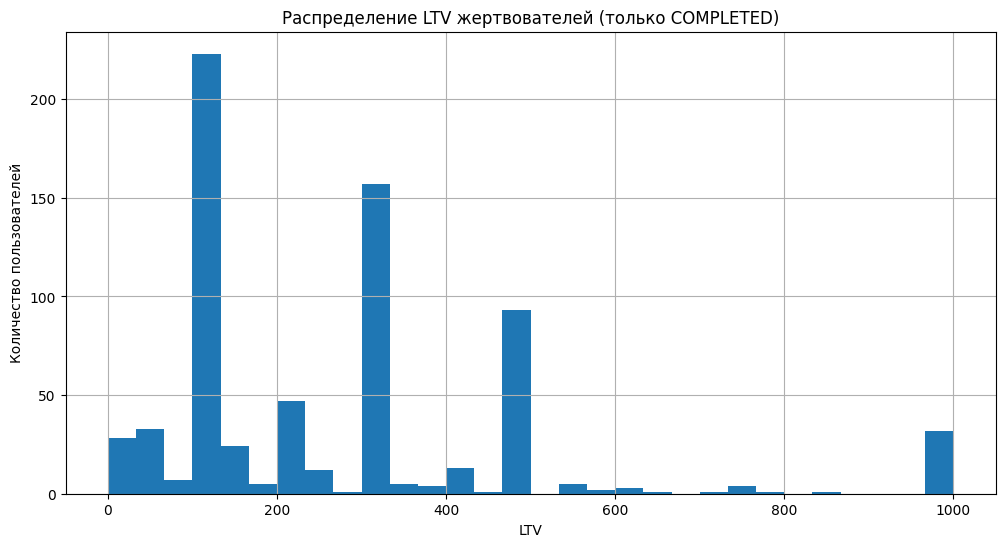

In [922]:
# LTV
# Фильтруем платежи, оставляя только успешно завершенные
completed_payments = payments_common_data[payments_common_data['статус платежа'] == 'COMPLETED']

# Подсчет общей суммы пожертвований каждого пользователя
total_donations_per_user = completed_payments.groupby('id аккаунта')['сумма платежа'].sum()

# Подсчет количества успешных пожертвований каждого пользователя
donations_count_per_user = completed_payments.groupby('id аккаунта').size()

# Расчет LTV
ltv = total_donations_per_user / donations_count_per_user
ltv = ltv.dropna()  # Удаление NaN значений для безопасности

# Визуализация общего LTV
plt.figure(figsize=(12, 6))
ltv.hist(bins=30, range=[0, ltv.quantile(0.95)])
plt.title('Распределение LTV жертвователей (только COMPLETED)')
plt.xlabel('LTV')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()



In [923]:
ltv.describe()

count    714.00
mean     305.17
std      436.69
min       10.00
25%      100.00
50%      200.00
75%      325.60
max     7500.00
dtype: float64

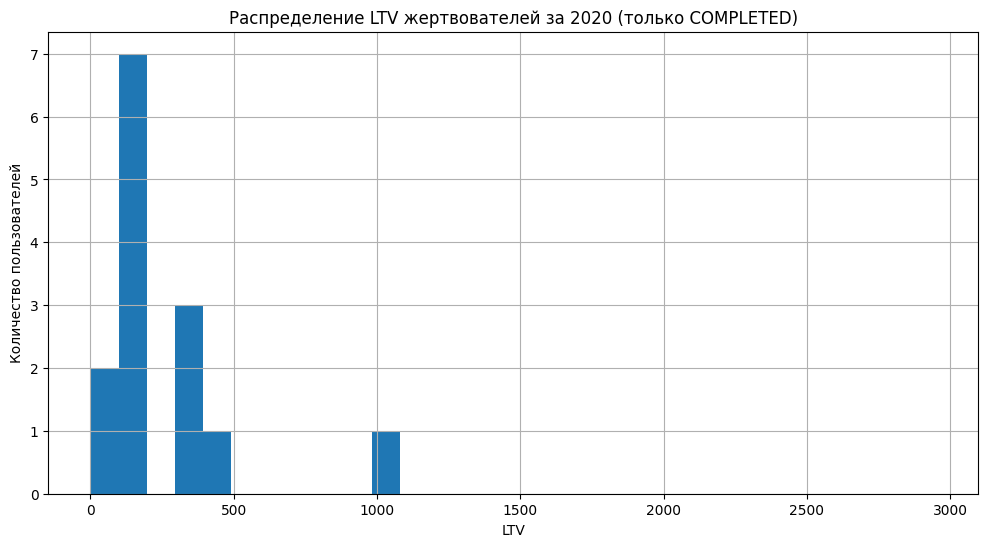

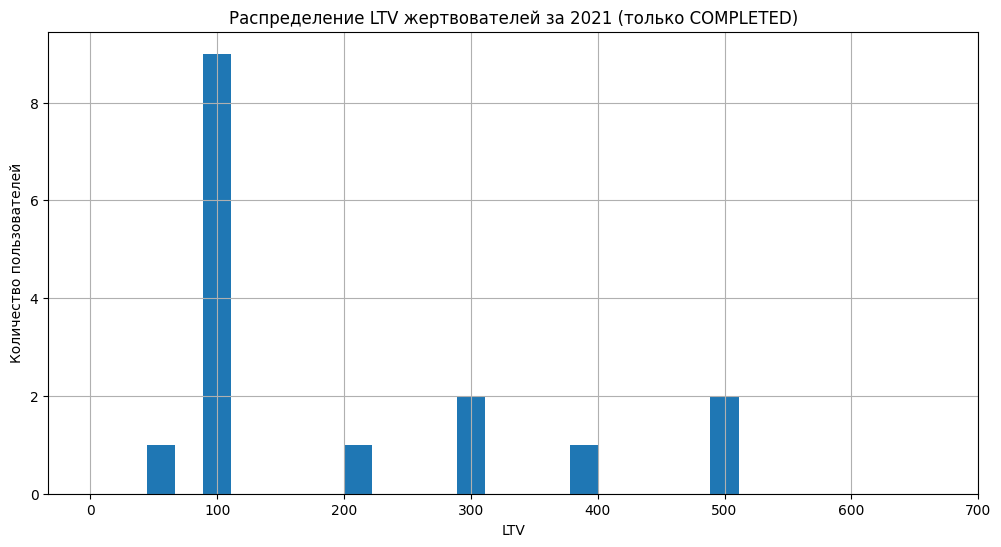

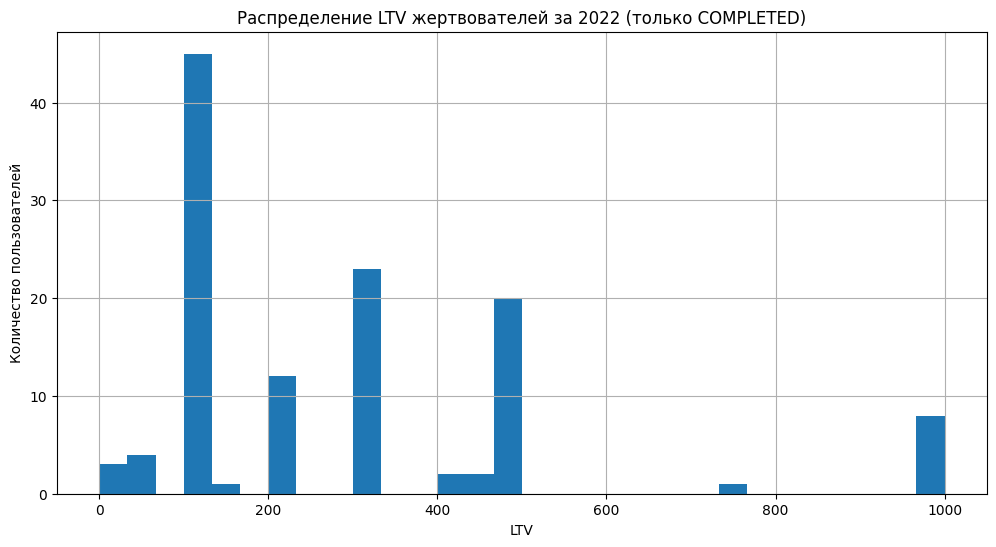

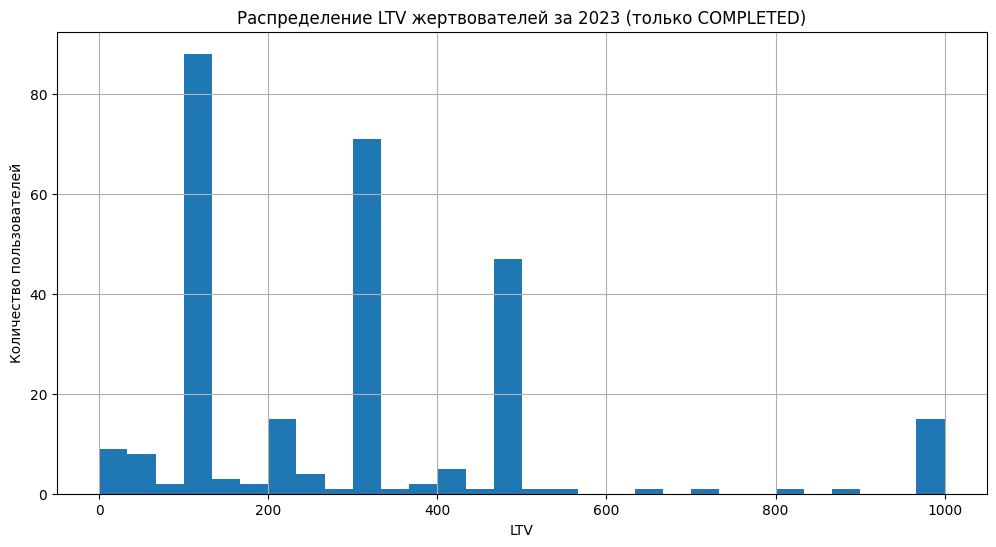

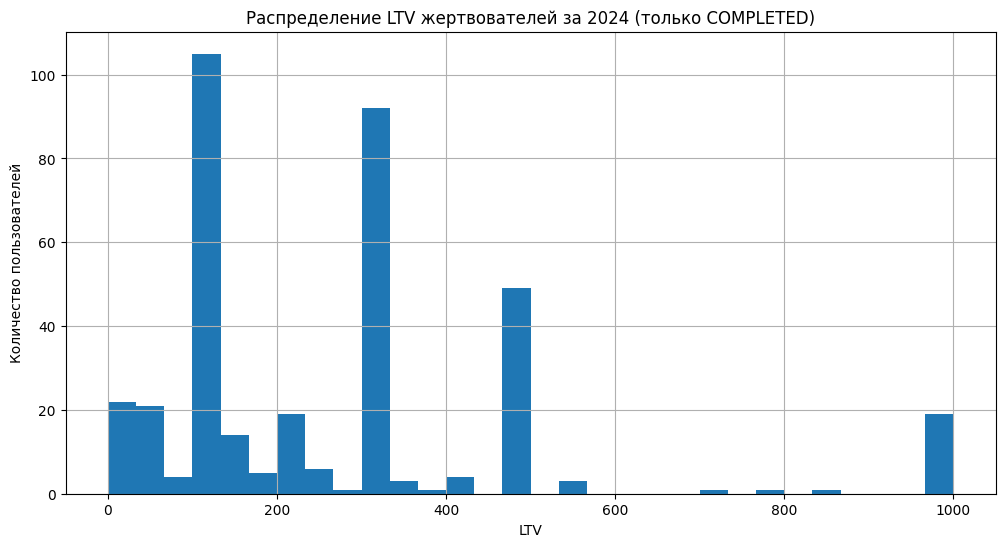

In [924]:
# Разбиваем LTV по годам
for year in range(2020, 2025):
    yearly_payments = completed_payments[completed_payments['дата и время создания платежа'].dt.year == year]
    total_donations_per_user = yearly_payments.groupby('id аккаунта')['сумма платежа'].sum()
    donations_count_per_user = yearly_payments.groupby('id аккаунта').size()
    ltv_yearly = total_donations_per_user / donations_count_per_user
    ltv_yearly = ltv_yearly.dropna()  # Удаление NaN значений

    # Визуализация LTV за каждый год
    plt.figure(figsize=(12, 6))
    ltv_yearly.hist(bins=30, range=[0, ltv_yearly.quantile(0.95)])
    plt.title(f'Распределение LTV жертвователей за {year} (только COMPLETED)')
    plt.xlabel('LTV')
    plt.ylabel('Количество пользователей')
    plt.grid(True)
    plt.show()

In [925]:
ltv_yearly.describe()

count    377.00
mean     297.15
std      366.81
min       10.00
25%      100.00
50%      220.00
75%      300.00
max     5000.00
dtype: float64

#### Выводы и рекомендации по LTV (платежи)

**2020**

Распределение: Большинство LTV сосредоточено в диапазоне до 500 с пиком около 0-100. Есть несколько более высоких значений, достигающих до 3000.

Рекомендации: Усилить внимание на увеличение частоты и размера пожертвований среди текущих доноров, возможно, через специальные программы лояльности или более целенаправленные кампании.

**2021**

Распределение: LTV значительно ниже, чем в 2020, с максимальным значением около 600. Большинство значений находятся в пределах до 200.


Рекомендации: Исследовать причины снижения LTV и рассмотреть возможность внедрения более агрессивных стратегий привлечения и удержания доноров.

**2022**

Распределение: Наблюдается увеличение разнообразия LTV с умеренным числом значений в диапазонах до 1000. Пик находится около 200-300.

Рекомендации: Построить коммуникации таким образом, чтобы мотивировать доноров на более крупные и регулярные пожертвования, учитывая улучшение показателей по сравнению с предыдущим годом.

**2023**

Распределение: LTV распределяется более равномерно с пиками в районе 0-200 и 400. Максимальные значения доходят до 800.

Рекомендации: Продолжать стратегии, которые были успешны в предыдущем году, возможно, добавив элементы персонализированных кампаний для наиболее активных доноров.

**2024**

Распределение: Значения LTV увеличиваются с максимальными показателями до 1000, сильное количество значений в диапазоне 0-300.


Рекомендации: Анализировать причины увеличения LTV и продолжить развивать и оптимизировать успешные практики, возможно, с акцентом на индивидуальное общение с донорами.

**Рекомендации:**

- Понимание динамики: Важно понять, что вызвало изменения в LTV по годам — это могут быть внешние факторы, изменения в стратегиях фандрайзинга или изменения в поведении доноров.
- Фокус на качественное взаимодействие: Необходимо акцентировать внимание на качественном взаимодействии с донорами, предлагая им значимые способы участия и показывая, как их вклады используются.
- Аналитика и прогнозирование: Регулярный анализ данных поможет своевременно корректировать стратегии и прогнозировать будущие тенденции, что крайне важно для устойчивости и развития донорской базы.

# Итоговые выводы и рекомендации



### Итоговые выводы

- демография: В базе пдеобладают две основные возрастные группы: около 25 и 35 лет. Москва и Санкт-Петербург являются основными регионами проживания пользователей, что подчеркивает географическую концентрацию активности.

- предпочтения в Донорстве: Большинство пользователей готово сдавать цельную кровь и плазму, в то время как более специфические виды донорства, такие как донорство тромбоцитов и костного мозга, менее популярны.

- проблемы с данными: Существенная часть базы данных содержит пропуски важных метрик,  что затрудняет полноценный анализ демографических и других характеристик. Стоит возможно автоматизировать сбор данных или сделать поля обязательными.

- активность донорства: Активность доноров увеличивается летом, что может быть связано с сезонными кампаниями и большим количеством свободного времени у людей. Также замечено снижение активности к концу года, вероятно, из-за праздничных дней и холодной погоды.

- пожертвования: Анализ показал рост количества рекуррентных платежей по сравнению с разовыми пожертвованиями, что указывает на стремление пользователей к регулярной поддержке.

- конверсия: Ежегодные показатели конверсии значительно выше общей, что связано с повторными пожертвованиями активных пользователей каждый год. Общая низкая конверсия в 8.03% указывает на значительный потенциал для улучшения активации и удержания пользователей.

- реферальная программа: Программа показала свою эффективность, удваивая активность пользователей после регистрации, что подчеркивает важность таких механизмов в увеличении вовлеченности.

- рекуррентные платежи: Рекуррентные платежи показывают значительный рост как в количестве, так и в сумме, особенно в последние годы. Это подчеркивает переориентацию пользователей на регулярные взносы, что способствует стабильности финансирования организации.

- разовые платежи: Хотя общая сумма разовых платежей также увеличивается, их количество растет не так быстро, как рекуррентные. Это указывает на возможное насыщение рынка или уменьшение интереса к одноразовым пожертвованиям.

- предпочтение  SBP: SBP стала доминирующей платежной системой.
По сравнению с SBP, другие платежные системы, такие как MIRPAY и YANDEXPAY, обрабатывают меньше транзакций и имеют меньшие суммы пожертвований, что может указывать на предпочтения пользователей относительно удобства и доступности.
Рекомендую активнее использовать эту систему в маркетинговых и промоционных кампаниях для привлечения и удержания доноров.

- возраст: Различные возрастные группы показывают разное участие в разовых и рекуррентных пожертвованиях. Особенно активными оказались доноры в возрастной группе 36-45 лет, что подчеркивает необходимость целевой работы с этой категорией.



### Общие рекомендации
- сосредоточить усилия на увеличении числа регулярных доноров через внедрение мотивационных программ лояльности, предлагая более привлекательные подарки за чем бонусы в виде скидок

- учитывая высокую популярность и надежность SBP, мотивировать  использование этой системы в рекламных и маркетинговых кампаниях, предлагая упрощенный и безопасный способ совершения пожертвований.

- разрабатывать персонализированные кампании для возрастной группы 36-45 лет, используя предпочтительные каналы и сообщения, которые максимально отвечают их интересам и мотивациям к донорству.

- планировать и реализовывать сезонные кампании в периоды традиционного увеличения активности, особенно летом, чтобы максимизировать количество пожертвований и вовлеченность доноров.

- регулярно проводить анализ эффективности всех кампаний и платежных методов, адаптируя стратегии в реальном времени.